In [1]:

################################# MULTI GPU BASED SEGMENTATION APPROACH ################################

In [2]:
# original directory path and working directory path for images


In [3]:
# original directory path and working directory path for images
data = "/raid/mpsych/RISTERLAB/fly_segmentation_experiments/data_dir/raw_files"
working_dir = "/raid/mpsych/RISTERLAB/fly_segmentation_experiments/data_dir"

###########################################################################################
real = working_dir + "/test2/real_images"
normalized = working_dir + "/test2/normalized_images"
cropped = working_dir + "/test2/cropped_images"
npy = working_dir + "/test2/pre_processing/npy"
originals = working_dir + "/test2/pre_processing/originals"
masks = working_dir + "/test2/pre_processing/masks"
test = working_dir + "/test2/pre_processing/test"
s = working_dir + "/test2/S"


In [4]:
#!pip install --force-reinstall gpustat
#!pip install pynvml
#!pip install scipy

In [5]:
!pip uninstall numpy mahotas -y

Found existing installation: numpy 1.19.5
Uninstalling numpy-1.19.5:
  Successfully uninstalled numpy-1.19.5
Found existing installation: mahotas 1.4.7
Uninstalling mahotas-1.4.7:
  Successfully uninstalled mahotas-1.4.7


In [6]:
!pip uninstall numpy mahatos -y

In [7]:
!pip install mahotas==1.4.7

  Using cached mahotas-1.4.7-cp39-cp39-linux_x86_64.whl
  Using cached numpy-1.24.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.5.0 requires numpy~=1.19.2, but you have numpy 1.24.2 which is incompatible.
tensorflow 2.5.0 requires six~=1.15.0, but you have six 1.16.0 which is incompatible.
tensorflow 2.5.0 requires typing-extensions~=3.7.4, but you have typing-extensions 4.4.0 which is incompatible.
scipy 1.7.3 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.24.2 which is incompatible.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.24.2 which is incompatible.


In [8]:
!pip install numpy==1.19.5

  Using cached numpy-1.19.5-cp39-cp39-manylinux2010_x86_64.whl (14.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.2
    Uninstalling numpy-1.24.2:
      Successfully uninstalled numpy-1.24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.5.0 requires six~=1.15.0, but you have six 1.16.0 which is incompatible.
tensorflow 2.5.0 requires typing-extensions~=3.7.4, but you have typing-extensions 4.4.0 which is incompatible.
nptyping 2.4.1 requires numpy<2.0.0,>=1.20.0; python_version >= "3.8", but you have numpy 1.19.5 which is incompatible.
imageio 2.16.1 requires numpy>=1.20.0, but you have numpy 1.19.5 which is incompatible.


In [9]:
import mahotas as mh
import os
import torch
import torch.distributed as dist
from torch.multiprocessing import Process
import os
import shutil
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure, filters
import mahotas as mh
#import gpustat #for gpu 
import pynvml
import scipy

RuntimeError: module compiled against API version 0xf but this version of numpy is 0xd

Could not import submodules (exact error was: numpy.core.multiarray failed to import).

There are many reasons for this error the most common one is that you have
either not built the packages or have built (using `python setup.py build`) or
installed them (using `python setup.py install`) and then proceeded to test
mahotas-imread **without changing the current directory**.

Try installing and then changing to another directory before importing mahotas.



RuntimeError: module compiled against API version 0xf but this version of numpy is 0xd

In [10]:
import cProfile
import time                          #########################For checking time taken for 1 -iteration
import multiprocessing
#from multiprocessing import Process

In [11]:
import os
import shutil
from tqdm import tqdm
import torch
import numpy
from skimage import measure, filters

In [12]:
#import gpustat #for gpu 
import torchvision
print(torchvision.__version__)
import scipy.ndimage
import torch.nn.functional as F
from scipy.ndimage import label

0.15.1+cu117


In [13]:
#!pip install nvidia-ml-py3

In [14]:
########################################### FUNCTOIN FOR TIMER ##########################################
import time

start_time = 0  # Define start_time in the global scope

def starttime():
    global start_time  # Use the global keyword to access the global start_time variable
    start_time = time.time()
    
def endtime():
    end_time = time.time()
    execution_time = end_time - start_time
    print(f"Execution time: {execution_time:.2f} seconds")

In [15]:
#!pip install imread

In [16]:
###########                  M g P s A                                      ##################

In [17]:
#################### MULTI GPU baSeD SEGMENTATION APPROACH ######################

In [18]:
#!pip install mahotas --no-binary :all:

Rank: 1Rank: 0

time for assigining ranks of the gpu :time for assigining ranks of the gpu :

Rank: 2Execution time: 0.01 secondsExecution time: 0.00 seconds


time for assigining ranks of the gpu :
Execution time: 0.01 seconds
000000_000000_000248_000000.tif000000_000000_000015_000000.tif

000000_000000_000650_000000.tif


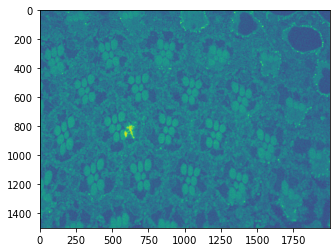

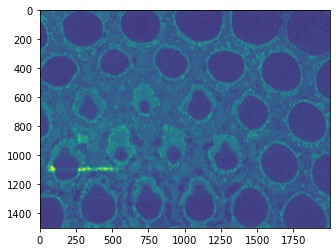

Device: cuda:1Device: cuda:0

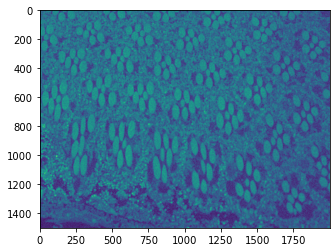



Device: cuda:2time taken for assigning  image:time taken for assigning  image:
  time taken for assigning  image:000000_000000_000015_000000.tif000000_000000_000248_000000.tif

 Execution time: 0.76 secondsExecution time: 0.76 seconds000000_000000_000650_000000.tif


Execution time: 0.76 seconds(this iteration is with g value, 100 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0(this iteration is with g value, 100 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1


(this iteration is with g value, 100 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 13:46:41
A100-SXM4-40GB - 1564620000653 - Utilization: 15% - Timestamp: 2023-04-02 13:46:41
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 13:46:41
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 13:46:41
time taken for iteration 100
Execution time: 41.84 secon

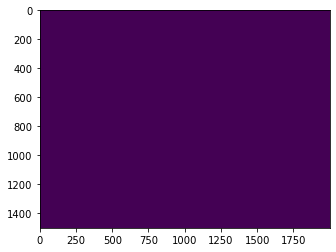

17  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 99 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 13:46:54
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 13:46:54
A100-SXM4-40GB - 1564520013405 - Utilization: 0% - Timestamp: 2023-04-02 13:46:54
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 13:46:54
time taken for iteration 100
Execution time: 55.32 seconds


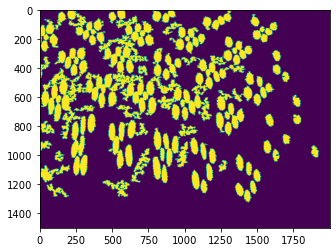

83  <=50 and number_1 >=25 
58 >= 2
######################################################################
(this iteration is with g value, 99 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 13:47:07
A100-SXM4-40GB - 1564620000653 - Utilization: 45% - Timestamp: 2023-04-02 13:47:07
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 13:47:07
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 13:47:07
time taken for iteration 99
Execution time: 25.52 seconds


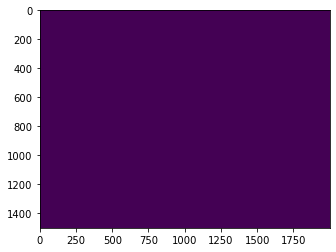

12  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 98 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 14% - Timestamp: 2023-04-02 13:47:29
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 13:47:29
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 13:47:29
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 13:47:29
time taken for iteration 100
Execution time: 90.02 seconds


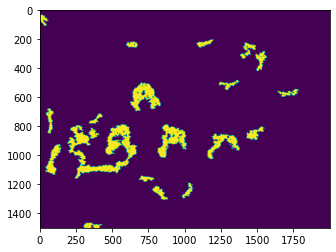

20  <=50 and number_1 >=25 
12 >= 2
######################################################################
(this iteration is with g value, 99 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 13:47:42
A100-SXM4-40GB - 1564620000653 - Utilization: 0% - Timestamp: 2023-04-02 13:47:42
A100-SXM4-40GB - 1564520013405 - Utilization: 0% - Timestamp: 2023-04-02 13:47:42
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 13:47:42
time taken for iteration 99
Execution time: 47.12 seconds


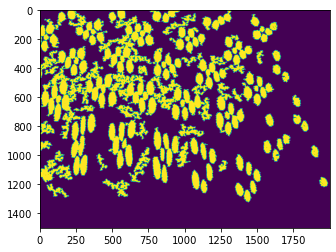

80  <=50 and number_1 >=25 
60 >= 2
######################################################################
(this iteration is with g value, 98 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 13:47:46
A100-SXM4-40GB - 1564620000653 - Utilization: 13% - Timestamp: 2023-04-02 13:47:46
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 13:47:46
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 13:47:46
time taken for iteration 98
Execution time: 38.64 seconds


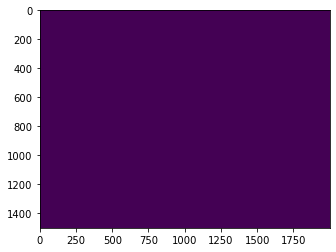

12  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 97 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 13:48:26
A100-SXM4-40GB - 1564620000653 - Utilization: 11% - Timestamp: 2023-04-02 13:48:26
A100-SXM4-40GB - 1564520013405 - Utilization: 54% - Timestamp: 2023-04-02 13:48:26
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 13:48:26
time taken for iteration 97
Execution time: 38.75 seconds


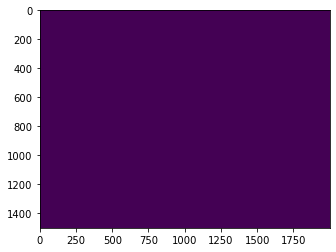

10  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 96 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 13:48:28
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 13:48:29
A100-SXM4-40GB - 1564520013405 - Utilization: 0% - Timestamp: 2023-04-02 13:48:29
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 13:48:29
time taken for iteration 98
Execution time: 45.85 seconds


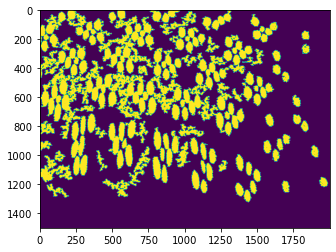

79  <=50 and number_1 >=25 
60 >= 2
######################################################################
(this iteration is with g value, 97 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 11% - Timestamp: 2023-04-02 13:48:52
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 13:48:52
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 13:48:52
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 13:48:52
time taken for iteration 99
Execution time: 82.37 seconds


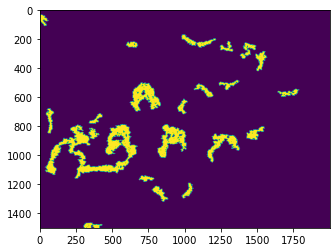

22  <=50 and number_1 >=25 
14 >= 2
######################################################################
(this iteration is with g value, 98 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 13:49:06
A100-SXM4-40GB - 1564620000653 - Utilization: 50% - Timestamp: 2023-04-02 13:49:06
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 13:49:06
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 13:49:06
time taken for iteration 96
Execution time: 39.94 seconds


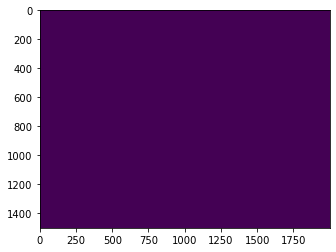

8  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 95 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 13:49:14
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 13:49:14
A100-SXM4-40GB - 1564520013405 - Utilization: 0% - Timestamp: 2023-04-02 13:49:14
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 13:49:14
time taken for iteration 97
Execution time: 44.69 seconds


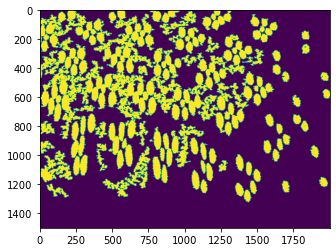

73  <=50 and number_1 >=25 
58 >= 2
######################################################################
(this iteration is with g value, 96 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 13:49:47
A100-SXM4-40GB - 1564620000653 - Utilization: 43% - Timestamp: 2023-04-02 13:49:47
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 13:49:47
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 13:49:47
time taken for iteration 95
Execution time: 40.60 seconds


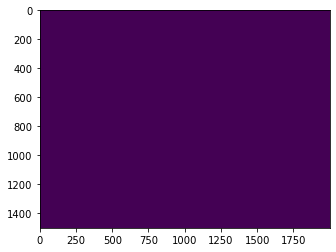

8  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 94 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 10% - Timestamp: 2023-04-02 13:49:56
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 13:49:56
A100-SXM4-40GB - 1564520013405 - Utilization: 52% - Timestamp: 2023-04-02 13:49:56
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 13:49:56
time taken for iteration 98
Execution time: 63.41 seconds


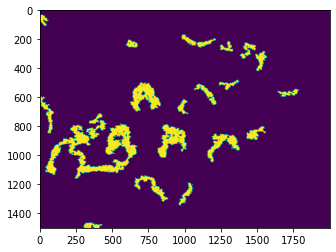

21  <=50 and number_1 >=25 
22 >= 2
######################################################################
(this iteration is with g value, 97 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 13:49:59
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 13:49:59
A100-SXM4-40GB - 1564520013405 - Utilization: 0% - Timestamp: 2023-04-02 13:49:59
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 13:49:59
time taken for iteration 96
Execution time: 44.04 seconds


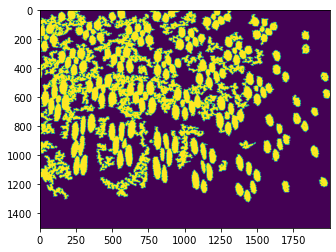

71  <=50 and number_1 >=25 
56 >= 2
######################################################################
(this iteration is with g value, 95 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 13:50:44
A100-SXM4-40GB - 1564620000653 - Utilization: 27% - Timestamp: 2023-04-02 13:50:44
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 13:50:44
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 13:50:44
time taken for iteration 94
Execution time: 55.78 seconds


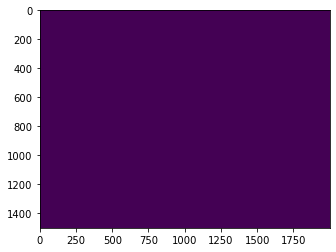

6  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 93 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 13:50:55
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 13:50:55
A100-SXM4-40GB - 1564520013405 - Utilization: 0% - Timestamp: 2023-04-02 13:50:55
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 13:50:55
time taken for iteration 95
Execution time: 55.33 seconds


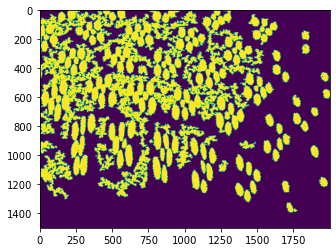

58  <=50 and number_1 >=25 
42 >= 2
######################################################################
(this iteration is with g value, 94 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 0% - Timestamp: 2023-04-02 13:51:16
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 13:51:16
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 13:51:16
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 13:51:16
time taken for iteration 97
Execution time: 79.77 seconds


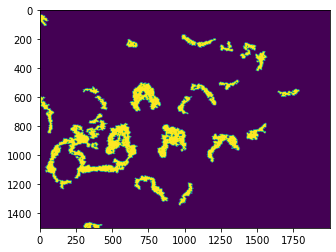

23  <=50 and number_1 >=25 
22 >= 2
######################################################################
(this iteration is with g value, 96 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 13:51:29
A100-SXM4-40GB - 1564620000653 - Utilization: 24% - Timestamp: 2023-04-02 13:51:29
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 13:51:29
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 13:51:29
time taken for iteration 93
Execution time: 44.15 seconds


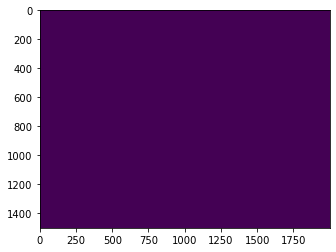

5  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 92 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 13:51:38
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 13:51:38
A100-SXM4-40GB - 1564520013405 - Utilization: 0% - Timestamp: 2023-04-02 13:51:38
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 13:51:38
time taken for iteration 94
Execution time: 42.18 seconds


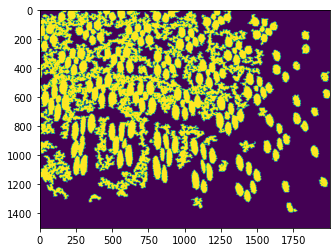

52  <=50 and number_1 >=25 
34 >= 2
######################################################################
(this iteration is with g value, 93 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 13:52:19
A100-SXM4-40GB - 1564620000653 - Utilization: 27% - Timestamp: 2023-04-02 13:52:19
A100-SXM4-40GB - 1564520013405 - Utilization: 44% - Timestamp: 2023-04-02 13:52:19
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 13:52:19
time taken for iteration 92
Execution time: 49.82 seconds


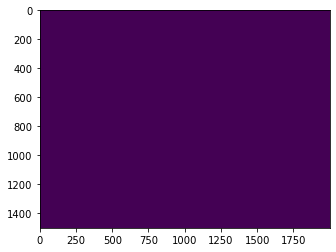

5  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 91 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 13:52:21
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 13:52:21
A100-SXM4-40GB - 1564520013405 - Utilization: 0% - Timestamp: 2023-04-02 13:52:21
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 13:52:21
time taken for iteration 93
Execution time: 42.77 seconds


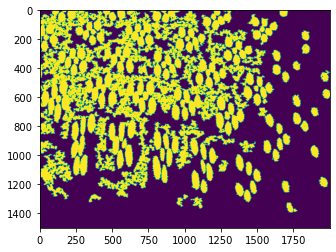

49  <=50 and number_1 >=25 
24 >= 2
######################################################################
(this iteration is with g value, 92 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 21% - Timestamp: 2023-04-02 13:52:37
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 13:52:37
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 13:52:37
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 13:52:37
time taken for iteration 96
Execution time: 80.32 seconds


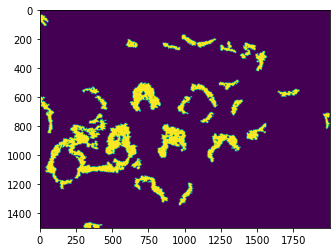

27  <=50 and number_1 >=25 
22 >= 2
######################################################################
(this iteration is with g value, 95 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 13:53:03
A100-SXM4-40GB - 1564620000653 - Utilization: 22% - Timestamp: 2023-04-02 13:53:03
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 13:53:03
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 13:53:03
time taken for iteration 91
Execution time: 42.79 seconds


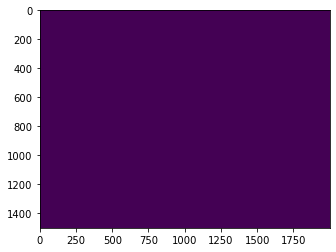

5  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 90 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 13:53:15
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 13:53:15
A100-SXM4-40GB - 1564520013405 - Utilization: 0% - Timestamp: 2023-04-02 13:53:15
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 13:53:15
time taken for iteration 92
Execution time: 52.94 seconds


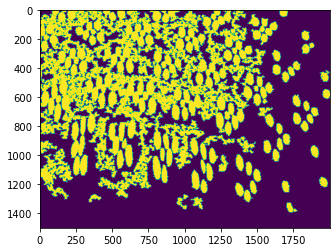

49  <=50 and number_1 >=25 
24 >= 2
######################################################################
(this iteration is with g value, 91 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 13:53:58
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 13:53:58
A100-SXM4-40GB - 1564520013405 - Utilization: 0% - Timestamp: 2023-04-02 13:53:58
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 13:53:58
time taken for iteration 91
Execution time: 42.23 seconds


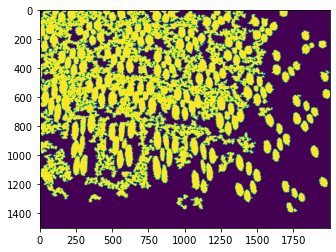

52  <=50 and number_1 >=25 
24 >= 2
######################################################################
(this iteration is with g value, 90 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 13:54:08
A100-SXM4-40GB - 1564620000653 - Utilization: 25% - Timestamp: 2023-04-02 13:54:08
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 13:54:08
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 13:54:08
time taken for iteration 90
Execution time: 63.63 seconds


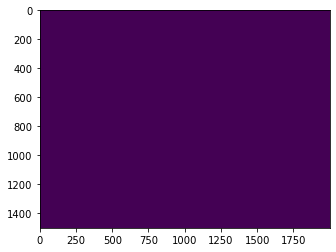

3  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 89 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 0% - Timestamp: 2023-04-02 13:54:40
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 13:54:40
A100-SXM4-40GB - 1564520013405 - Utilization: 39% - Timestamp: 2023-04-02 13:54:40
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 13:54:40
time taken for iteration 95
Execution time: 121.49 seconds


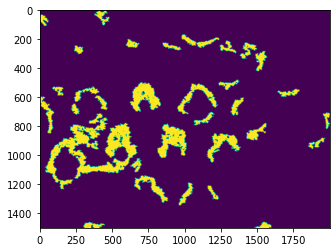

34  <=50 and number_1 >=25 
24 >= 2
######################################################################
(this iteration is with g value, 94 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 93% - Timestamp: 2023-04-02 13:54:41
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 13:54:41
A100-SXM4-40GB - 1564520013405 - Utilization: 0% - Timestamp: 2023-04-02 13:54:41
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 13:54:41
time taken for iteration 90
Execution time: 41.99 seconds


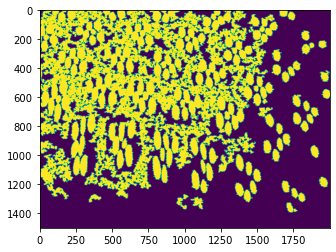

50  <=50 and number_1 >=25 
24 >= 2
######################################################################
(this iteration is with g value, 89 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 13:55:04
A100-SXM4-40GB - 1564620000653 - Utilization: 11% - Timestamp: 2023-04-02 13:55:04
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 13:55:04
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 13:55:04
time taken for iteration 89
Execution time: 55.12 seconds


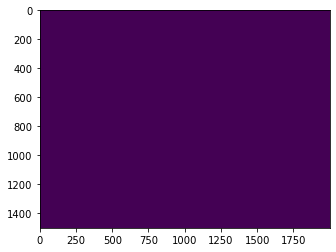

2  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 88 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 13:55:24
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 13:55:24
A100-SXM4-40GB - 1564520013405 - Utilization: 0% - Timestamp: 2023-04-02 13:55:24
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 13:55:24
time taken for iteration 89
Execution time: 41.83 seconds


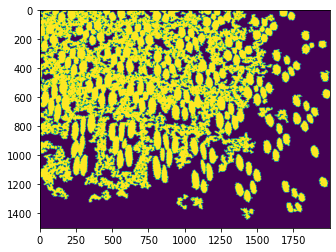

51  <=50 and number_1 >=25 
24 >= 2
######################################################################
(this iteration is with g value, 88 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 13:55:50
A100-SXM4-40GB - 1564620000653 - Utilization: 11% - Timestamp: 2023-04-02 13:55:50
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 13:55:50
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 13:55:50
time taken for iteration 88
Execution time: 45.50 seconds


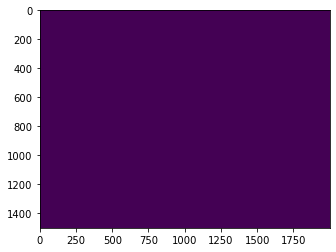

2  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 87 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 13:56:06
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 13:56:06
A100-SXM4-40GB - 1564520013405 - Utilization: 0% - Timestamp: 2023-04-02 13:56:06
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 13:56:06
time taken for iteration 88
Execution time: 41.42 seconds


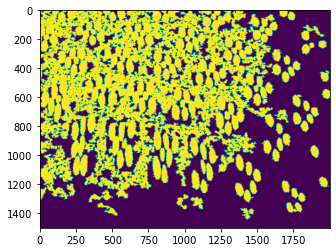

50  <=50 and number_1 >=25 
20 >= 2
######################################################################
(this iteration is with g value, 87 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 0% - Timestamp: 2023-04-02 13:56:16
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 13:56:16
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 13:56:16
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 13:56:16
time taken for iteration 94
Execution time: 95.05 seconds


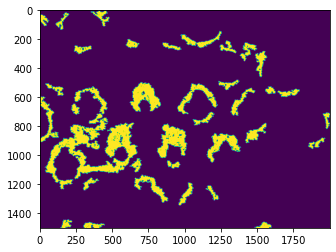

37  <=50 and number_1 >=25 
28 >= 2
######################################################################
(this iteration is with g value, 93 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 13:56:49
A100-SXM4-40GB - 1564620000653 - Utilization: 41% - Timestamp: 2023-04-02 13:56:49
A100-SXM4-40GB - 1564520013405 - Utilization: 10% - Timestamp: 2023-04-02 13:56:49
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 13:56:49
time taken for iteration A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 13:56:4987

A100-SXM4-40GB - 1564620000653 - Utilization: 20% - Timestamp: 2023-04-02 13:56:49Execution time: 41.68 seconds

A100-SXM4-40GB - 1564520013405 - Utilization: 10% - Timestamp: 2023-04-02 13:56:49
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 13:56:49
time taken for iteration 87
Execution time: 58.31 seconds


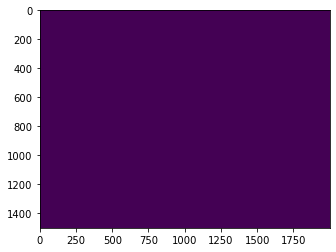

52  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 86 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2


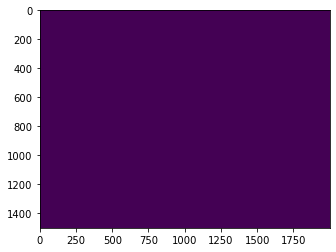

2  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 86 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 13:57:32
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 13:57:32
A100-SXM4-40GB - 1564520013405 - Utilization: 11% - Timestamp: 2023-04-02 13:57:32
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 13:57:32
time taken for iteration 86
Execution time: 42.26 seconds


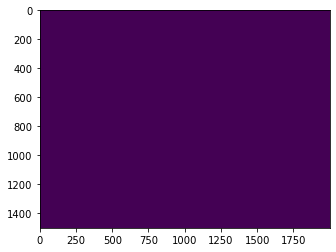

54  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 85 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 13:57:51
A100-SXM4-40GB - 1564620000653 - Utilization: 41% - Timestamp: 2023-04-02 13:57:51
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 13:57:51
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 13:57:51
time taken for iteration 93A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 13:57:51

Execution time: 94.12 secondsA100-SXM4-40GB - 1564620000653 - Utilization: 22% - Timestamp: 2023-04-02 13:57:51

A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 13:57:51
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 13:57:51
time taken for iteration 86
Execution time: 60.32 seconds


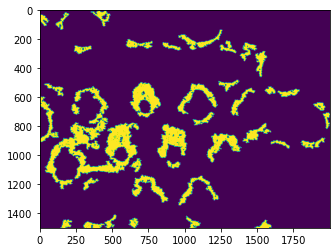

41  <=50 and number_1 >=25 
32 >= 2
######################################################################
(this iteration is with g value, 92 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0

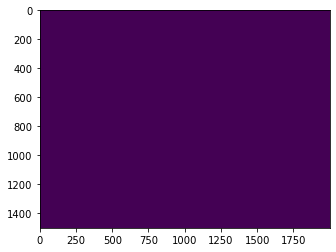


2  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 85 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 13:58:15
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 13:58:15
A100-SXM4-40GB - 1564520013405 - Utilization: 11% - Timestamp: 2023-04-02 13:58:15
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 13:58:15
time taken for iteration 85
Execution time: 41.68 seconds


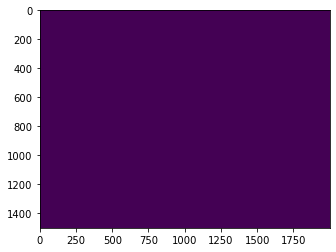

52  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 84 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 13:58:40
A100-SXM4-40GB - 1564620000653 - Utilization: 11% - Timestamp: 2023-04-02 13:58:40
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 13:58:40
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 13:58:41
time taken for iteration 85
Execution time: 48.72 seconds


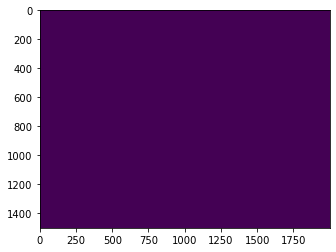

2  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 84 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 13:58:57
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 13:58:57
A100-SXM4-40GB - 1564520013405 - Utilization: 11% - Timestamp: 2023-04-02 13:58:57
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 13:58:57
time taken for iteration 84
Execution time: 41.50 seconds


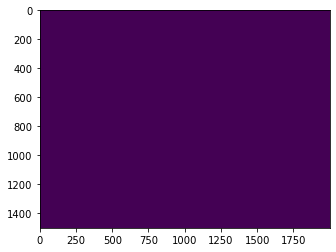

46  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 83 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 84% - Timestamp: 2023-04-02 13:59:45
A100-SXM4-40GB - 1564620000653 - Utilization: 17% - Timestamp: 2023-04-02 13:59:45
A100-SXM4-40GB - 1564520013405 - Utilization: 27% - Timestamp: 2023-04-02 13:59:45
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 13:59:45
time taken for iteration 84
Execution time: 63.48 seconds


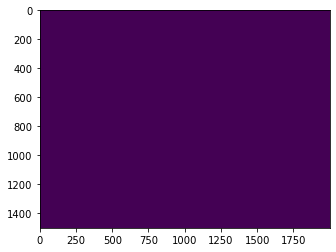

2  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 83 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 0% - Timestamp: 2023-04-02 13:59:49
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 13:59:49
A100-SXM4-40GB - 1564520013405 - Utilization: 40% - Timestamp: 2023-04-02 13:59:49
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 13:59:49
time taken for iteration 92
Execution time: 117.38 seconds


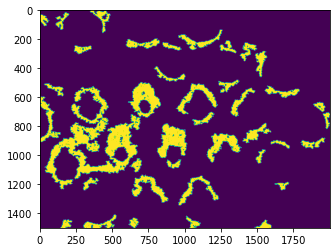

41  <=50 and number_1 >=25 
40 >= 2
######################################################################
(this iteration is with g value, 91 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 13:59:51
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 13:59:51
A100-SXM4-40GB - 1564520013405 - Utilization: 11% - Timestamp: 2023-04-02 13:59:51
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 13:59:51
time taken for iteration 83
Execution time: 52.60 seconds


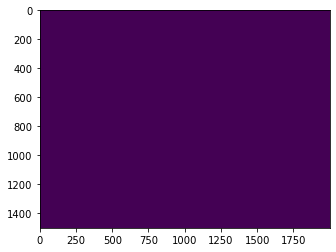

42  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 82 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:00:32
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 14:00:32
A100-SXM4-40GB - 1564520013405 - Utilization: 16% - Timestamp: 2023-04-02 14:00:32
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:00:32
time taken for iteration 82
Execution time: 40.54 seconds


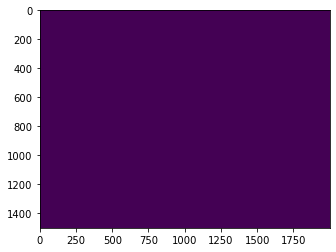

39  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 81 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:00:50
A100-SXM4-40GB - 1564620000653 - Utilization: 24% - Timestamp: 2023-04-02 14:00:50
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:00:50
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:00:50
time taken for iteration 83
Execution time: 64.43 seconds


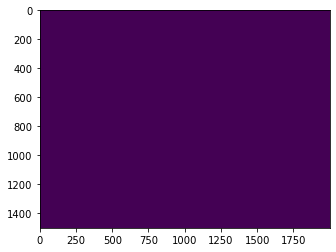

2  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 82 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:01:13
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 14:01:14
A100-SXM4-40GB - 1564520013405 - Utilization: 11% - Timestamp: 2023-04-02 14:01:14
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:01:14
time taken for iteration 81
Execution time: 40.69 seconds


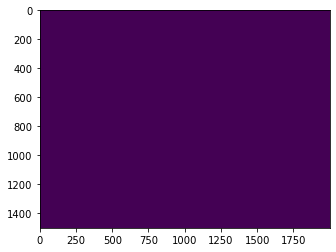

36  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 80 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 26% - Timestamp: 2023-04-02 14:01:22
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 14:01:22
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:01:22
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:01:22
time taken for iteration 91
Execution time: 92.49 seconds


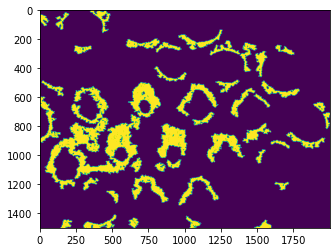

44  <=50 and number_1 >=25 
44 >= 2
######################################################################
(this iteration is with g value, 90 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:01:44
A100-SXM4-40GB - 1564620000653 - Utilization: 17% - Timestamp: 2023-04-02 14:01:44
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:01:44
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:01:44
time taken for iteration 82
Execution time: 52.71 seconds


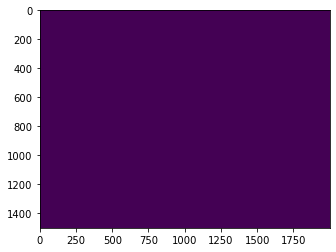

2  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 81 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:01:55
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 14:01:55
A100-SXM4-40GB - 1564520013405 - Utilization: 11% - Timestamp: 2023-04-02 14:01:55
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:01:55
time taken for iteration 80
Execution time: 40.24 seconds


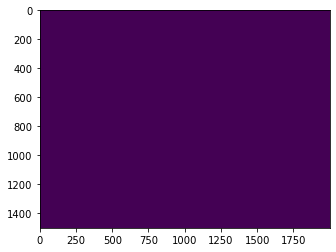

35  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 79 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:02:35
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 14:02:35
A100-SXM4-40GB - 1564520013405 - Utilization: 10% - Timestamp: 2023-04-02 14:02:35
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:02:35
time taken for iteration 79
Execution time: 39.77 seconds


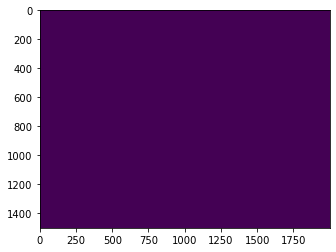

31  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 78 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:02:52
A100-SXM4-40GB - 1564620000653 - Utilization: 21% - Timestamp: 2023-04-02 14:02:52
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:02:52
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:02:52
time taken for iteration 81
Execution time: 67.81 seconds
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:02:53
A100-SXM4-40GB - 1564620000653 - Utilization: 0% - Timestamp: 2023-04-02 14:02:53
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:02:53
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:02:53
time taken for iteration 90


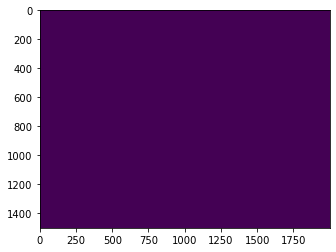

Execution time: 89.27 seconds2
  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 80 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1


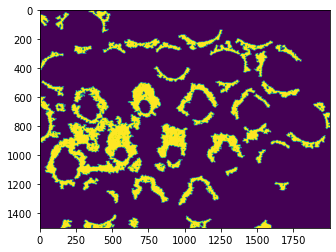

47  <=50 and number_1 >=25 
48 >= 2
######################################################################
(this iteration is with g value, 89 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:03:16
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 14:03:16
A100-SXM4-40GB - 1564520013405 - Utilization: 11% - Timestamp: 2023-04-02 14:03:16
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:03:16
time taken for iteration 78
Execution time: 40.17 seconds


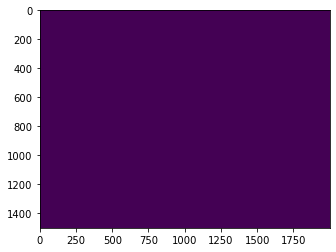

28  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 77 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:03:57
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 14:03:57
A100-SXM4-40GB - 1564520013405 - Utilization: 11% - Timestamp: 2023-04-02 14:03:57
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:03:57
time taken for iteration 77
Execution time: 39.74 seconds


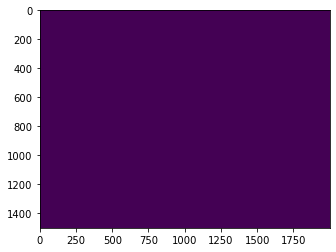

20  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 76 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:04:03
A100-SXM4-40GB - 1564620000653 - Utilization: 11% - Timestamp: 2023-04-02 14:04:03
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:04:03
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:04:03
time taken for iteration 80
Execution time: 69.39 seconds


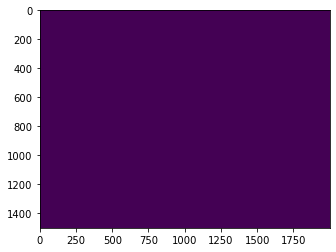

2  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 79 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:04:20
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 14:04:20
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:04:20
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:04:20
time taken for iteration 89
Execution time: 85.67 seconds


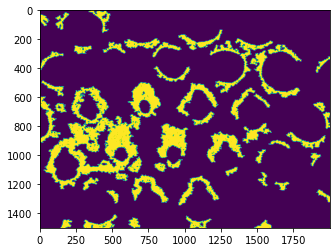

49  <=50 and number_1 >=25 
46 >= 2
######################################################################
(this iteration is with g value, 88 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:04:37
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 14:04:38
A100-SXM4-40GB - 1564520013405 - Utilization: 15% - Timestamp: 2023-04-02 14:04:38
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:04:38
time taken for iteration 76
Execution time: 39.70 seconds


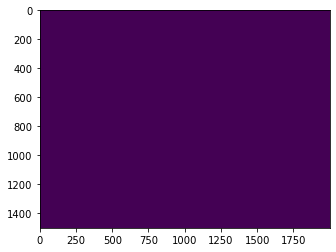

19  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 75 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:04:59
A100-SXM4-40GB - 1564620000653 - Utilization: 34% - Timestamp: 2023-04-02 14:04:59
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:04:59
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:04:59
time taken for iteration 79
Execution time: 55.59 seconds


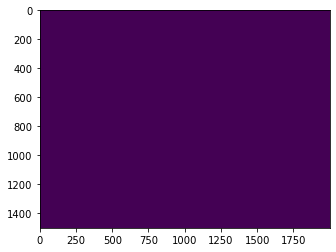

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 78 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:05:30
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 14:05:30
A100-SXM4-40GB - 1564520013405 - Utilization: 10% - Timestamp: 2023-04-02 14:05:30
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:05:30
time taken for iteration 75
Execution time: 51.86 seconds


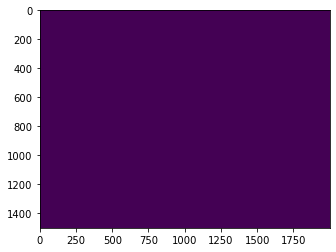

16  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 74 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 0% - Timestamp: 2023-04-02 14:06:09
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 14:06:09
A100-SXM4-40GB - 1564520013405 - Utilization: 37% - Timestamp: 2023-04-02 14:06:09
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:06:09
time taken for iteration 88
Execution time: 107.79 seconds


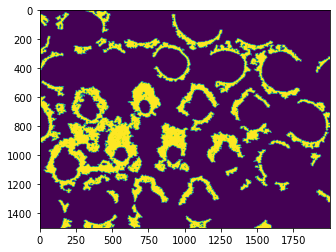

50  <=50 and number_1 >=25 
54 >= 2
######################################################################
(this iteration is with g value, 87 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:06:12
A100-SXM4-40GB - 1564620000653 - Utilization: 37% - Timestamp: 2023-04-02 14:06:12
A100-SXM4-40GB - 1564520013405 - Utilization: 10% - Timestamp: 2023-04-02 14:06:12
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:06:12
time taken for iteration 74
Execution time: 40.98 seconds
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:06:13
A100-SXM4-40GB - 1564620000653 - Utilization: 11% - Timestamp: 2023-04-02 14:06:13
A100-SXM4-40GB - 1564520013405 - Utilization: 0% - Timestamp: 2023-04-02 14:06:13
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:06:13
time taken for iteration 78
Execution time: 72.63 seconds

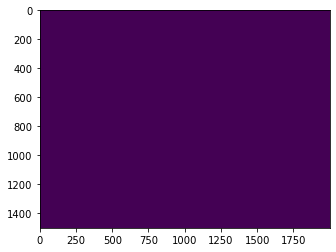


15  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 73 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2


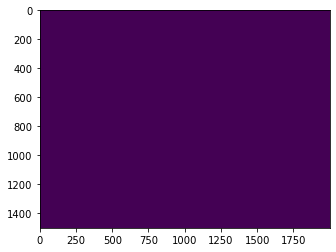

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 77 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:06:53
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 14:06:53
A100-SXM4-40GB - 1564520013405 - Utilization: 13% - Timestamp: 2023-04-02 14:06:53
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:06:53
time taken for iteration 73
Execution time: 40.31 seconds


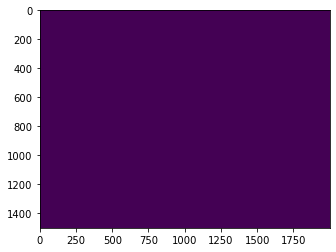

9  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 72 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:07:28
A100-SXM4-40GB - 1564620000653 - Utilization: 19% - Timestamp: 2023-04-02 14:07:28
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:07:28
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:07:28
time taken for iteration 77
Execution time: 74.01 seconds


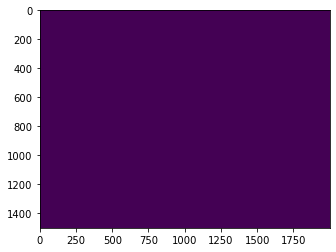

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 76 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:07:35
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 14:07:35
A100-SXM4-40GB - 1564520013405 - Utilization: 11% - Timestamp: 2023-04-02 14:07:35
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:07:35
time taken for iteration 72
Execution time: 40.44 seconds


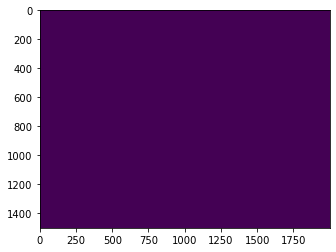

10  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 71 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 0% - Timestamp: 2023-04-02 14:07:49
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 14:07:49
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:07:49
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:07:49
time taken for iteration 87
Execution time: 99.04 seconds


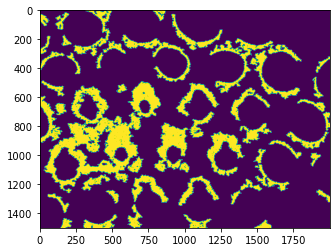

53  <=50 and number_1 >=25 
58 >= 2
######################################################################
(this iteration is with g value, 86 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:08:16
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 14:08:16
A100-SXM4-40GB - 1564520013405 - Utilization: 11% - Timestamp: 2023-04-02 14:08:16
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:08:16
time taken for iteration 71
Execution time: 40.98 seconds


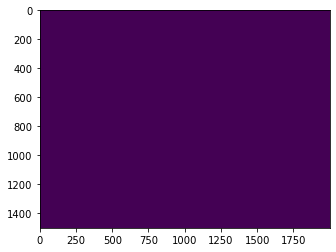

8  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 70 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:08:43
A100-SXM4-40GB - 1564620000653 - Utilization: 39% - Timestamp: 2023-04-02 14:08:43
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:08:43
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:08:43
time taken for iteration 76
Execution time: 74.96 seconds


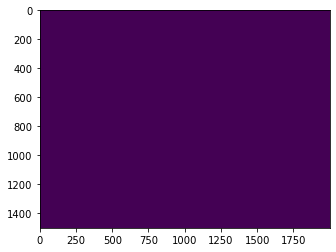

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 75 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 0% - Timestamp: 2023-04-02 14:08:55
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 14:08:55
A100-SXM4-40GB - 1564520013405 - Utilization: 24% - Timestamp: 2023-04-02 14:08:55
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:08:55
time taken for iteration 86
Execution time: 65.58 seconds


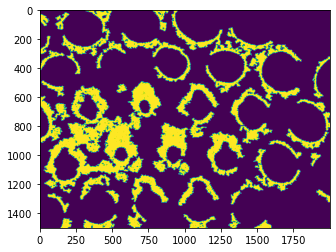

51  <=50 and number_1 >=25 
58 >= 2
######################################################################
(this iteration is with g value, 85 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:08:58
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 14:08:58
A100-SXM4-40GB - 1564520013405 - Utilization: 35% - Timestamp: 2023-04-02 14:08:58
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:08:58
time taken for iteration 70
Execution time: 41.32 seconds


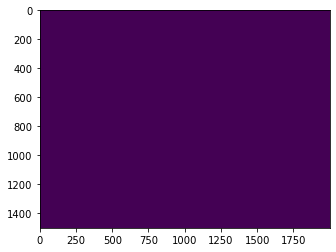

8  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 69 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:09:53
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 14:09:53
A100-SXM4-40GB - 1564520013405 - Utilization: 23% - Timestamp: 2023-04-02 14:09:53
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:09:53
time taken for iteration 69
Execution time: 54.01 seconds


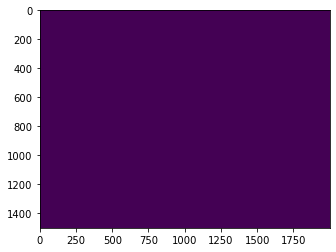

7  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 68 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 0% - Timestamp: 2023-04-02 14:10:00
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 14:10:00
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:10:00
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:10:00
time taken for iteration 85
Execution time: 63.68 seconds


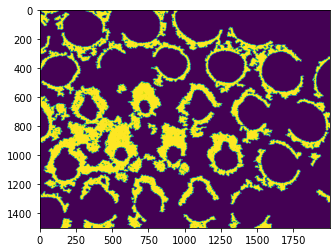

47  <=50 and number_1 >=25 
56 A100-SXM4-40GB - 1564520013243 - Utilization: 0% - Timestamp: 2023-04-02 14:10:01>= 2

A100-SXM4-40GB - 1564620000653 - Utilization: 53% - Timestamp: 2023-04-02 14:10:01######################################################################

A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:10:01(this iteration is with g value, 84 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0

A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:10:01
time taken for iteration 75
Execution time: 76.48 seconds


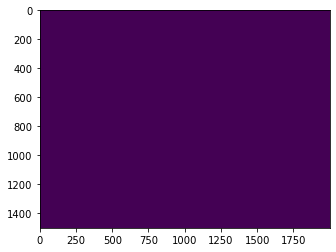

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 74 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:10:37
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 14:10:37
A100-SXM4-40GB - 1564520013405 - Utilization: 24% - Timestamp: 2023-04-02 14:10:37
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:10:37
time taken for iteration 68
Execution time: 43.21 seconds


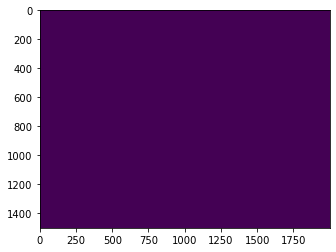

6  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 67 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 0% - Timestamp: 2023-04-02 14:11:04
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 14:11:04
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:11:04
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:11:04
time taken for iteration 84
Execution time: 63.19 seconds


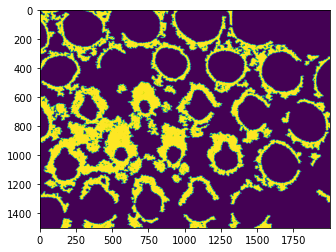

40  <=50 and number_1 >=25 
50 >= 2
######################################################################
(this iteration is with g value, 83 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:11:19
A100-SXM4-40GB - 1564620000653 - Utilization: 42% - Timestamp: 2023-04-02 14:11:19
A100-SXM4-40GB - 1564520013405 - Utilization: 56% - Timestamp: 2023-04-02 14:11:19
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:11:19
time taken for iteration 74
Execution time: 77.98 seconds


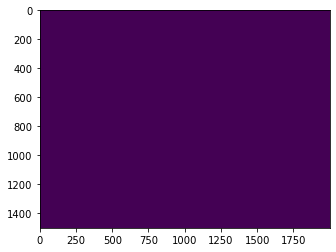

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 73 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:11:22
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 14:11:22
A100-SXM4-40GB - 1564520013405 - Utilization: 14% - Timestamp: 2023-04-02 14:11:22
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:11:22
time taken for iteration 67
Execution time: 44.19 seconds


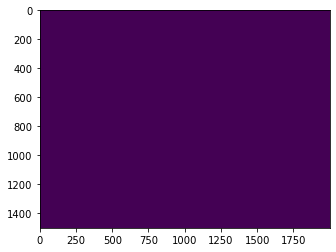

6  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 66 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 11% - Timestamp: 2023-04-02 14:11:53
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 14:11:53
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:11:53
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:11:53
time taken for iteration 83
Execution time: 48.69 seconds


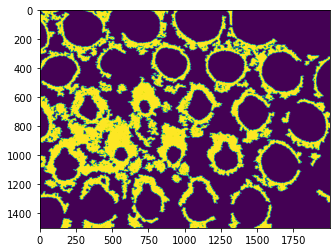

37  <=50 and number_1 >=25 
46 >= 2
######################################################################
(this iteration is with g value, 82 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:12:19
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 14:12:19
A100-SXM4-40GB - 1564520013405 - Utilization: 44% - Timestamp: 2023-04-02 14:12:19
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:12:19
time taken for iteration 66
Execution time: 56.78 seconds


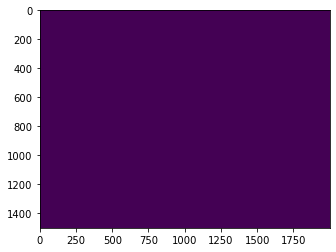

6  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 65 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:12:39
A100-SXM4-40GB - 1564620000653 - Utilization: 40% - Timestamp: 2023-04-02 14:12:39
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:12:39
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:12:39
time taken for iteration 73
Execution time: 79.42 seconds


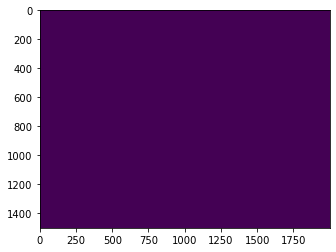

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 72 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 10% - Timestamp: 2023-04-02 14:12:54
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 14:12:54
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:12:54
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:12:54
time taken for iteration 82
Execution time: 60.01 seconds


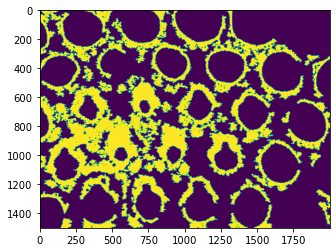

36  <=50 and number_1 >=25 
46 >= 2
######################################################################
(this iteration is with g value, 81 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:13:05
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 14:13:05
A100-SXM4-40GB - 1564520013405 - Utilization: 21% - Timestamp: 2023-04-02 14:13:05
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:13:05
time taken for iteration 65
Execution time: 45.33 seconds


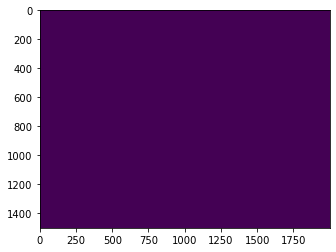

3  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 64 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 10% - Timestamp: 2023-04-02 14:13:53
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 14:13:53
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:13:53
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:13:54
time taken for iteration 81
Execution time: 58.85 seconds


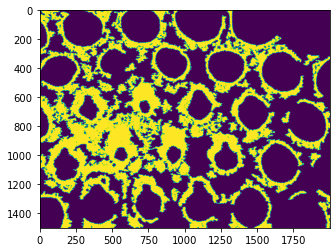

27  <=50 and number_1 >=25 
34 >= 2
######################################################################
(this iteration is with g value, 80 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:14:01
A100-SXM4-40GB - 1564620000653 - Utilization: 39% - Timestamp: 2023-04-02 14:14:01
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:14:01
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:14:01
time taken for iteration 72
Execution time: 80.93 seconds


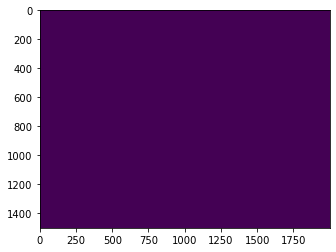

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 71 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:14:05
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 14:14:05
A100-SXM4-40GB - 1564520013405 - Utilization: 11% - Timestamp: 2023-04-02 14:14:05
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:14:05
time taken for iteration 64
Execution time: 59.24 seconds


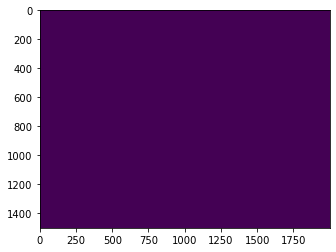

3  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 63 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 3% - Timestamp: 2023-04-02 14:14:40
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 14:14:40
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:14:40
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:14:40
time taken for iteration 80
Execution time: 45.32 seconds


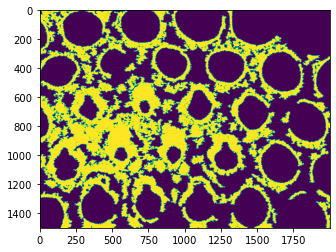

21  <=50 and number_1 >=25 
28 >= 2
######################################################################
(this iteration is with g value, 79 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:14:52
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 14:14:52
A100-SXM4-40GB - 1564520013405 - Utilization: 31% - Timestamp: 2023-04-02 14:14:53
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:14:53
time taken for iteration 63
Execution time: 46.95 seconds


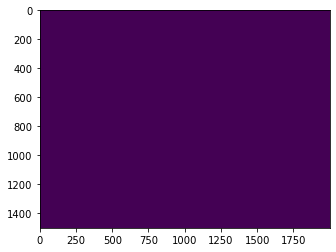

3  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 62 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:15:24
A100-SXM4-40GB - 1564620000653 - Utilization: 55% - Timestamp: 2023-04-02 14:15:24
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:15:24
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:15:24
time taken for iteration 71
Execution time: 82.07 seconds


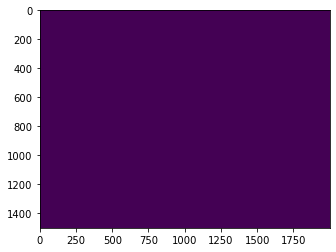

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 70 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 14% - Timestamp: 2023-04-02 14:15:35
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 14:15:35
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:15:35
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:15:35
time taken for iteration 79
Execution time: 54.78 seconds


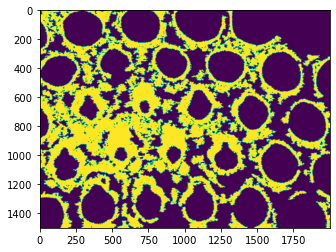

13  <=50 and number_1 >=25 
16 >= 2
######################################################################
(this iteration is with g value, 78 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:15:41
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 14:15:41
A100-SXM4-40GB - 1564520013405 - Utilization: 27% - Timestamp: 2023-04-02 14:15:41
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:15:41
time taken for iteration 62
Execution time: 48.22 seconds


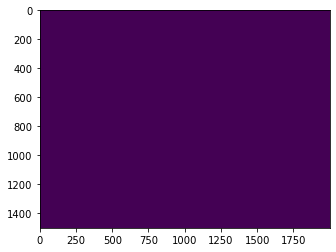

3  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 61 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 58% - Timestamp: 2023-04-02 14:16:29
A100-SXM4-40GB - 1564620000653 - Utilization: 58% - Timestamp: 2023-04-02 14:16:29
A100-SXM4-40GB - 1564520013405 - Utilization: 56% - Timestamp: 2023-04-02 14:16:29
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:16:29
time taken for iteration 70
Execution time: 64.80 seconds


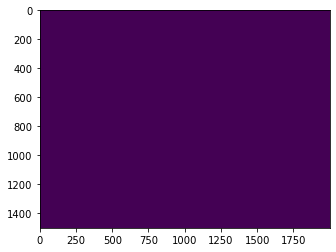

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 69 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 16% - Timestamp: 2023-04-02 14:16:30
A100-SXM4-40GB - 1564620000653 - Utilization: 78% - Timestamp: 2023-04-02 14:16:30
A100-SXM4-40GB - 1564520013405 - Utilization: 54% - Timestamp: 2023-04-02 14:16:31
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:16:31
time taken for iteration 78
Execution time: 54.41 seconds
A100-SXM4-40GB - 1564520013243 - Utilization: 10% - Timestamp: 2023-04-02 14:16:31
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 14:16:31
A100-SXM4-40GB - 1564520013405 - Utilization: 41% - Timestamp: 2023-04-02 14:16:31
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:16:31
time taken for iteration 61
Execution time: 48.65 seconds


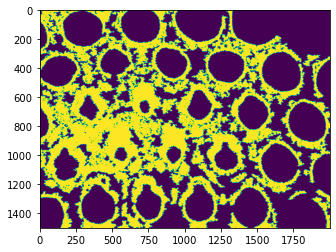

11  <=50 and number_1 >=25 
14 >= 2
######################################################################
(this iteration is with g value, 77 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0


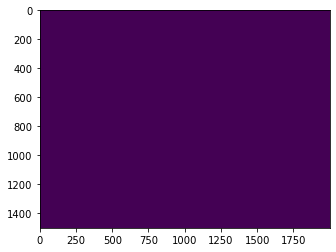

3  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 60 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 22% - Timestamp: 2023-04-02 14:17:25
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 14:17:25
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:17:25
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:17:25
time taken for iteration 77
Execution time: 53.50 seconds


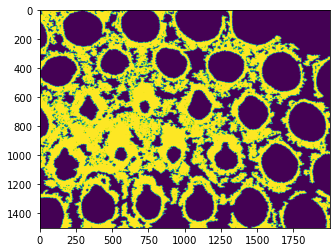

10  <=50 and number_1 >=25 
12 >= 2
######################################################################
(this iteration is with g value, 76 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:17:34
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 14:17:34
A100-SXM4-40GB - 1564520013405 - Utilization: 31% - Timestamp: 2023-04-02 14:17:35
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:17:35
time taken for iteration 60
Execution time: 63.14 seconds


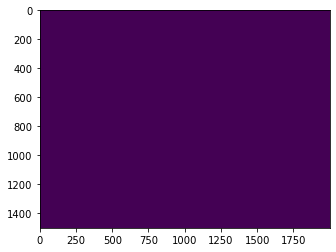

3  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 59 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:17:36
A100-SXM4-40GB - 1564620000653 - Utilization: 45% - Timestamp: 2023-04-02 14:17:36
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:17:36
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:17:36
time taken for iteration 69
Execution time: 65.84 seconds


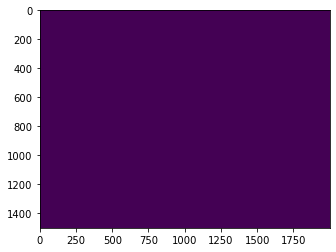

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 68 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 97% - Timestamp: 2023-04-02 14:18:26
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 14:18:26
A100-SXM4-40GB - 1564520013405 - Utilization: 14% - Timestamp: 2023-04-02 14:18:26
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:18:26
time taken for iteration 59
Execution time: 51.06 seconds


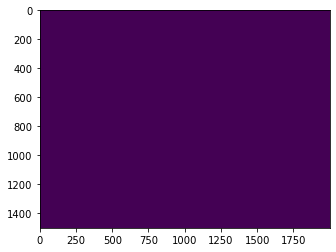

2  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 58 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:18:31
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 14:18:31
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:18:31
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:18:31
time taken for iteration 76
Execution time: 65.75 seconds


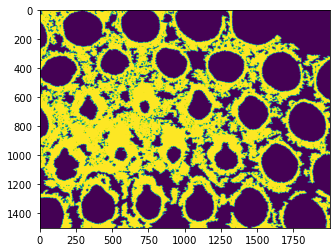

5  <=50 and number_1 >=25 
8 >= 2
######################################################################
(this iteration is with g value, 75 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:19:02
A100-SXM4-40GB - 1564620000653 - Utilization: 27% - Timestamp: 2023-04-02 14:19:02
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:19:02
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:19:02
time taken for iteration 68
Execution time: 85.59 seconds


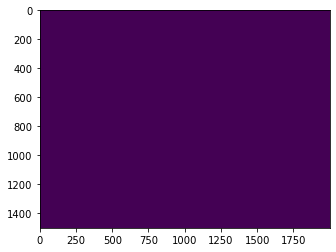

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 67 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:19:18
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 14:19:18
A100-SXM4-40GB - 1564520013405 - Utilization: 34% - Timestamp: 2023-04-02 14:19:18
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:19:18
time taken for iteration 58
Execution time: 51.27 seconds


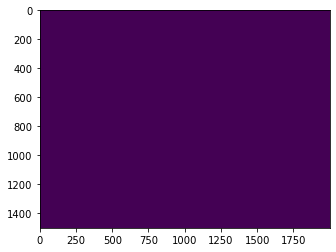

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 57 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 15% - Timestamp: 2023-04-02 14:19:26
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 14:19:26
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:19:26
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:19:26
time taken for iteration 75
Execution time: 54.30 seconds


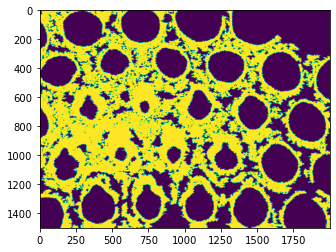

2  <=50 and number_1 >=25 
4 >= 2
######################################################################
(this iteration is with g value, 74 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:20:11
A100-SXM4-40GB - 1564620000653 - Utilization: 34% - Timestamp: 2023-04-02 14:20:11
A100-SXM4-40GB - 1564520013405 - Utilization: 37% - Timestamp: 2023-04-02 14:20:11
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:20:11
time taken for iteration 67
Execution time: 68.13 seconds
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:20:12
A100-SXM4-40GB - 1564620000653 - Utilization: 0% - Timestamp: 2023-04-02 14:20:12
A100-SXM4-40GB - 1564520013405 - Utilization: 24% - Timestamp: 2023-04-02 14:20:12
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:20:12

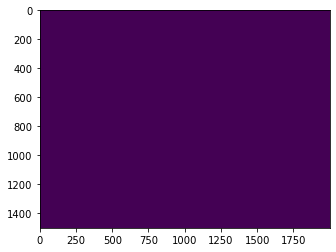


1time taken for iteration   <=50 and number_1 >=25 57

0Execution time: 52.68 seconds 
>= 2
######################################################################
(this iteration is with g value, 66 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1


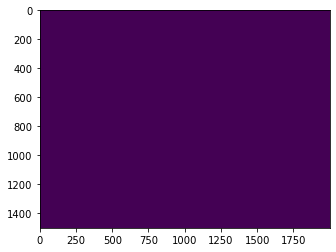

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 56 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 11% - Timestamp: 2023-04-02 14:20:25
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 14:20:25
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:20:25
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:20:25
time taken for iteration 74
Execution time: 58.44 seconds


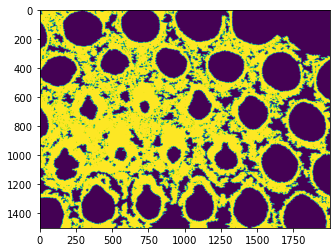

1  <=50 and number_1 >=25 
2 >= 2
######################################################################
(this iteration is with g value, 73 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:21:05
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 14:21:05
A100-SXM4-40GB - 1564520013405 - Utilization: 30% - Timestamp: 2023-04-02 14:21:05
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:21:05
time taken for iteration 56
Execution time: 52.37 seconds


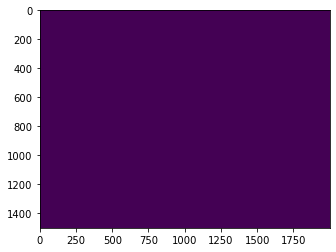

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 55 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 57% - Timestamp: 2023-04-02 14:21:21
A100-SXM4-40GB - 1564620000653 - Utilization: 36% - Timestamp: 2023-04-02 14:21:21
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:21:21
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:21:21
time taken for iteration 66
Execution time: 68.87 seconds


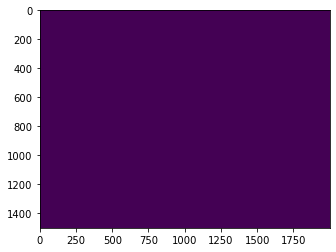

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 65 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 11% - Timestamp: 2023-04-02 14:21:26
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 14:21:26
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:21:26
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:21:26
time taken for iteration 73
Execution time: 59.86 seconds


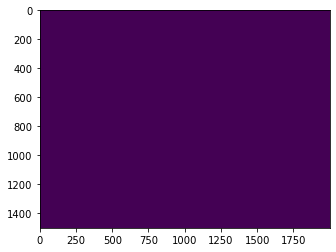

2  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 72 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:22:15
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 14:22:15
A100-SXM4-40GB - 1564520013405 - Utilization: 17% - Timestamp: 2023-04-02 14:22:15
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:22:15
time taken for iteration 55
Execution time: 69.04 seconds


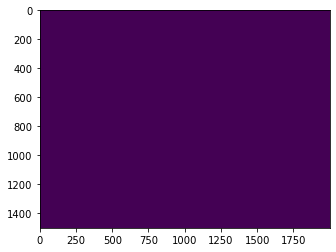

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 54 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 14% - Timestamp: 2023-04-02 14:22:22
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 14:22:22
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:22:22
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:22:22
time taken for iteration 72
Execution time: 54.74 seconds


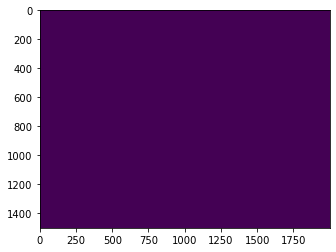

2  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 71 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:22:50
A100-SXM4-40GB - 1564620000653 - Utilization: 11% - Timestamp: 2023-04-02 14:22:50
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:22:50
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:22:50
time taken for iteration 65
Execution time: 88.94 seconds


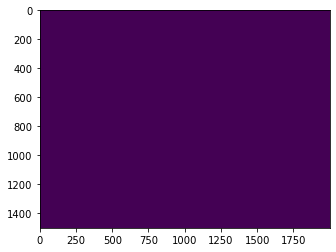

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 64 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 0% - Timestamp: 2023-04-02 14:23:10
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 14:23:10
A100-SXM4-40GB - 1564520013405 - Utilization: 43% - Timestamp: 2023-04-02 14:23:10
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:23:10
time taken for iteration 54
Execution time: 54.42 seconds


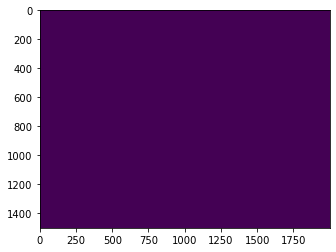

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 53 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 23% - Timestamp: 2023-04-02 14:23:14
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 14:23:14
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:23:15
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:23:15
time taken for iteration 71
Execution time: 51.82 seconds


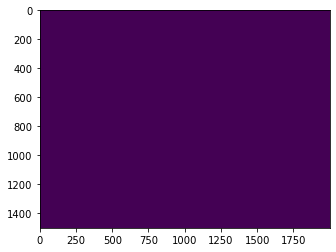

2  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 70 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:24:06
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 14:24:06
A100-SXM4-40GB - 1564520013405 - Utilization: 14% - Timestamp: 2023-04-02 14:24:06
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:24:06
time taken for iteration 53
Execution time: 55.61 seconds


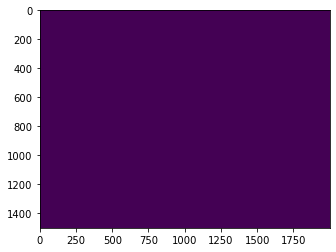

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 52 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:24:22
A100-SXM4-40GB - 1564620000653 - Utilization: 19% - Timestamp: 2023-04-02 14:24:22
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:24:22
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:24:22
time taken for iteration 64
Execution time: 90.44 seconds


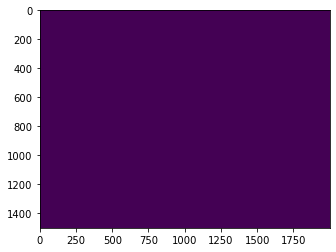

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 63 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:24:23
A100-SXM4-40GB - 1564620000653 - Utilization: 0% - Timestamp: 2023-04-02 14:24:23
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:24:23
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:24:23
time taken for iteration 70
Execution time: 67.70 seconds


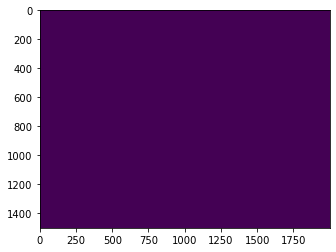

2  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 69 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:25:20
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 14:25:20
A100-SXM4-40GB - 1564520013405 - Utilization: 27% - Timestamp: 2023-04-02 14:25:20
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:25:20
time taken for iteration 52
Execution time: 72.74 seconds


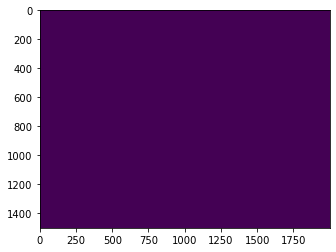

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 51 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:25:34
A100-SXM4-40GB - 1564620000653 - Utilization: 55% - Timestamp: 2023-04-02 14:25:34
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:25:34
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:25:34
time taken for iteration 63
Execution time: 71.45 seconds


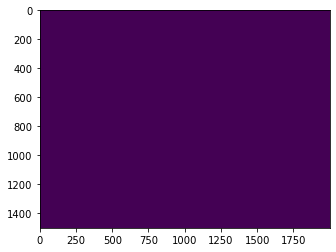

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 62 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:25:39
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 14:25:39
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:25:39
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:25:39
time taken for iteration 69
Execution time: 75.13 seconds


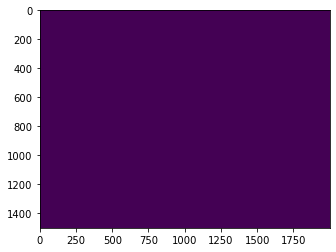

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 68 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:26:18
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 14:26:18
A100-SXM4-40GB - 1564520013405 - Utilization: 24% - Timestamp: 2023-04-02 14:26:18
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:26:18
time taken for iteration 51
Execution time: 57.17 seconds


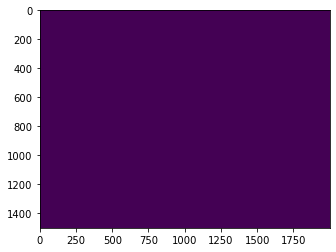

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 50 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:27:07
A100-SXM4-40GB - 1564620000653 - Utilization: 77% - Timestamp: 2023-04-02 14:27:07
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:27:07
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:27:07
time taken for iteration 62
Execution time: 91.70 seconds


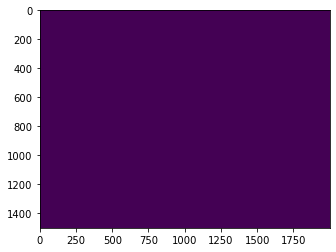

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 61 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:27:08
A100-SXM4-40GB - 1564620000653 - Utilization: 24% - Timestamp: 2023-04-02 14:27:08
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:27:08
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:27:08
time taken for iteration 61
Execution time: 0.50 seconds


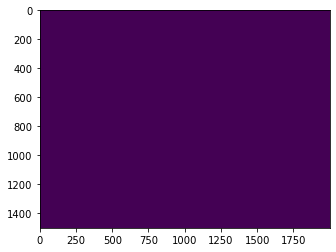

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 60 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:27:09
A100-SXM4-40GB - 1564620000653 - Utilization: 26% - Timestamp: 2023-04-02 14:27:09
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:27:10
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:27:10
time taken for iteration 60
Execution time: 0.52 seconds


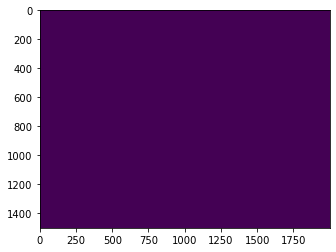

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 59 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 57% - Timestamp: 2023-04-02 14:27:11
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:27:11A100-SXM4-40GB - 1564620000653 - Utilization: 24% - Timestamp: 2023-04-02 14:27:11

A100-SXM4-40GB - 1564620000653 - Utilization: 24% - Timestamp: 2023-04-02 14:27:11A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:27:11

A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:27:11A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:27:11

A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:27:11time taken for iteration 
68time taken for iteration
 Execution time: 90.97 seconds59

Execution time: 0.46 seconds


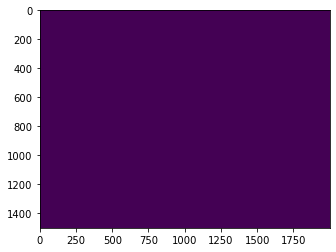

1

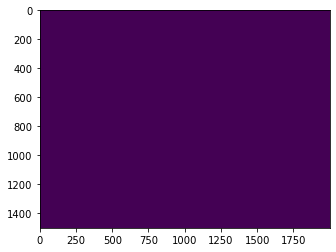

  <=50 and number_1 >=25 1
 0 <=50 and number_1 >=25  
>= 20
 ######################################################################>= 2

(this iteration is with g value, 67 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0######################################################################

(this iteration is with g value, 58 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 69% - Timestamp: 2023-04-02 14:27:12
A100-SXM4-40GB - 1564620000653 - Utilization: 18% - Timestamp: 2023-04-02 14:27:12
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:27:12
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:27:12
time taken for iteration 58
Execution time: 0.43 seconds


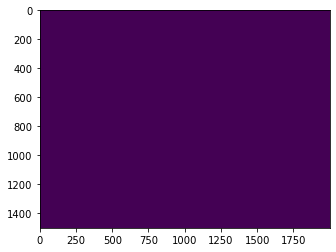

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 57 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:27:13
A100-SXM4-40GB - 1564620000653 - Utilization: 22% - Timestamp: 2023-04-02 14:27:13
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:27:13
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:27:13
time taken for iteration 57
Execution time: 0.45 seconds


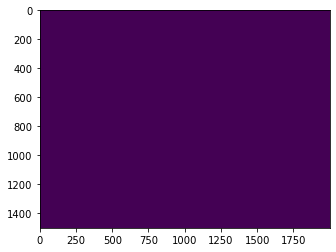

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 56 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:27:15
A100-SXM4-40GB - 1564620000653 - Utilization: 27% - Timestamp: 2023-04-02 14:27:15
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:27:15
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:27:15
time taken for iteration 56
Execution time: 0.42 seconds


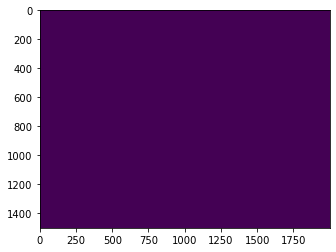

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 55 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:27:16
A100-SXM4-40GB - 1564620000653 - Utilization: 29% - Timestamp: 2023-04-02 14:27:16
A100-SXM4-40GB - 1564520013405 - Utilization: 31% - Timestamp: 2023-04-02 14:27:16
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:27:16
time taken for iteration 55
Execution time: 0.47 seconds
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:27:17
A100-SXM4-40GB - 1564620000653 - Utilization: 0% - Timestamp: 2023-04-02 14:27:17
A100-SXM4-40GB - 1564520013405 - Utilization: 27% - Timestamp: 2023-04-02 14:27:17
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:27:17
time taken for iteration 50
Execution time: 58.14 seconds


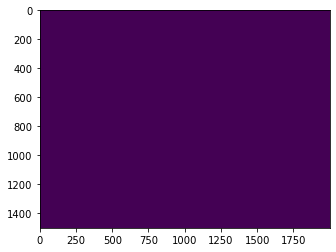

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 54 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:27:18
A100-SXM4-40GB - 1564620000653 - Utilization: 17% - Timestamp: 2023-04-02 14:27:18
A100-SXM4-40GB - 1564520013405 - Utilization: 0% - Timestamp: 2023-04-02 14:27:18
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:27:18
time taken for iteration 54

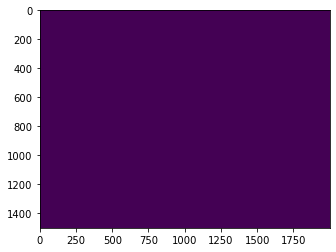


1Execution time: 0.46 seconds 
 <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 49 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2


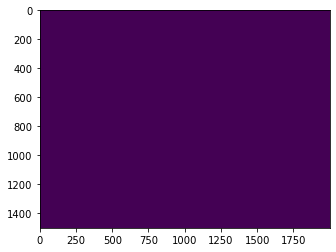

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 53 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:27:19
A100-SXM4-40GB - 1564620000653 - Utilization: 26% - Timestamp: 2023-04-02 14:27:19
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:27:19
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:27:19
time taken for iteration 53
Execution time: 0.43 seconds


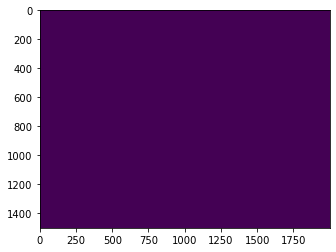

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 52 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:27:21
A100-SXM4-40GB - 1564620000653 - Utilization: 20% - Timestamp: 2023-04-02 14:27:21
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:27:21
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:27:21
time taken for iteration 52
Execution time: 0.49 seconds


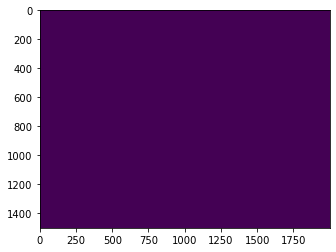

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 51 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:27:22
A100-SXM4-40GB - 1564620000653 - Utilization: 20% - Timestamp: 2023-04-02 14:27:22
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:27:22
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:27:22
time taken for iteration 51
Execution time: 0.46 seconds


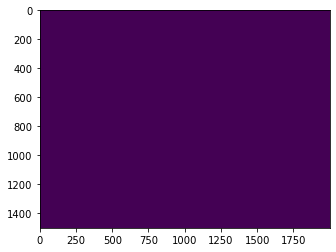

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 50 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:27:24
A100-SXM4-40GB - 1564620000653 - Utilization: 7% - Timestamp: 2023-04-02 14:27:24
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:27:24
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:27:24
time taken for iteration 50
Execution time: 0.48 seconds


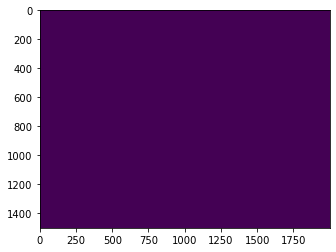

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 49 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:27:25
A100-SXM4-40GB - 1564620000653 - Utilization: 15% - Timestamp: 2023-04-02 14:27:25
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:27:25
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:27:25
time taken for iteration 49
Execution time: 0.46 seconds


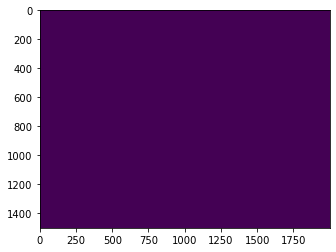

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 48 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:27:26
A100-SXM4-40GB - 1564620000653 - Utilization: 11% - Timestamp: 2023-04-02 14:27:26
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:27:26
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:27:26
time taken for iteration 48
Execution time: 0.47 seconds


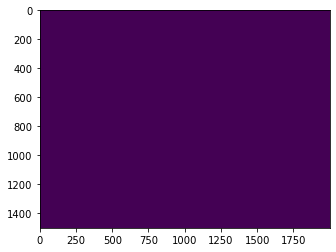

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 47 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:27:28
A100-SXM4-40GB - 1564620000653 - Utilization: 17% - Timestamp: 2023-04-02 14:27:28
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:27:28
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:27:28
time taken for iteration 47
Execution time: 0.41 seconds


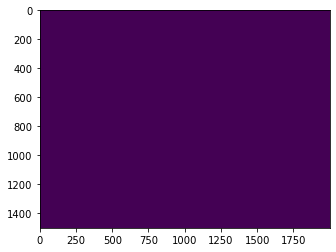

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 46 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:27:29
A100-SXM4-40GB - 1564620000653 - Utilization: 7% - Timestamp: 2023-04-02 14:27:29
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:27:29
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:27:29
time taken for iteration 46
Execution time: 0.46 seconds


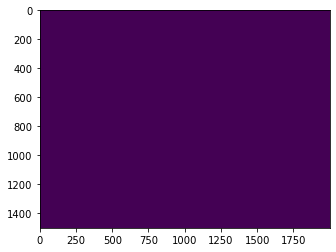

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 45 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:27:30
A100-SXM4-40GB - 1564620000653 - Utilization: 19% - Timestamp: 2023-04-02 14:27:30
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:27:30
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:27:30
time taken for iteration 45
Execution time: 0.47 seconds


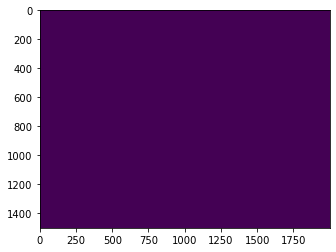

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 44 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:27:32
A100-SXM4-40GB - 1564620000653 - Utilization: 14% - Timestamp: 2023-04-02 14:27:32
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:27:32
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:27:32
time taken for iteration 44
Execution time: 0.41 seconds


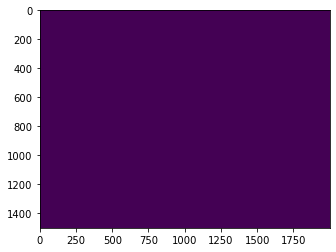

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 43 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:27:33
A100-SXM4-40GB - 1564620000653 - Utilization: 19% - Timestamp: 2023-04-02 14:27:33
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:27:33
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:27:33
time taken for iteration 43
Execution time: 0.41 seconds


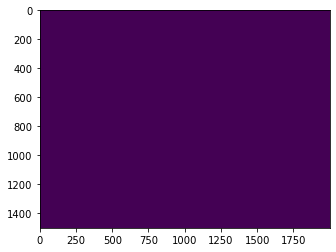

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 42 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:27:34
A100-SXM4-40GB - 1564620000653 - Utilization: 6% - Timestamp: 2023-04-02 14:27:34
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:27:34
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:27:34
time taken for iteration 42
Execution time: 0.47 seconds


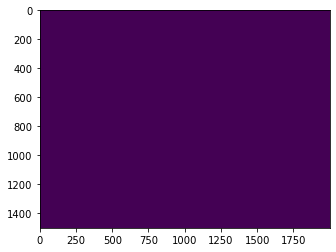

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 41 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:27:36
A100-SXM4-40GB - 1564620000653 - Utilization: 19% - Timestamp: 2023-04-02 14:27:36
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:27:36
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:27:36
time taken for iteration 41
Execution time: 0.42 seconds


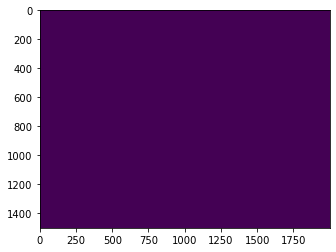

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 40 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:27:37
A100-SXM4-40GB - 1564620000653 - Utilization: 6% - Timestamp: 2023-04-02 14:27:37
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:27:37
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:27:37
time taken for iteration 40
Execution time: 0.40 seconds


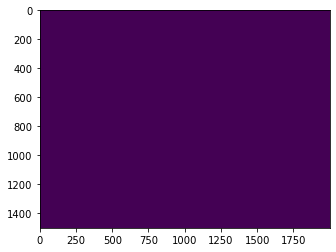

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 39 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:27:38
A100-SXM4-40GB - 1564620000653 - Utilization: 19% - Timestamp: 2023-04-02 14:27:38
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:27:38
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:27:38
time taken for iteration 39
Execution time: 0.43 seconds


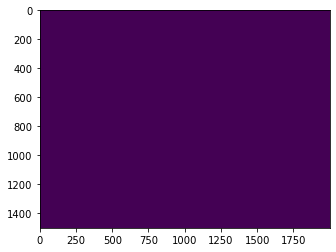

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 38 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:27:39
A100-SXM4-40GB - 1564620000653 - Utilization: 6% - Timestamp: 2023-04-02 14:27:40
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:27:40
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:27:40
time taken for iteration 38
Execution time: 0.45 seconds


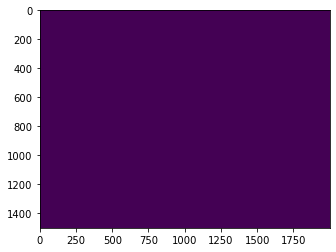

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 37 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:27:41
A100-SXM4-40GB - 1564620000653 - Utilization: 19% - Timestamp: 2023-04-02 14:27:41
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:27:41
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:27:41
time taken for iteration 37
Execution time: 0.48 seconds


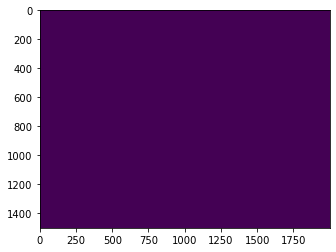

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 36 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:27:42
A100-SXM4-40GB - 1564620000653 - Utilization: 13% - Timestamp: 2023-04-02 14:27:42
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:27:42
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:27:42
time taken for iteration 36
Execution time: 0.51 seconds


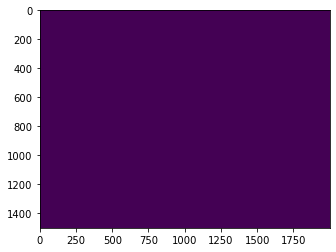

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 35 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:27:44
A100-SXM4-40GB - 1564620000653 - Utilization: 19% - Timestamp: 2023-04-02 14:27:44
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:27:44
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:27:44
time taken for iteration 35
Execution time: 0.45 seconds


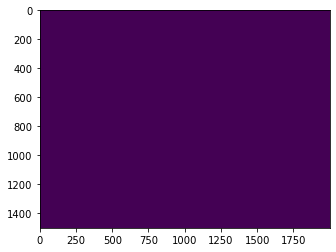

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 34 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:27:45
A100-SXM4-40GB - 1564620000653 - Utilization: 6% - Timestamp: 2023-04-02 14:27:45
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:27:45
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:27:45
time taken for iteration 34
Execution time: 0.44 seconds


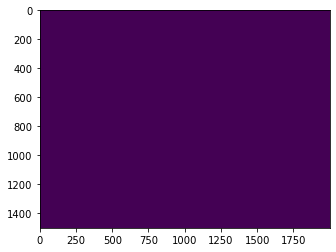

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 33 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:27:46
A100-SXM4-40GB - 1564620000653 - Utilization: 6% - Timestamp: 2023-04-02 14:27:46
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:27:46
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:27:46
time taken for iteration 33
Execution time: 0.44 seconds


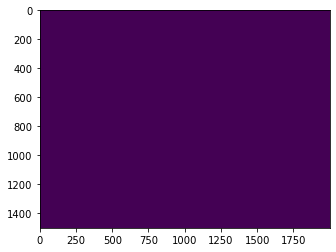

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 32 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:27:48
A100-SXM4-40GB - 1564620000653 - Utilization: 6% - Timestamp: 2023-04-02 14:27:48
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:27:48
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:27:48
time taken for iteration 32
Execution time: 0.37 seconds


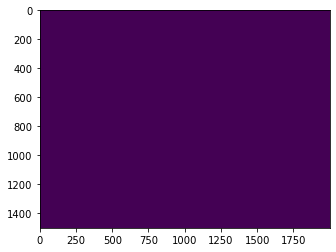

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 31 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:27:49
A100-SXM4-40GB - 1564620000653 - Utilization: 6% - Timestamp: 2023-04-02 14:27:49
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:27:49
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:27:49
time taken for iteration 31
Execution time: 0.36 seconds


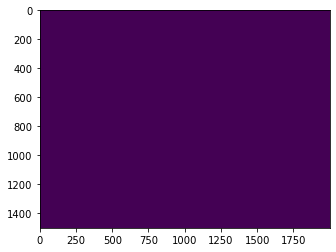

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 30 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:27:50
A100-SXM4-40GB - 1564620000653 - Utilization: 19% - Timestamp: 2023-04-02 14:27:50
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:27:50
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:27:50
time taken for iteration 30
Execution time: 0.43 seconds


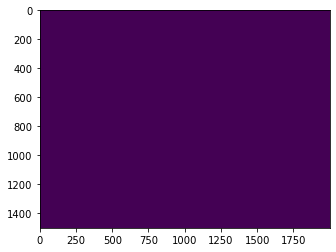

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 29 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:27:51
A100-SXM4-40GB - 1564620000653 - Utilization: 6% - Timestamp: 2023-04-02 14:27:52
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:27:52
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:27:52
time taken for iteration 29
Execution time: 0.46 seconds


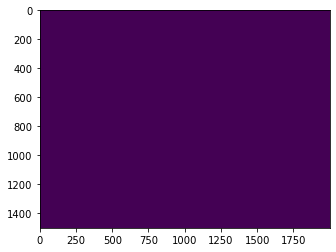

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 28 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:27:53
A100-SXM4-40GB - 1564620000653 - Utilization: 1% - Timestamp: 2023-04-02 14:27:53
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:27:53
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:27:53
time taken for iteration 28
Execution time: 0.39 seconds


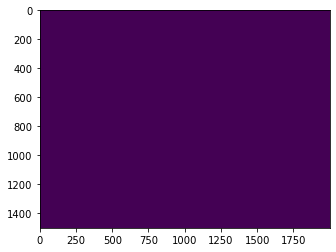

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 27 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:27:54
A100-SXM4-40GB - 1564620000653 - Utilization: 20% - Timestamp: 2023-04-02 14:27:54
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:27:54
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:27:54
time taken for iteration 27
Execution time: 0.42 seconds


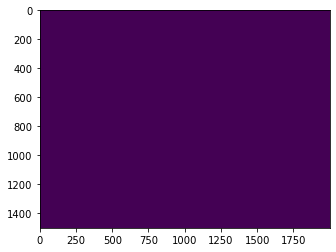

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 26 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:27:55
A100-SXM4-40GB - 1564620000653 - Utilization: 6% - Timestamp: 2023-04-02 14:27:55
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:27:55
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:27:55
time taken for iteration 26
Execution time: 0.42 seconds


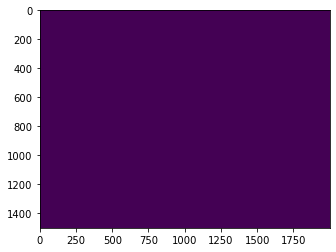

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 25 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:27:57
A100-SXM4-40GB - 1564620000653 - Utilization: 20% - Timestamp: 2023-04-02 14:27:57
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:27:57
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:27:57
time taken for iteration 25
Execution time: 0.38 seconds


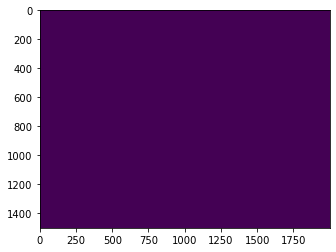

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 24 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:27:58
A100-SXM4-40GB - 1564620000653 - Utilization: 7% - Timestamp: 2023-04-02 14:27:58
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:27:58
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:27:58
time taken for iteration 24
Execution time: 0.44 seconds


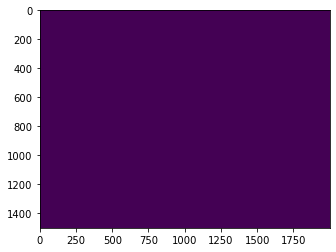

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 23 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:27:59
A100-SXM4-40GB - 1564620000653 - Utilization: 6% - Timestamp: 2023-04-02 14:27:59
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:27:59
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:27:59
time taken for iteration 23
Execution time: 0.43 seconds


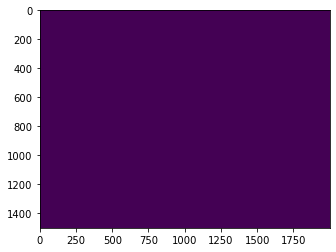

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 22 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:28:01
A100-SXM4-40GB - 1564620000653 - Utilization: 15% - Timestamp: 2023-04-02 14:28:01
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:28:01
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:28:01
time taken for iteration 22
Execution time: 0.45 seconds


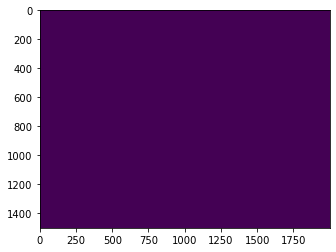

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 21 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:28:02
A100-SXM4-40GB - 1564620000653 - Utilization: 19% - Timestamp: 2023-04-02 14:28:02
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:28:02
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:28:02
time taken for iteration 21
Execution time: 0.44 seconds


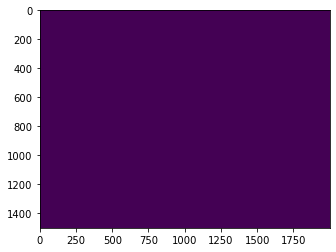

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 20 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:28:03
A100-SXM4-40GB - 1564620000653 - Utilization: 17% - Timestamp: 2023-04-02 14:28:03
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:28:03
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:28:03
time taken for iteration 20
Execution time: 0.38 seconds


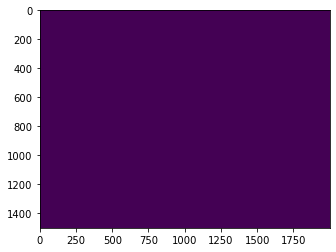

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 19 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:28:04
A100-SXM4-40GB - 1564620000653 - Utilization: 6% - Timestamp: 2023-04-02 14:28:04
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:28:04
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:28:05
time taken for iteration 19
Execution time: 0.42 seconds


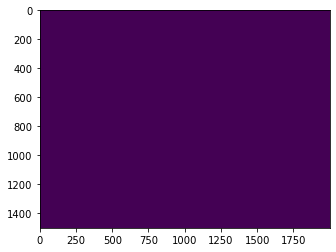

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 18 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:28:06
A100-SXM4-40GB - 1564620000653 - Utilization: 19% - Timestamp: 2023-04-02 14:28:06
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:28:06
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:28:06
time taken for iteration 18
Execution time: 0.43 seconds


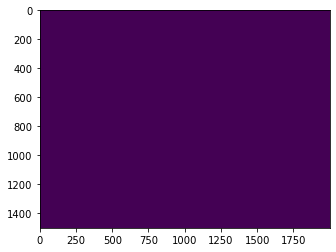

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 17 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:28:07
A100-SXM4-40GB - 1564620000653 - Utilization: 6% - Timestamp: 2023-04-02 14:28:07
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:28:07
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:28:07
time taken for iteration 17
Execution time: 0.40 seconds


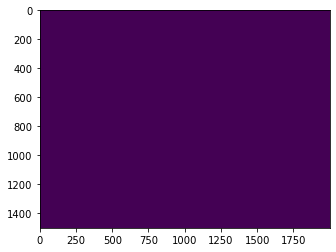

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 16 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:28:08
A100-SXM4-40GB - 1564620000653 - Utilization: 19% - Timestamp: 2023-04-02 14:28:08
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:28:08
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:28:08
time taken for iteration 16
Execution time: 0.42 seconds


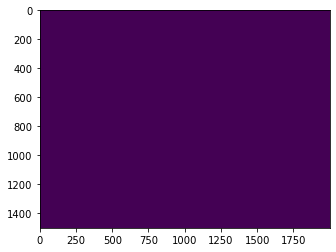

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 15 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:28:10
A100-SXM4-40GB - 1564620000653 - Utilization: 10% - Timestamp: 2023-04-02 14:28:10
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:28:10
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:28:10
time taken for iteration 15
Execution time: 0.42 seconds


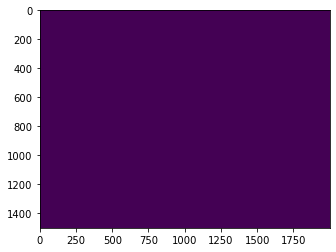

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 14 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:28:11
A100-SXM4-40GB - 1564620000653 - Utilization: 19% - Timestamp: 2023-04-02 14:28:11
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:28:11
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:28:11
time taken for iteration 14
Execution time: 0.43 seconds


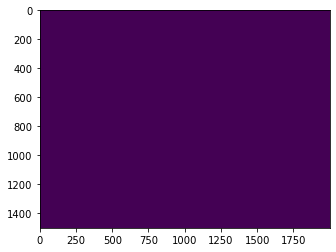

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 13 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:28:12
A100-SXM4-40GB - 1564620000653 - Utilization: 20% - Timestamp: 2023-04-02 14:28:12
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:28:12
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:28:12
time taken for iteration 13
Execution time: 0.48 seconds


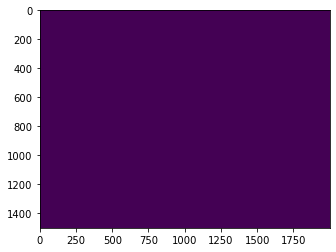

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 12 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:28:14
A100-SXM4-40GB - 1564620000653 - Utilization: 19% - Timestamp: 2023-04-02 14:28:14
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:28:14
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:28:14
time taken for iteration 12
Execution time: 0.43 seconds


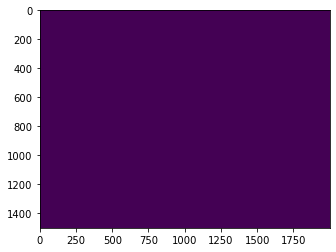

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 11 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:28:15
A100-SXM4-40GB - 1564620000653 - Utilization: 6% - Timestamp: 2023-04-02 14:28:15
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:28:15
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:28:15
time taken for iteration 11
Execution time: 0.46 seconds


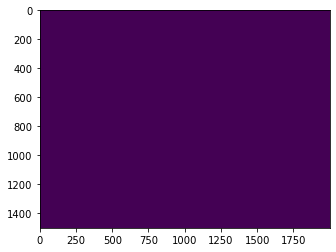

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 10 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:28:17
A100-SXM4-40GB - 1564620000653 - Utilization: 19% - Timestamp: 2023-04-02 14:28:17
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:28:17
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:28:17
time taken for iteration 10
Execution time: 0.38 seconds


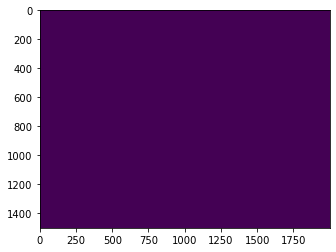

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 9 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:28:18
A100-SXM4-40GB - 1564620000653 - Utilization: 13% - Timestamp: 2023-04-02 14:28:18
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:28:18
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:28:18
time taken for iteration 9
Execution time: 0.39 seconds


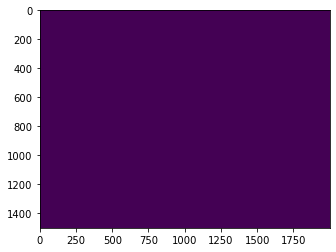

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 8 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:28:19
A100-SXM4-40GB - 1564620000653 - Utilization: 6% - Timestamp: 2023-04-02 14:28:19
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:28:19
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:28:19
time taken for iteration 8
Execution time: 0.41 seconds


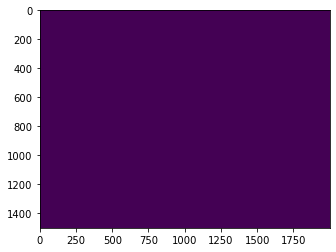

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 7 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:28:20
A100-SXM4-40GB - 1564620000653 - Utilization: 14% - Timestamp: 2023-04-02 14:28:20
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:28:21
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:28:21
time taken for iteration 7
Execution time: 0.39 seconds


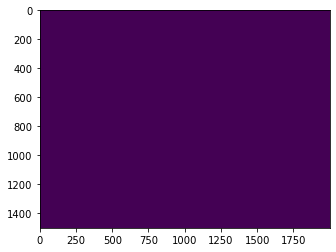

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 6 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:28:22
A100-SXM4-40GB - 1564620000653 - Utilization: 6% - Timestamp: 2023-04-02 14:28:22
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:28:22
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:28:22
time taken for iteration 6
Execution time: 0.42 seconds


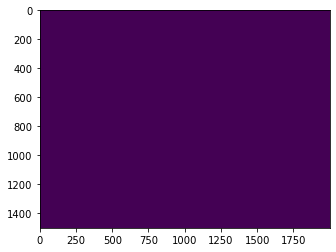

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 5 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 46% - Timestamp: 2023-04-02 14:28:23
A100-SXM4-40GB - 1564620000653 - Utilization: 19% - Timestamp: 2023-04-02 14:28:23
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:28:23
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:28:23
time taken for iteration 5
Execution time: 0.37 seconds


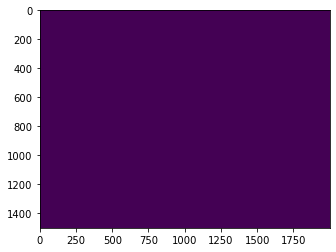

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 4 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 78% - Timestamp: 2023-04-02 14:28:24
A100-SXM4-40GB - 1564620000653 - Utilization: 19% - Timestamp: 2023-04-02 14:28:24
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:28:24
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:28:24
time taken for iteration 4
Execution time: 0.38 seconds


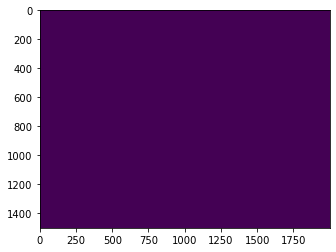

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 3 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 48% - Timestamp: 2023-04-02 14:28:25
A100-SXM4-40GB - 1564620000653 - Utilization: 0% - Timestamp: 2023-04-02 14:28:25
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:28:25
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:28:25
time taken for iterationA100-SXM4-40GB - 1564520013243 - Utilization: 48% - Timestamp: 2023-04-02 14:28:25 
67A100-SXM4-40GB - 1564620000653 - Utilization: 20% - Timestamp: 2023-04-02 14:28:25

Execution time: 73.66 secondsA100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:28:25

A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:28:25
time taken for iteration 3
Execution time: 0.38 seconds


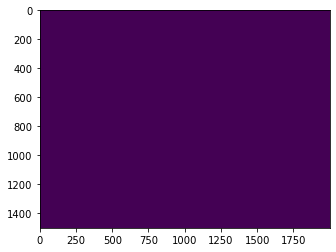

1  <=50 and number_1 >=25 
0 >= 2


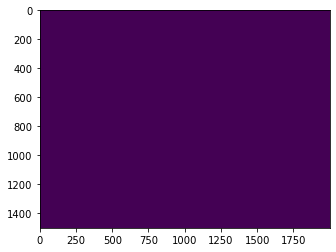

######################################################################1
(this iteration is with g value, 66 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0 
 <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 2 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:28:27
A100-SXM4-40GB - 1564620000653 - Utilization: 6% - Timestamp: 2023-04-02 14:28:27
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:28:27
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:28:27
time taken for iteration 2
Execution time: 0.41 seconds


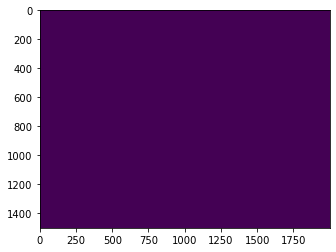

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 1 ,for the image:,000000_000000_000248_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:28:28
A100-SXM4-40GB - 1564620000653 - Utilization: 3% - Timestamp: 2023-04-02 14:28:28
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:28:28
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:28:28
time taken for iteration 1
Execution time: 0.36 seconds


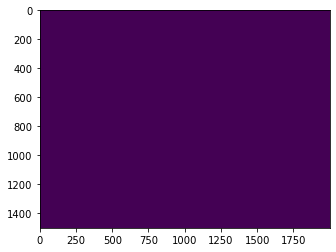

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
000000_000000_000428_000000.tif


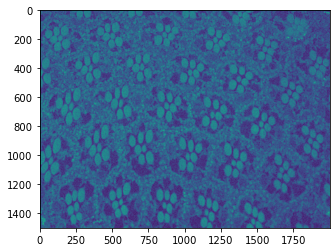

Device: cuda:1
time taken for assigning  image: 000000_000000_000428_000000.tif
Execution time: 0.97 seconds
(this iteration is with g value, 100 ,for the image:,000000_000000_000428_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:28:33
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 14:28:33
A100-SXM4-40GB - 1564520013405 - Utilization: 19% - Timestamp: 2023-04-02 14:28:33
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:28:33
time taken for iteration 49
Execution time: 75.36 seconds


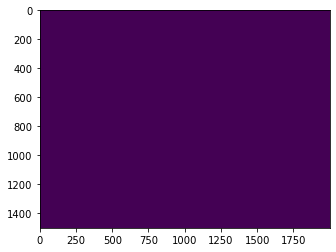

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 48 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:29:33
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 14:29:33
A100-SXM4-40GB - 1564520013405 - Utilization: 27% - Timestamp: 2023-04-02 14:29:34
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:29:34
time taken for iteration 48
Execution time: 59.48 seconds


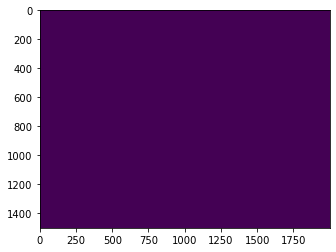

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 47 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:29:57
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 14:29:57
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:29:57
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:29:58
time taken for iteration 66
Execution time: 91.28 seconds


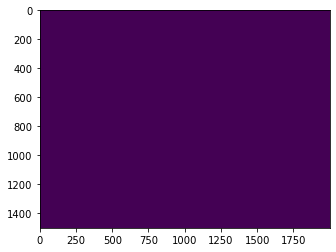

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 65 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:30:12
A100-SXM4-40GB - 1564620000653 - Utilization: 12% - Timestamp: 2023-04-02 14:30:12
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:30:12
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:30:12
time taken for iteration 100
Execution time: 101.93 seconds


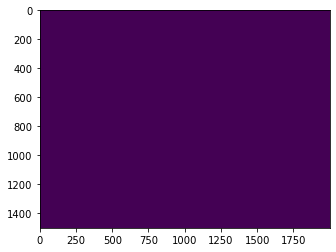

0  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 99 ,for the image:,000000_000000_000428_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:30:34
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 14:30:34
A100-SXM4-40GB - 1564520013405 - Utilization: 23% - Timestamp: 2023-04-02 14:30:34
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:30:34
time taken for iteration 47
Execution time: 59.96 seconds


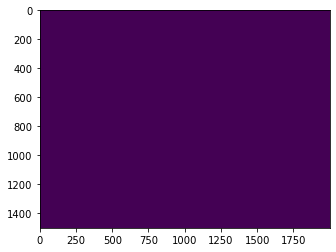

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 46 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 72% - Timestamp: 2023-04-02 14:31:31
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 14:31:31
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:31:32
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:31:32
time taken for iteration 65
Execution time: 93.12 seconds


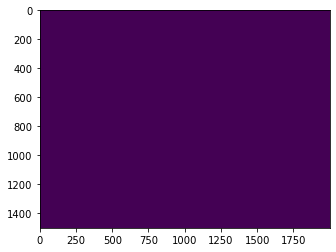

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 64 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:31:36
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 14:31:36
A100-SXM4-40GB - 1564520013405 - Utilization: 11% - Timestamp: 2023-04-02 14:31:36
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:31:36
time taken for iteration 46
Execution time: 60.80 seconds


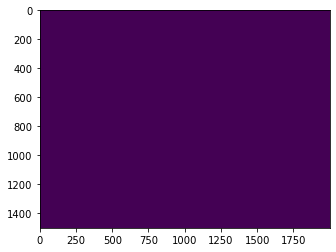

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 45 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:31:54
A100-SXM4-40GB - 1564620000653 - Utilization: 16% - Timestamp: 2023-04-02 14:31:54
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:31:54
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:31:54
time taken for iteration 99
Execution time: 100.91 seconds


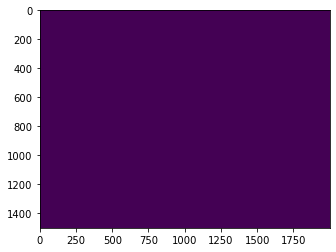

0  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 98 ,for the image:,000000_000000_000428_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:32:56
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 14:32:56
A100-SXM4-40GB - 1564520013405 - Utilization: 14% - Timestamp: 2023-04-02 14:32:56
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:32:56
time taken for iteration 45
Execution time: 78.81 seconds


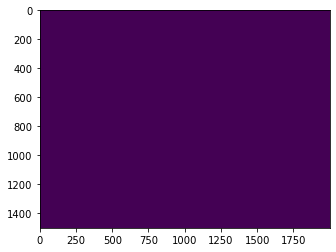

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 44 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 8% - Timestamp: 2023-04-02 14:33:06
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 14:33:06
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:33:06
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:33:06
time taken for iteration 64
Execution time: 93.74 seconds


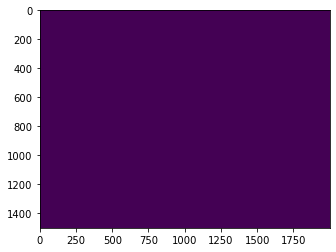

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 63 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:33:35
A100-SXM4-40GB - 1564620000653 - Utilization: 16% - Timestamp: 2023-04-02 14:33:36
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:33:36
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:33:36
time taken for iteration 98
Execution time: 100.49 seconds


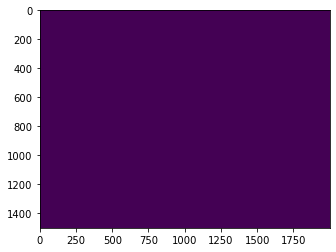

0  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 97 ,for the image:,000000_000000_000428_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:33:59
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 14:33:59
A100-SXM4-40GB - 1564520013405 - Utilization: 27% - Timestamp: 2023-04-02 14:33:59
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:33:59
time taken for iteration 44
Execution time: 62.82 seconds


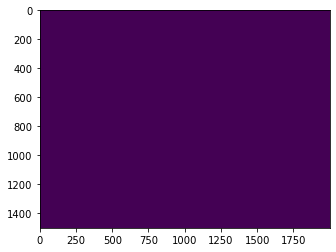

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 43 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 97% - Timestamp: 2023-04-02 14:34:23
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 14:34:23
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:34:23
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:34:23
time taken for iteration 63
Execution time: 76.21 seconds


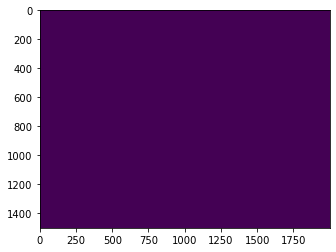

2  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 62 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:34:57
A100-SXM4-40GB - 1564620000653 - Utilization: 12% - Timestamp: 2023-04-02 14:34:57
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:34:57
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:34:57
time taken for iteration 97
Execution time: 80.22 seconds


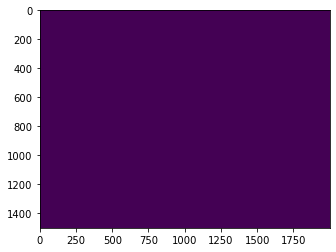

0  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 96 ,for the image:,000000_000000_000428_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:35:03
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 14:35:03
A100-SXM4-40GB - 1564520013405 - Utilization: 23% - Timestamp: 2023-04-02 14:35:03
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:35:03
time taken for iteration 43
Execution time: 62.88 seconds


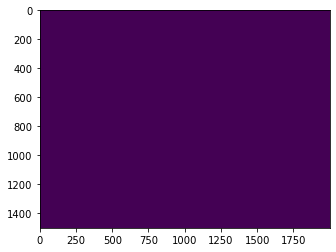

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 42 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 83% - Timestamp: 2023-04-02 14:36:02
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 14:36:02
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:36:02
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:36:02
time taken for iteration 62
Execution time: 97.86 seconds


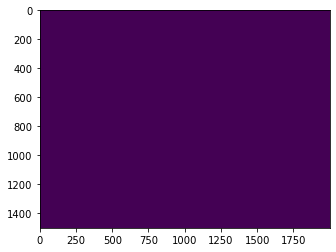

2  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 61 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:36:08
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 14:36:08
A100-SXM4-40GB - 1564520013405 - Utilization: 36% - Timestamp: 2023-04-02 14:36:08
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:36:08
time taken for iteration 42
Execution time: 63.75 seconds


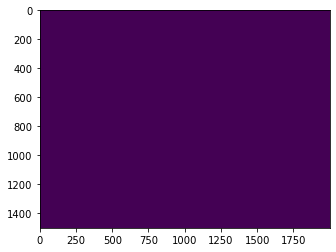

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 41 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:36:37
A100-SXM4-40GB - 1564620000653 - Utilization: 18% - Timestamp: 2023-04-02 14:36:37
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:36:37
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:36:37
time taken for iteration 96
Execution time: 99.72 seconds


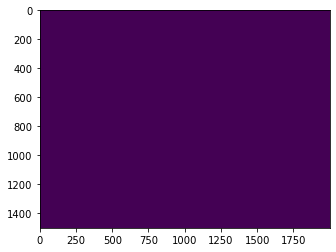

0  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 95 ,for the image:,000000_000000_000428_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:37:13
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 14:37:13
A100-SXM4-40GB - 1564520013405 - Utilization: 22% - Timestamp: 2023-04-02 14:37:13
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:37:13
time taken for iteration 41
Execution time: 64.22 seconds


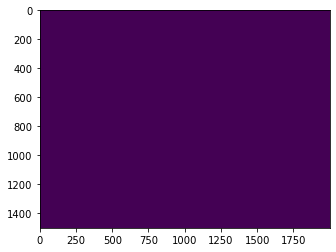

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 40 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:37:40
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 14:37:40
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:37:40
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:37:40
time taken for iteration 61
Execution time: 97.13 seconds


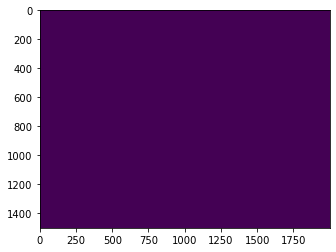

2  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 60 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:37:57
A100-SXM4-40GB - 1564620000653 - Utilization: 14% - Timestamp: 2023-04-02 14:37:58
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:37:58
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:37:58
time taken for iteration 95
Execution time: 79.40 seconds


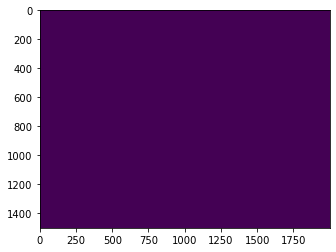

0  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 94 ,for the image:,000000_000000_000428_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:38:37
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 14:38:38
A100-SXM4-40GB - 1564520013405 - Utilization: 10% - Timestamp: 2023-04-02 14:38:38
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:38:38
time taken for iteration 40
Execution time: 83.76 seconds


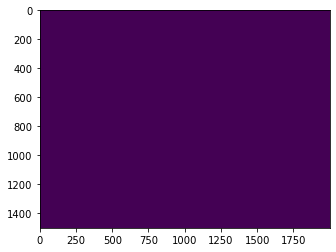

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 39 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 82% - Timestamp: 2023-04-02 14:39:18
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 14:39:18
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:39:18
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:39:18
time taken for iteration 60
Execution time: 97.21 seconds


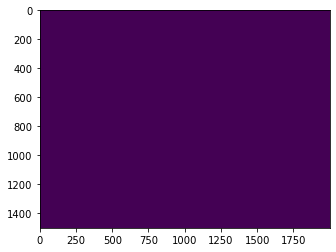

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 59 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:39:37
A100-SXM4-40GB - 1564620000653 - Utilization: 18% - Timestamp: 2023-04-02 14:39:37
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:39:37
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:39:37
time taken for iteration 94
Execution time: 98.87 seconds


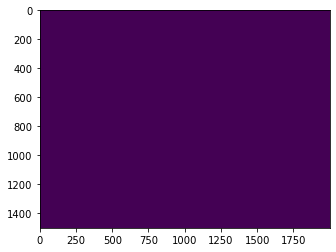

0  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 93 ,for the image:,000000_000000_000428_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:40:03
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 14:40:03
A100-SXM4-40GB - 1564520013405 - Utilization: 26% - Timestamp: 2023-04-02 14:40:03
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:40:03
time taken for iteration 39
Execution time: 84.52 seconds


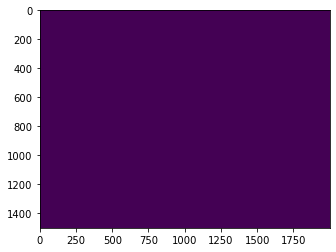

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 38 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 52% - Timestamp: 2023-04-02 14:40:37
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 14:40:37
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:40:37
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:40:37
time taken for iteration 59
Execution time: 77.76 seconds


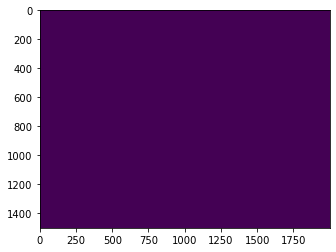

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 58 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:41:10
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 14:41:10
A100-SXM4-40GB - 1564520013405 - Utilization: 10% - Timestamp: 2023-04-02 14:41:10
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:41:10
time taken for iteration 38
Execution time: 66.21 seconds


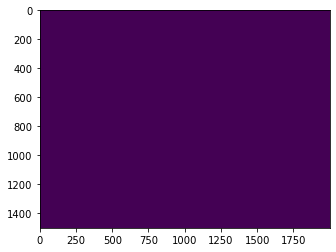

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 37 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:41:17
A100-SXM4-40GB - 1564620000653 - Utilization: 11% - Timestamp: 2023-04-02 14:41:17
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:41:17
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:41:17
time taken for iteration 93
Execution time: 99.35 seconds


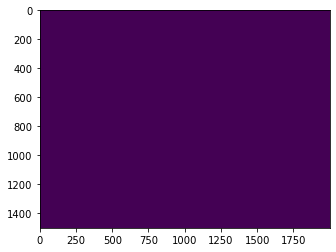

0  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 92 ,for the image:,000000_000000_000428_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 80% - Timestamp: 2023-04-02 14:42:18
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 14:42:18
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:42:18
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:42:18
time taken for iteration 58
Execution time: 100.21 seconds


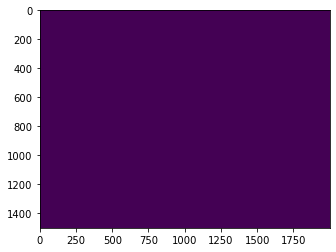

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 57 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:42:36
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 14:42:37
A100-SXM4-40GB - 1564520013405 - Utilization: 27% - Timestamp: 2023-04-02 14:42:37
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:42:37
time taken for iteration 37
Execution time: 85.54 seconds


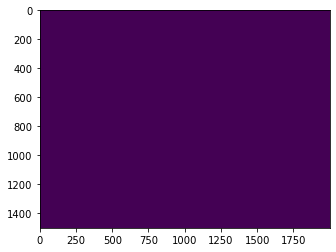

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 36 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:42:57
A100-SXM4-40GB - 1564620000653 - Utilization: 15% - Timestamp: 2023-04-02 14:42:57
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:42:57
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:42:57
time taken for iteration 92
Execution time: 98.38 seconds


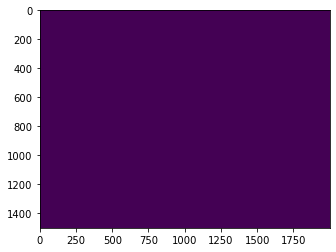

0  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 91 ,for the image:,000000_000000_000428_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:43:39
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 14:43:39
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:43:39
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:43:39
time taken for iteration 57
Execution time: 79.72 seconds


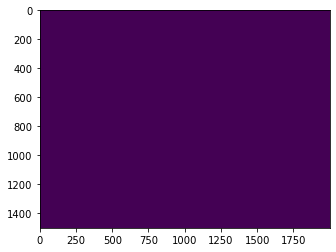

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 56 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:43:45
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 14:43:45
A100-SXM4-40GB - 1564520013405 - Utilization: 34% - Timestamp: 2023-04-02 14:43:45
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:43:45
time taken for iteration 36
Execution time: 67.64 seconds


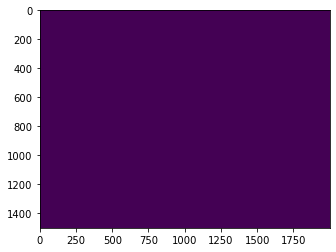

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 35 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:44:16
A100-SXM4-40GB - 1564620000653 - Utilization: 11% - Timestamp: 2023-04-02 14:44:16
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:44:16
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:44:16
time taken for iteration 91
Execution time: 78.15 seconds


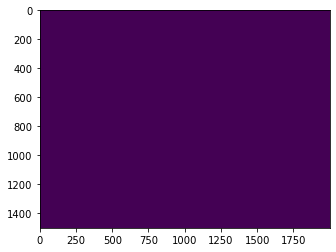

0  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 90 ,for the image:,000000_000000_000428_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:44:53
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 14:44:53
A100-SXM4-40GB - 1564520013405 - Utilization: 25% - Timestamp: 2023-04-02 14:44:53
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:44:53
time taken for iteration 35
Execution time: 67.59 seconds


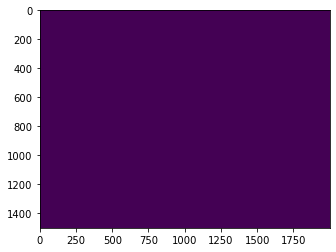

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 34 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:45:28
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 14:45:28
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:45:28
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:45:28
time taken for iteration 56
Execution time: 108.55 seconds


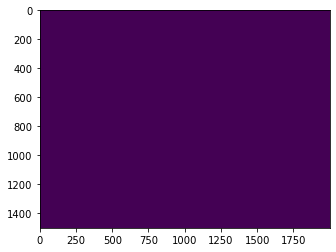

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 55 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:45:53
A100-SXM4-40GB - 1564620000653 - Utilization: 11% - Timestamp: 2023-04-02 14:45:53
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:45:53
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:45:53
time taken for iteration 90
Execution time: 96.88 seconds


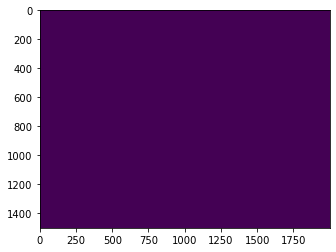

0  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 89 ,for the image:,000000_000000_000428_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:46:22
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 14:46:22
A100-SXM4-40GB - 1564520013405 - Utilization: 22% - Timestamp: 2023-04-02 14:46:22
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:46:22
time taken for iteration 34
Execution time: 87.89 seconds


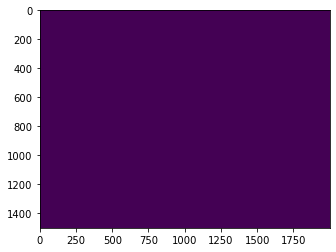

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 33 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:47:13
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 14:47:13
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:47:13
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:47:13
time taken for iteration 55
Execution time: 104.08 seconds


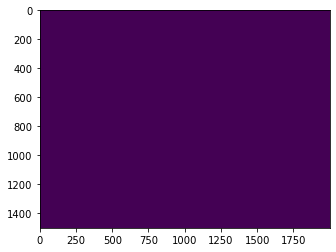

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 54 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:47:31
A100-SXM4-40GB - 1564620000653 - Utilization: 10% - Timestamp: 2023-04-02 14:47:31
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:47:31
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:47:31
time taken for iteration 89
Execution time: 96.61 seconds


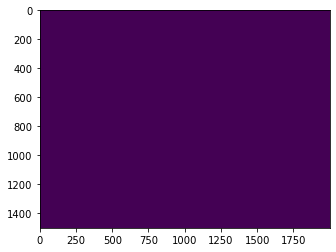

0  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 88 ,for the image:,000000_000000_000428_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:47:51
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 14:47:51
A100-SXM4-40GB - 1564520013405 - Utilization: 10% - Timestamp: 2023-04-02 14:47:51
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:47:51
time taken for iteration 33
Execution time: 88.29 seconds


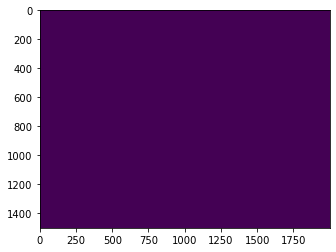

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 32 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:49:01
A100-SXM4-40GB - 1564620000653 - Utilization: 41% - Timestamp: 2023-04-02 14:49:02
A100-SXM4-40GB - 1564520013405 - Utilization: 16% - Timestamp: 2023-04-02 14:49:02
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:49:02
time taken for iteration 32
Execution time: 69.37 seconds
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:49:02
A100-SXM4-40GB - 1564620000653 - Utilization: 46% - Timestamp: 2023-04-02 14:49:02
A100-SXM4-40GB - 1564520013405 - Utilization: 0% - Timestamp: 2023-04-02 14:49:02
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:49:02
time taken for iteration 54
Execution time: 107.41 seconds


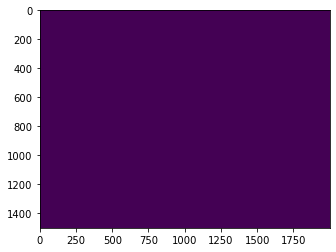

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 31 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2


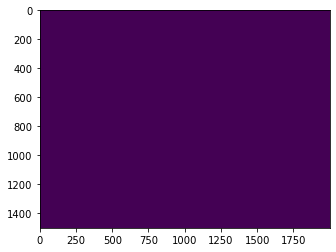

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 53 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:49:07
A100-SXM4-40GB - 1564620000653 - Utilization: 14% - Timestamp: 2023-04-02 14:49:07
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:49:07
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:49:08
time taken for iteration 88
Execution time: 95.68 seconds


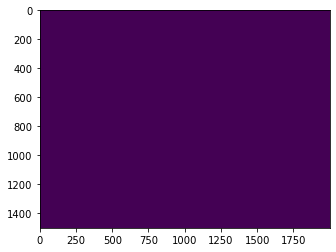

0  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 87 ,for the image:,000000_000000_000428_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:50:32
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 14:50:32
A100-SXM4-40GB - 1564520013405 - Utilization: 30% - Timestamp: 2023-04-02 14:50:32
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:50:32
time taken for iteration 31
Execution time: 89.59 seconds


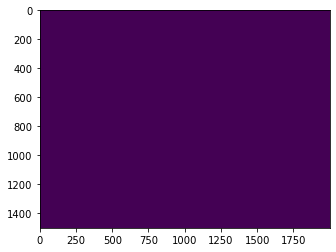

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 30 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:50:43
A100-SXM4-40GB - 1564620000653 - Utilization: 7% - Timestamp: 2023-04-02 14:50:43
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:50:43
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:50:43
time taken for iteration 87
Execution time: 94.98 seconds


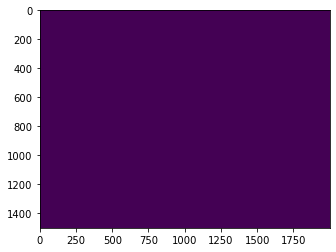

0  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 86 ,for the image:,000000_000000_000428_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 62% - Timestamp: 2023-04-02 14:50:55
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 14:50:55
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:50:55
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:50:55
time taken for iteration 53
Execution time: 112.40 seconds


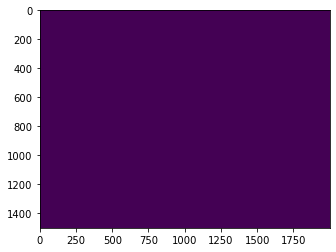

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 52 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:51:43
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 14:51:43
A100-SXM4-40GB - 1564520013405 - Utilization: 15% - Timestamp: 2023-04-02 14:51:43
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:51:43
time taken for iteration 30
Execution time: 70.41 seconds


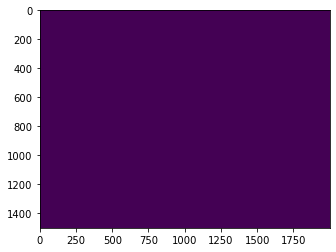

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 29 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:52:19
A100-SXM4-40GB - 1564620000653 - Utilization: 11% - Timestamp: 2023-04-02 14:52:19
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:52:19
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:52:19
time taken for iteration 86
Execution time: 94.43 seconds


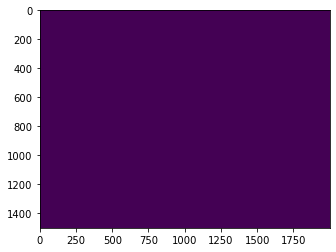

0  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 85 ,for the image:,000000_000000_000428_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:52:49
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 14:52:49
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:52:49
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:52:49
time taken for iteration 52
Execution time: 112.68 seconds


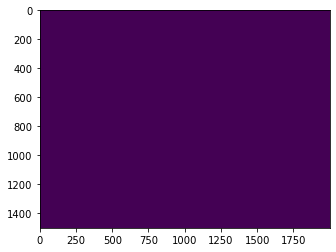

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 51 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:53:15
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 14:53:15
A100-SXM4-40GB - 1564520013405 - Utilization: 12% - Timestamp: 2023-04-02 14:53:15
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:53:15
time taken for iteration 29
Execution time: 91.09 seconds


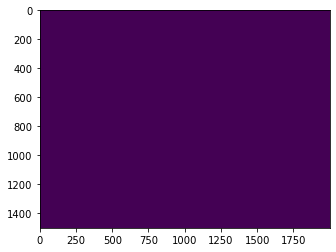

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 28 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:53:53
A100-SXM4-40GB - 1564620000653 - Utilization: 9% - Timestamp: 2023-04-02 14:53:53
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:53:53
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:53:53
time taken for iteration 85
Execution time: 93.75 seconds


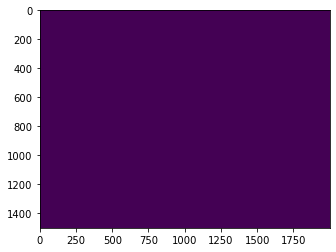

0  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 84 ,for the image:,000000_000000_000428_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:54:45
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 14:54:45
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:54:45
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:54:45
time taken for iteration 51
Execution time: 115.42 seconds


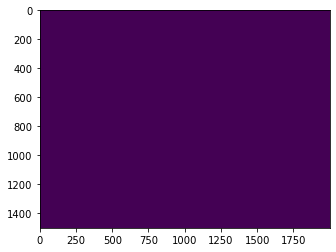

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 50 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:54:48
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 14:54:48
A100-SXM4-40GB - 1564520013405 - Utilization: 11% - Timestamp: 2023-04-02 14:54:48
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:54:48
time taken for iteration 28
Execution time: 91.46 seconds


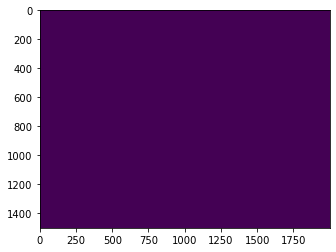

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 27 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:55:27
A100-SXM4-40GB - 1564620000653 - Utilization: 11% - Timestamp: 2023-04-02 14:55:28
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:55:28
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:55:28
time taken for iteration 84
Execution time: 93.30 seconds


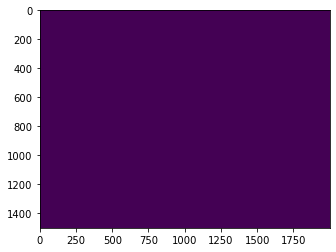

0  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 83 ,for the image:,000000_000000_000428_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:56:00
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 14:56:01
A100-SXM4-40GB - 1564520013405 - Utilization: 19% - Timestamp: 2023-04-02 14:56:01
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:56:01
time taken for iteration 27
Execution time: 71.82 seconds


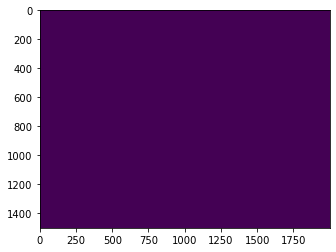

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 26 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:56:16
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 14:56:16
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:56:16
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:56:16
time taken for iteration 50
Execution time: 90.39 seconds


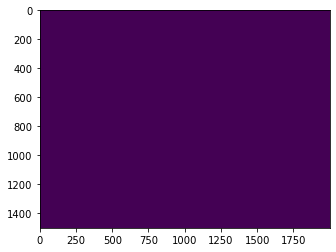

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 49 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:57:00
A100-SXM4-40GB - 1564620000653 - Utilization: 9% - Timestamp: 2023-04-02 14:57:00
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:57:00
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:57:00
time taken for iteration 83
Execution time: 91.56 seconds


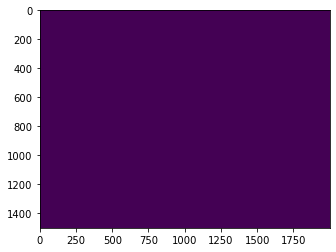

0  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 82 ,for the image:,000000_000000_000428_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:57:34
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 14:57:34
A100-SXM4-40GB - 1564520013405 - Utilization: 22% - Timestamp: 2023-04-02 14:57:34
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:57:34
time taken for iteration 26
Execution time: 92.49 seconds


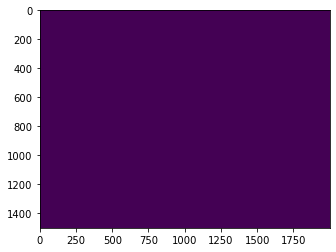

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 25 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:58:20
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 14:58:20
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:58:20
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:58:20
time taken for iteration 49
Execution time: 123.08 seconds


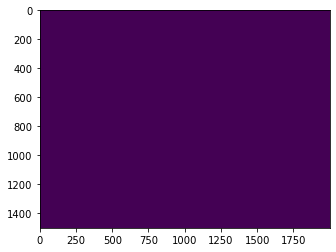

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 48 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:58:31
A100-SXM4-40GB - 1564620000653 - Utilization: 16% - Timestamp: 2023-04-02 14:58:31
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 14:58:32
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:58:32
time taken for iteration 82
Execution time: 90.47 seconds


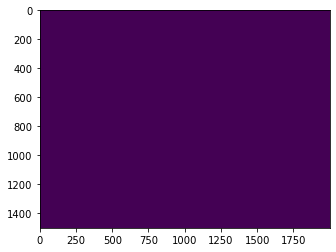

0  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 81 ,for the image:,000000_000000_000428_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 14:58:48
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 14:58:48
A100-SXM4-40GB - 1564520013405 - Utilization: 10% - Timestamp: 2023-04-02 14:58:48
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 14:58:48
time taken for iteration 25
Execution time: 72.86 seconds


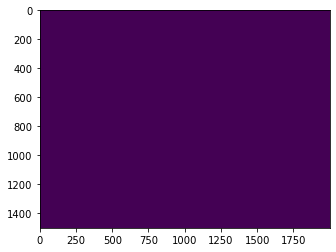

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 24 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:00:02
A100-SXM4-40GB - 1564620000653 - Utilization: 38% - Timestamp: 2023-04-02 15:00:02
A100-SXM4-40GB - 1564520013405 - Utilization: 10% - Timestamp: 2023-04-02 15:00:02
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:00:02
time taken for iteration 24
Execution time: 73.11 seconds
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:00:02
A100-SXM4-40GB - 1564620000653 - Utilization: 7% - Timestamp: 2023-04-02 15:00:02
A100-SXM4-40GB - 1564520013405 - Utilization: 0% - Timestamp: 2023-04-02 15:00:02
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:00:02
time taken for iteration 81
Execution time: 89.64 seconds


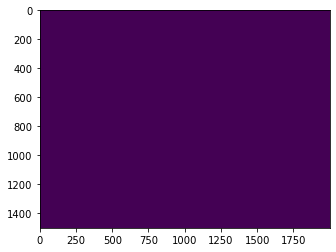

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 23 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2


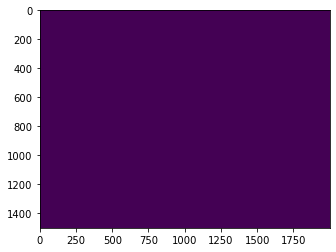

0  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 80 ,for the image:,000000_000000_000428_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 96% - Timestamp: 2023-04-02 15:00:24
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 15:00:24
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 15:00:24
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:00:24
time taken for iteration 48
Execution time: 122.76 seconds


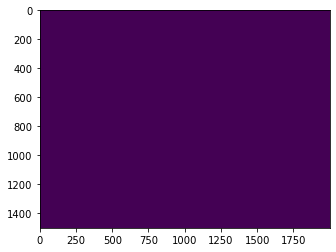

2  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 47 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:01:16
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 15:01:16
A100-SXM4-40GB - 1564520013405 - Utilization: 18% - Timestamp: 2023-04-02 15:01:16
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:01:16
time taken for iteration 23
Execution time: 73.16 seconds


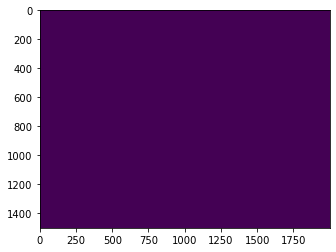

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 22 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:01:31
A100-SXM4-40GB - 1564620000653 - Utilization: 11% - Timestamp: 2023-04-02 15:01:31
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 15:01:31
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:01:31
time taken for iteration 80
Execution time: 88.13 seconds


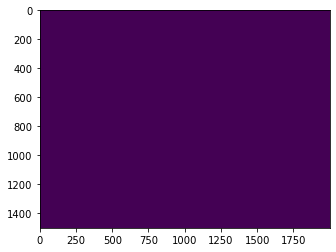

0  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 79 ,for the image:,000000_000000_000428_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:02:31
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 15:02:31
A100-SXM4-40GB - 1564520013405 - Utilization: 13% - Timestamp: 2023-04-02 15:02:31
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:02:31
time taken for iteration 22
Execution time: 73.91 seconds


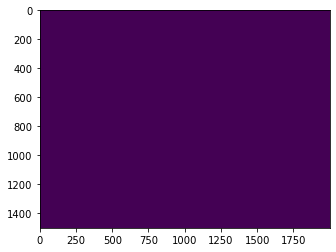

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 21 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:02:32
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 15:02:32
A100-SXM4-40GB - 1564520013405 - Utilization: 50% - Timestamp: 2023-04-02 15:02:32
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:02:32
time taken for iteration 47
Execution time: 127.06 seconds


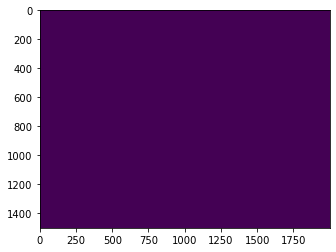

2  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 46 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:02:59
A100-SXM4-40GB - 1564620000653 - Utilization: 11% - Timestamp: 2023-04-02 15:02:59
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 15:02:59
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:02:59
time taken for iteration 79
Execution time: 87.36 seconds


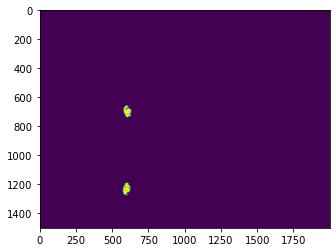

2  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 78 ,for the image:,000000_000000_000428_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:03:46
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 15:03:46
A100-SXM4-40GB - 1564520013405 - Utilization: 27% - Timestamp: 2023-04-02 15:03:46
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:03:46
time taken for iteration 21
Execution time: 74.10 seconds


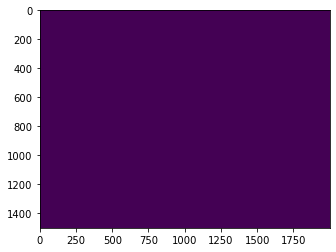

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 20 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:03:47
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 15:03:47
A100-SXM4-40GB - 1564520013405 - Utilization: 23% - Timestamp: 2023-04-02 15:03:47
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:03:47
time taken for iteration 20
Execution time: 0.50 seconds


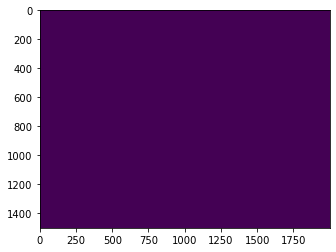

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 19 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:03:48
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 15:03:48
A100-SXM4-40GB - 1564520013405 - Utilization: 34% - Timestamp: 2023-04-02 15:03:48
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:03:49
time taken for iteration 19
Execution time: 0.57 seconds


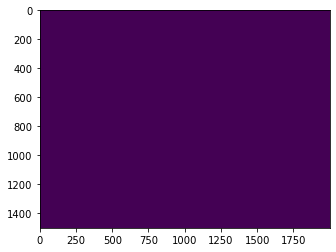

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 18 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:03:50
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 15:03:50
A100-SXM4-40GB - 1564520013405 - Utilization: 28% - Timestamp: 2023-04-02 15:03:50
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:03:50
time taken for iteration 18
Execution time: 0.55 seconds


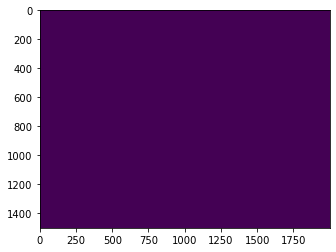

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 17 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:03:51
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 15:03:51
A100-SXM4-40GB - 1564520013405 - Utilization: 36% - Timestamp: 2023-04-02 15:03:51
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:03:51
time taken for iteration 17
Execution time: 0.55 seconds


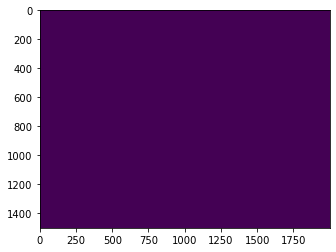

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 16 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:03:53
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 15:03:53
A100-SXM4-40GB - 1564520013405 - Utilization: 34% - Timestamp: 2023-04-02 15:03:53
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:03:53
time taken for iteration 16
Execution time: 0.48 seconds


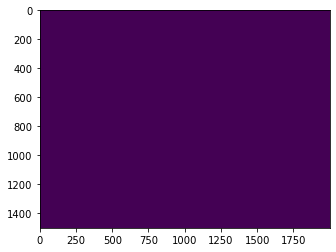

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 15 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:03:55
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 15:03:55
A100-SXM4-40GB - 1564520013405 - Utilization: 32% - Timestamp: 2023-04-02 15:03:55
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:03:55
time taken for iteration 15
Execution time: 0.46 seconds


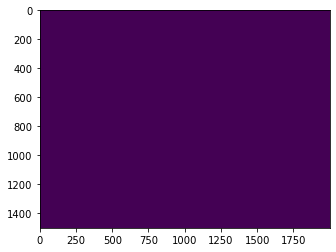

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 14 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:03:56
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 15:03:56
A100-SXM4-40GB - 1564520013405 - Utilization: 13% - Timestamp: 2023-04-02 15:03:56
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:03:56
time taken for iteration 14
Execution time: 0.49 seconds


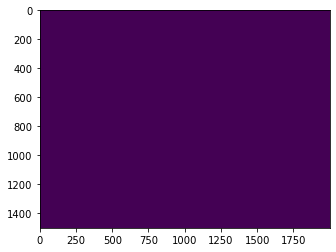

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 13 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:03:57
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 15:03:57
A100-SXM4-40GB - 1564520013405 - Utilization: 23% - Timestamp: 2023-04-02 15:03:57
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:03:57
time taken for iteration 13
Execution time: 0.48 seconds


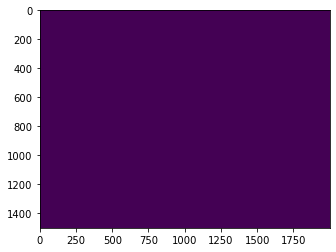

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 12 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:03:59
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 15:03:59
A100-SXM4-40GB - 1564520013405 - Utilization: 28% - Timestamp: 2023-04-02 15:03:59
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:03:59
time taken for iteration 12
Execution time: 0.42 seconds


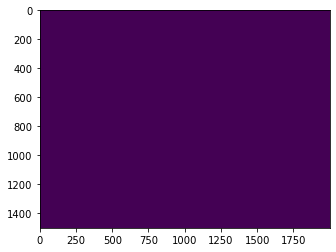

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 11 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:04:00
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 15:04:00
A100-SXM4-40GB - 1564520013405 - Utilization: 13% - Timestamp: 2023-04-02 15:04:00
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:04:00
time taken for iteration 11
Execution time: 0.50 seconds


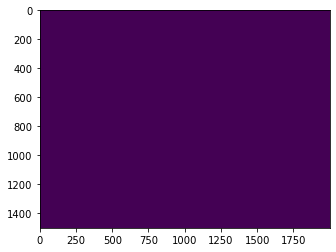

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 10 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:04:01
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 15:04:01
A100-SXM4-40GB - 1564520013405 - Utilization: 16% - Timestamp: 2023-04-02 15:04:01
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:04:01
time taken for iteration 10
Execution time: 0.46 seconds


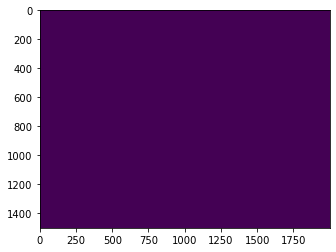

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 9 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:04:03
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 15:04:03
A100-SXM4-40GB - 1564520013405 - Utilization: 21% - Timestamp: 2023-04-02 15:04:03
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:04:03
time taken for iteration 9
Execution time: 0.42 seconds


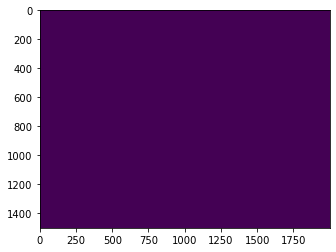

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 8 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:04:04
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 15:04:04
A100-SXM4-40GB - 1564520013405 - Utilization: 7% - Timestamp: 2023-04-02 15:04:04
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:04:04
time taken for iteration 8
Execution time: 0.43 seconds


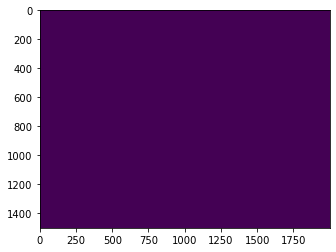

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 7 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:04:05
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 15:04:05
A100-SXM4-40GB - 1564520013405 - Utilization: 7% - Timestamp: 2023-04-02 15:04:05
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:04:05
time taken for iteration 7
Execution time: 0.38 seconds


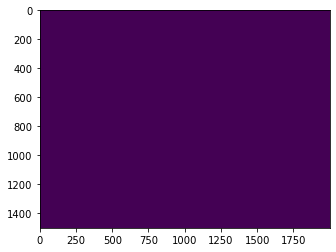

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 6 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:04:06
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 15:04:06
A100-SXM4-40GB - 1564520013405 - Utilization: 11% - Timestamp: 2023-04-02 15:04:06
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:04:06
time taken for iteration 6
Execution time: 0.37 seconds


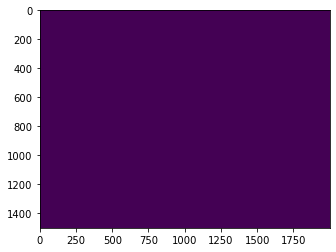

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 5 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:04:07
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 15:04:07
A100-SXM4-40GB - 1564520013405 - Utilization: 20% - Timestamp: 2023-04-02 15:04:07
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:04:08
time taken for iteration 5
Execution time: 0.33 seconds


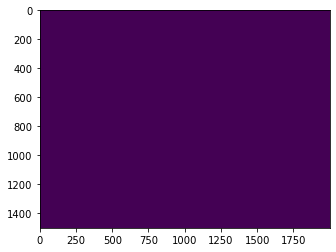

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 4 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:04:09
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 15:04:09
A100-SXM4-40GB - 1564520013405 - Utilization: 14% - Timestamp: 2023-04-02 15:04:09
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:04:09
time taken for iteration 4
Execution time: 0.40 seconds


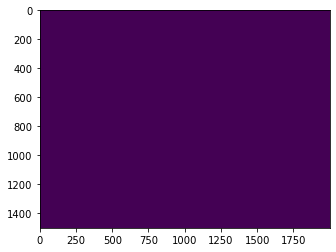

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 3 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:04:10
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 15:04:10
A100-SXM4-40GB - 1564520013405 - Utilization: 14% - Timestamp: 2023-04-02 15:04:10
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:04:10
time taken for iteration 3
Execution time: 0.50 seconds


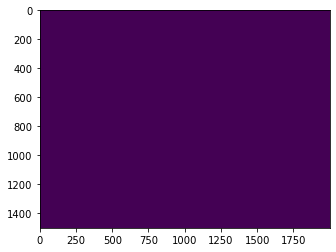

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 2 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:04:11
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 15:04:11
A100-SXM4-40GB - 1564520013405 - Utilization: 7% - Timestamp: 2023-04-02 15:04:11
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:04:11
time taken for iteration 2
Execution time: 0.53 seconds


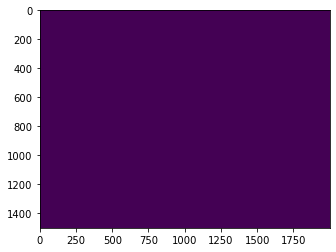

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 1 ,for the image:,000000_000000_000650_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:04:13
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 15:04:13
A100-SXM4-40GB - 1564520013405 - Utilization: 16% - Timestamp: 2023-04-02 15:04:13
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:04:13
time taken for iteration 1
Execution time: 0.41 seconds


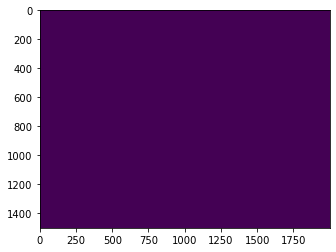

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
000000_000000_000704_000000.tif


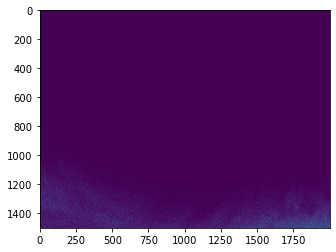

Device: cuda:2
time taken for assigning  image: 000000_000000_000704_000000.tif
Execution time: 0.91 seconds
(this iteration is with g value, 100 ,for the image:,000000_000000_000704_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:04:15
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 15:04:15
A100-SXM4-40GB - 1564520013405 - Utilization: 25% - Timestamp: 2023-04-02 15:04:15
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:04:15
time taken for iteration 100
Execution time: 0.45 seconds


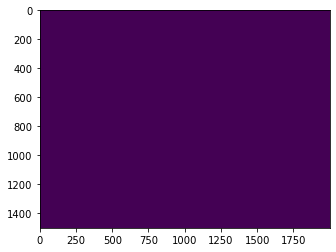

0  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 99 ,for the image:,000000_000000_000704_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:04:16
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 15:04:16
A100-SXM4-40GB - 1564520013405 - Utilization: 23% - Timestamp: 2023-04-02 15:04:16
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:04:16
time taken for iteration 99
Execution time: 0.42 seconds


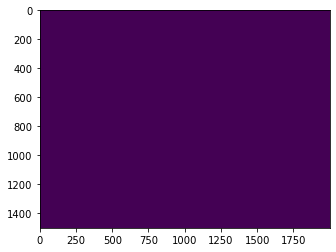

0  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 98 ,for the image:,000000_000000_000704_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:04:18
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 15:04:18
A100-SXM4-40GB - 1564520013405 - Utilization: 22% - Timestamp: 2023-04-02 15:04:18
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:04:18
time taken for iteration 98
Execution time: 0.45 seconds


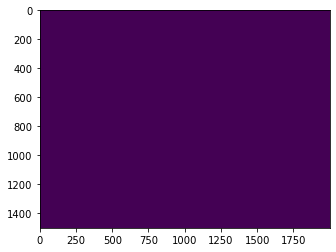

0  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 97 ,for the image:,000000_000000_000704_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:04:19
A100-SXM4-40GB - 1564620000653 - Utilization: 41% - Timestamp: 2023-04-02 15:04:19
A100-SXM4-40GB - 1564520013405 - Utilization: 24% - Timestamp: 2023-04-02 15:04:19
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:04:19
time taken for iteration 97
Execution time: 0.43 seconds


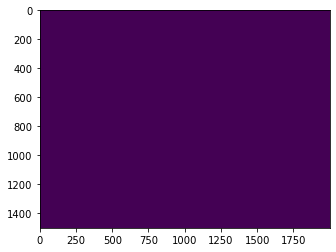

0  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 96 ,for the image:,000000_000000_000704_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:04:21
A100-SXM4-40GB - 1564620000653 - Utilization: 44% - Timestamp: 2023-04-02 15:04:21
A100-SXM4-40GB - 1564520013405 - Utilization: 26% - Timestamp: 2023-04-02 15:04:21
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:04:21
time taken for iteration 96
Execution time: 0.47 seconds


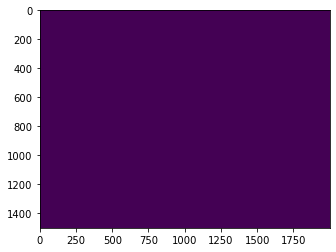

0  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 95 ,for the image:,000000_000000_000704_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:04:22
A100-SXM4-40GB - 1564620000653 - Utilization: 40% - Timestamp: 2023-04-02 15:04:22
A100-SXM4-40GB - 1564520013405 - Utilization: 24% - Timestamp: 2023-04-02 15:04:22
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:04:22
time taken for iteration 95
Execution time: 0.43 seconds


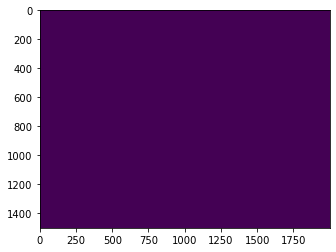

0  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 94 ,for the image:,000000_000000_000704_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:04:23
A100-SXM4-40GB - 1564620000653 - Utilization: 47% - Timestamp: 2023-04-02 15:04:23
A100-SXM4-40GB - 1564520013405 - Utilization: 39% - Timestamp: 2023-04-02 15:04:23
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:04:23
time taken for iteration 94
Execution time: 0.40 seconds


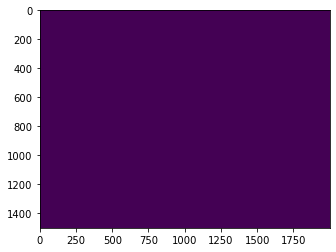

0  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 93 ,for the image:,000000_000000_000704_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:04:25
A100-SXM4-40GB - 1564620000653 - Utilization: 40% - Timestamp: 2023-04-02 15:04:25
A100-SXM4-40GB - 1564520013405 - Utilization: 28% - Timestamp: 2023-04-02 15:04:25
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:04:25
time taken for iteration 93
Execution time: 0.45 seconds


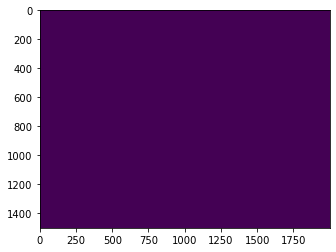

0  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 92 ,for the image:,000000_000000_000704_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:04:26
A100-SXM4-40GB - 1564620000653 - Utilization: 12% - Timestamp: 2023-04-02 15:04:26
A100-SXM4-40GB - 1564520013405 - Utilization: 39% - Timestamp: 2023-04-02 15:04:26
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:04:26
time taken for iteration 92
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:04:26Execution time: 0.47 seconds

A100-SXM4-40GB - 1564620000653 - Utilization: 12% - Timestamp: 2023-04-02 15:04:26
A100-SXM4-40GB - 1564520013405 - Utilization: 3% - Timestamp: 2023-04-02 15:04:26
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:04:26
time taken for iteration 78
Execution time: 86.07 seconds


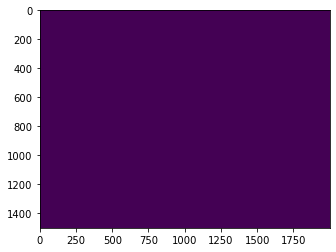

0  <=50 and number_1 >=25 
0 >= 2
######################################################################


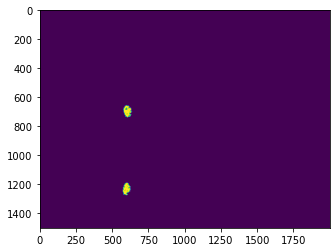

(this iteration is with g value, 91 ,for the image:,000000_000000_000704_000000.tif, on Device: cuda:22
  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 77 ,for the image:,000000_000000_000428_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:04:27
A100-SXM4-40GB - 1564620000653 - Utilization: 0% - Timestamp: 2023-04-02 15:04:27
A100-SXM4-40GB - 1564520013405 - Utilization: 15% - Timestamp: 2023-04-02 15:04:27
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:04:27
time taken for iteration 91
Execution time: 0.49 seconds


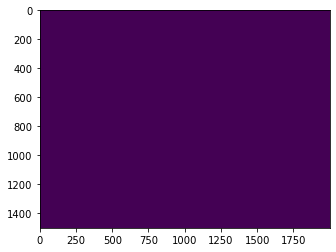

0  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 90 ,for the image:,000000_000000_000704_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:04:29
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 15:04:29
A100-SXM4-40GB - 1564520013405 - Utilization: 30% - Timestamp: 2023-04-02 15:04:29
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:04:29
time taken for iteration 90
Execution time: 0.48 seconds


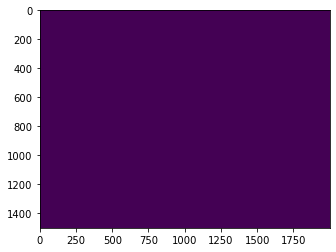

0  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 89 ,for the image:,000000_000000_000704_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:04:30
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 15:04:30
A100-SXM4-40GB - 1564520013405 - Utilization: 42% - Timestamp: 2023-04-02 15:04:30
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:04:30
time taken for iteration 89
Execution time: 0.51 seconds


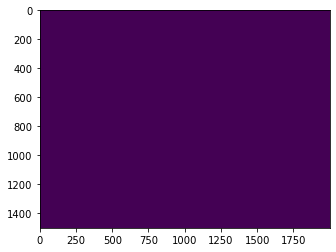

0  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 88 ,for the image:,000000_000000_000704_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 89% - Timestamp: 2023-04-02 15:04:42
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 15:04:42
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 15:04:42
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:04:43
time taken for iteration 46
Execution time: 129.51 seconds


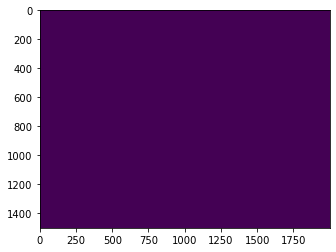

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 45 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:05:52
A100-SXM4-40GB - 1564620000653 - Utilization: 11% - Timestamp: 2023-04-02 15:05:52
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 15:05:52
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:05:52
time taken for iteration 77
Execution time: 85.00 seconds


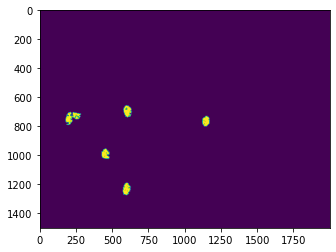

5  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 76 ,for the image:,000000_000000_000428_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:06:15
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 15:06:15
A100-SXM4-40GB - 1564520013405 - Utilization: 29% - Timestamp: 2023-04-02 15:06:15
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:06:15
time taken for iteration 88
Execution time: 104.15 seconds


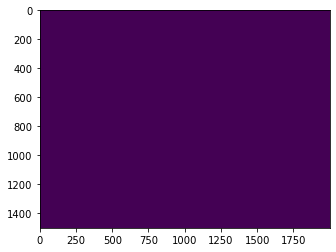

0  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 87 ,for the image:,000000_000000_000704_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 67% - Timestamp: 2023-04-02 15:06:31
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 15:06:31
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 15:06:31
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:06:31
time taken for iteration 45
Execution time: 107.65 seconds


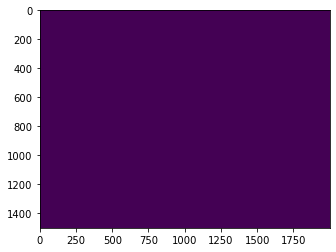

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 44 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:07:18
A100-SXM4-40GB - 1564620000653 - Utilization: 10% - Timestamp: 2023-04-02 15:07:18
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 15:07:18
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:07:18
time taken for iteration 76
Execution time: 84.48 seconds


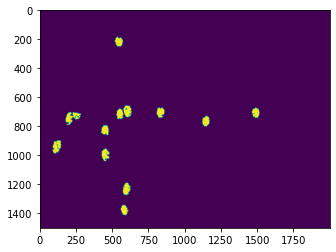

12  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 75 ,for the image:,000000_000000_000428_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:07:37
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 15:07:37
A100-SXM4-40GB - 1564520013405 - Utilization: 39% - Timestamp: 2023-04-02 15:07:37
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:07:37
time taken for iteration 87
Execution time: 80.59 seconds


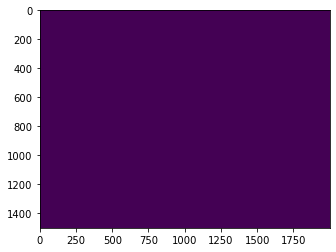

0  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 86 ,for the image:,000000_000000_000704_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:08:41
A100-SXM4-40GB - 1564620000653 - Utilization: 10% - Timestamp: 2023-04-02 15:08:42
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 15:08:42
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:08:42
time taken for iteration 75
Execution time: 83.00 seconds


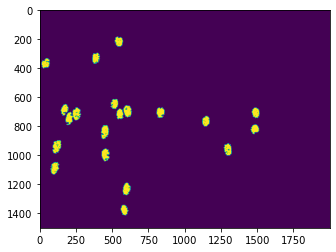

19  <=50 and number_1 >=25 
2 >= 2
######################################################################
(this iteration is with g value, 74 ,for the image:,000000_000000_000428_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 61% - Timestamp: 2023-04-02 15:08:55
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 15:08:55
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 15:08:55
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:08:55
time taken for iteration 44
Execution time: 143.17 seconds


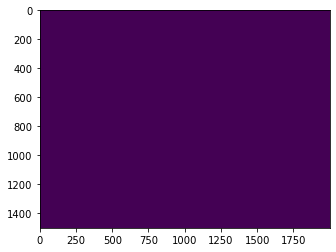

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 43 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:09:22
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 15:09:22
A100-SXM4-40GB - 1564520013405 - Utilization: 10% - Timestamp: 2023-04-02 15:09:22
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:09:22
time taken for iteration 86
Execution time: 104.46 seconds


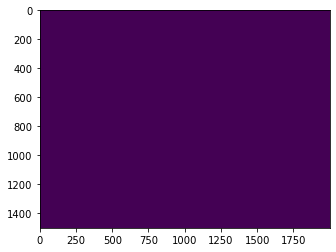

0  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 85 ,for the image:,000000_000000_000704_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:10:04
A100-SXM4-40GB - 1564620000653 - Utilization: 0% - Timestamp: 2023-04-02 15:10:04
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 15:10:04
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:10:04
time taken for iteration 74
Execution time: 81.60 seconds


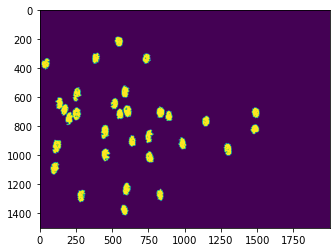

29  <=50 and number_1 >=25 
4 >= 2
######################################################################
(this iteration is with g value, 73 ,for the image:,000000_000000_000428_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:10:44
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 15:10:44
A100-SXM4-40GB - 1564520013405 - Utilization: 36% - Timestamp: 2023-04-02 15:10:44
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:10:44
time taken for iteration 85
Execution time: 80.67 seconds


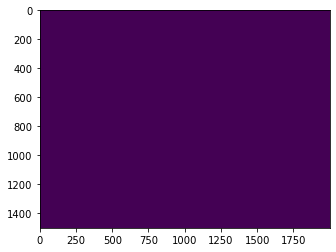

0  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 84 ,for the image:,000000_000000_000704_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 94% - Timestamp: 2023-04-02 15:11:19
A100-SXM4-40GB - 1564620000653 - Utilization: 42% - Timestamp: 2023-04-02 15:11:19
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 15:11:19
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:11:19
time taken for iteration 43
Execution time: 142.86 seconds


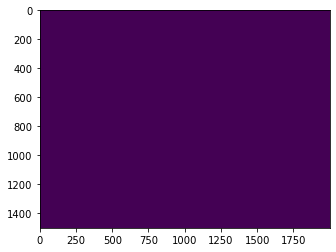

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 42 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:11:26
A100-SXM4-40GB - 1564620000653 - Utilization: 0% - Timestamp: 2023-04-02 15:11:26
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 15:11:26
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:11:27
time taken for iteration 73
Execution time: 81.63 seconds


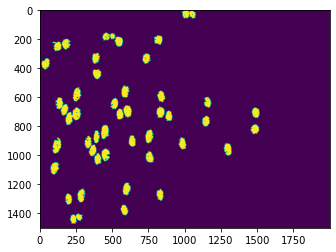

43  <=50 and number_1 >=25 
4 >= 2
######################################################################
(this iteration is with g value, 72 ,for the image:,000000_000000_000428_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:12:28
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 15:12:28
A100-SXM4-40GB - 1564520013405 - Utilization: 10% - Timestamp: 2023-04-02 15:12:28
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:12:28
time taken for iteration 84
Execution time: 103.65 seconds


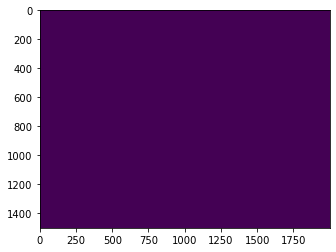

0  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 83 ,for the image:,000000_000000_000704_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:12:47
A100-SXM4-40GB - 1564620000653 - Utilization: 0% - Timestamp: 2023-04-02 15:12:47
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 15:12:47
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:12:47
time taken for iteration 72
Execution time: 79.35 seconds


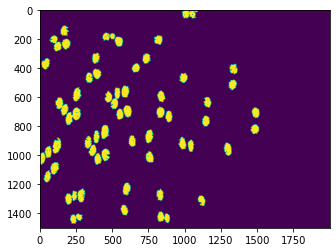

56  <=50 and number_1 >=25 
6 >= 2
######################################################################
(this iteration is with g value, 71 ,for the image:,000000_000000_000428_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 79% - Timestamp: 2023-04-02 15:13:44
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 15:13:44
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 15:13:44
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:13:44
time taken for iteration 42
Execution time: 144.55 seconds


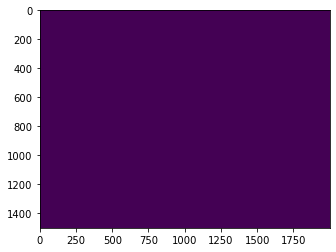

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 41 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:14:06
A100-SXM4-40GB - 1564620000653 - Utilization: 0% - Timestamp: 2023-04-02 15:14:06
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 15:14:06
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:14:06
time taken for iteration 71
Execution time: 78.10 seconds


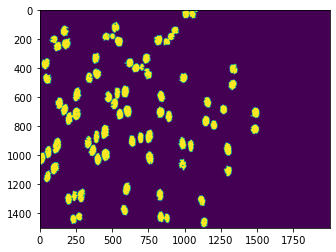

64  <=50 and number_1 >=25 
12 >= 2
######################################################################
(this iteration is with g value, 70 ,for the image:,000000_000000_000428_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:14:13
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 15:14:13
A100-SXM4-40GB - 1564520013405 - Utilization: 42% - Timestamp: 2023-04-02 15:14:13
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:14:13
time taken for iteration 83
Execution time: 103.92 seconds


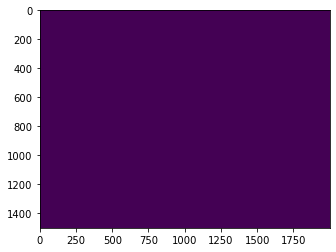

0  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 82 ,for the image:,000000_000000_000704_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:15:24
A100-SXM4-40GB - 1564620000653 - Utilization: 0% - Timestamp: 2023-04-02 15:15:24
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 15:15:24
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:15:24
time taken for iteration 70
Execution time: 77.76 seconds


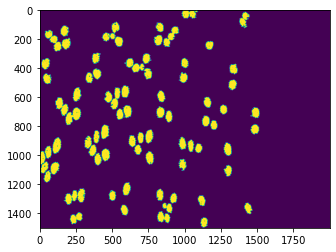

74  <=50 and number_1 >=25 
16 >= 2
######################################################################
(this iteration is with g value, 69 ,for the image:,000000_000000_000428_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:15:40
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 15:15:40
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 15:15:40
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:15:40
time taken for iteration 41
Execution time: 114.90 seconds


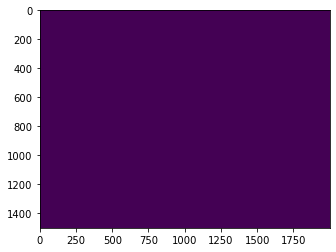

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 40 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:15:58
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 15:15:58
A100-SXM4-40GB - 1564520013405 - Utilization: 37% - Timestamp: 2023-04-02 15:15:58
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:15:58
time taken for iteration 82
Execution time: 103.96 seconds


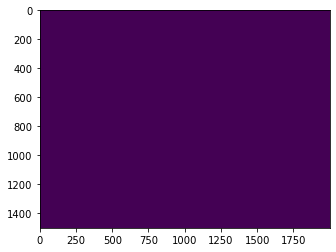

0  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 81 ,for the image:,000000_000000_000704_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:16:41
A100-SXM4-40GB - 1564620000653 - Utilization: 0% - Timestamp: 2023-04-02 15:16:41
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 15:16:41
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:16:41
time taken for iteration 69
Execution time: 75.43 seconds


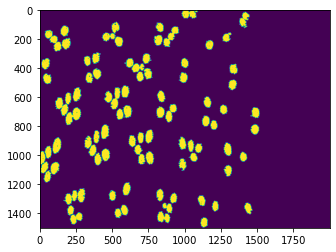

82  <=50 and number_1 >=25 
20 >= 2
######################################################################
(this iteration is with g value, 68 ,for the image:,000000_000000_000428_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:17:19
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 15:17:19
A100-SXM4-40GB - 1564520013405 - Utilization: 27% - Timestamp: 2023-04-02 15:17:19
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:17:19
time taken for iteration 81
Execution time: 80.50 seconds


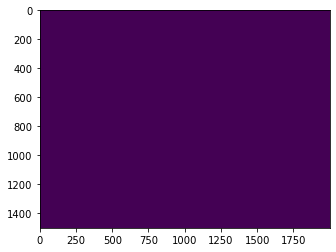

0  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 80 ,for the image:,000000_000000_000704_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:17:38
A100-SXM4-40GB - 1564620000653 - Utilization: 41% - Timestamp: 2023-04-02 15:17:38
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 15:17:38
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:17:38
time taken for iteration 40
Execution time: 116.94 seconds


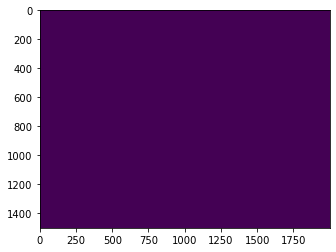

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 39 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:17:42
A100-SXM4-40GB - 1564620000653 - Utilization: 0% - Timestamp: 2023-04-02 15:17:42
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 15:17:42
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:17:42
time taken for iteration 68
Execution time: 60.00 seconds


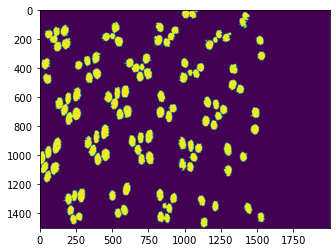

91  <=50 and number_1 >=25 
24 >= 2
######################################################################
(this iteration is with g value, 67 ,for the image:,000000_000000_000428_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:18:41
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 15:18:41
A100-SXM4-40GB - 1564520013405 - Utilization: 33% - Timestamp: 2023-04-02 15:18:41
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:18:41
time taken for iteration 80
Execution time: 80.95 seconds


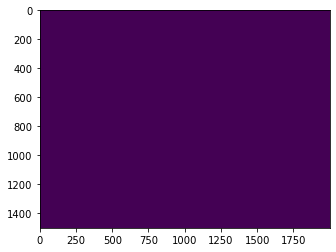

0  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 79 ,for the image:,000000_000000_000704_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:18:55
A100-SXM4-40GB - 1564620000653 - Utilization: 0% - Timestamp: 2023-04-02 15:18:55
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 15:18:55
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:18:55
time taken for iteration 67
Execution time: 72.72 seconds


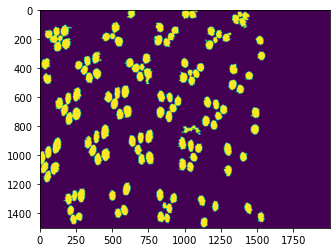

93  <=50 and number_1 >=25 
28 >= 2
######################################################################
(this iteration is with g value, 66 ,for the image:,000000_000000_000428_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:20:07
A100-SXM4-40GB - 1564620000653 - Utilization: 0% - Timestamp: 2023-04-02 15:20:07
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 15:20:08
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:20:08
time taken for iteration 66
Execution time: 71.21 seconds


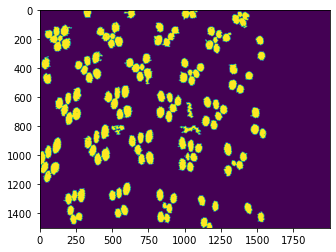

97  <=50 and number_1 >=25 
38 >= 2
######################################################################
(this iteration is with g value, 65 ,for the image:,000000_000000_000428_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:20:11
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 15:20:11
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 15:20:11
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:20:11
time taken for iteration 39
Execution time: 152.11 seconds


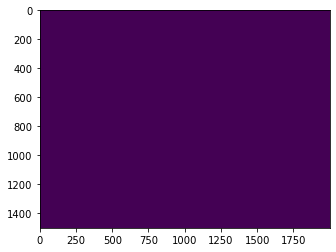

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 38 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:20:26
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 15:20:26
A100-SXM4-40GB - 1564520013405 - Utilization: 22% - Timestamp: 2023-04-02 15:20:26
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:20:26
time taken for iteration 79
Execution time: 103.82 seconds


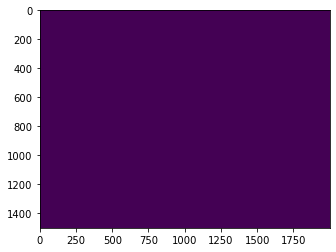

0  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 78 ,for the image:,000000_000000_000704_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:21:05
A100-SXM4-40GB - 1564620000653 - Utilization: 0% - Timestamp: 2023-04-02 15:21:05
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 15:21:05
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:21:05
time taken for iteration 65
Execution time: 56.87 seconds


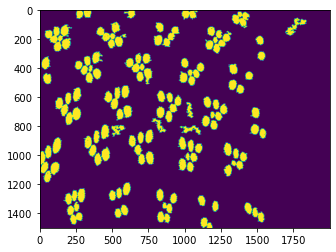

97  <=50 and number_1 >=25 
46 >= 2
######################################################################
(this iteration is with g value, 64 ,for the image:,000000_000000_000428_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:21:47
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 15:21:47
A100-SXM4-40GB - 1564520013405 - Utilization: 17% - Timestamp: 2023-04-02 15:21:47
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:21:47
time taken for iteration 78
Execution time: 80.14 seconds


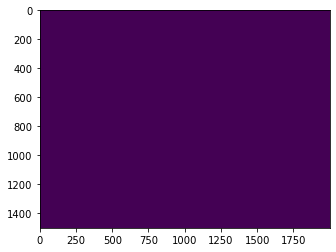

0  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 77 ,for the image:,000000_000000_000704_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 97% - Timestamp: 2023-04-02 15:22:10
A100-SXM4-40GB - 1564620000653 - Utilization: 44% - Timestamp: 2023-04-02 15:22:10
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 15:22:11
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:22:11
time taken for iteration 38
Execution time: 118.66 seconds


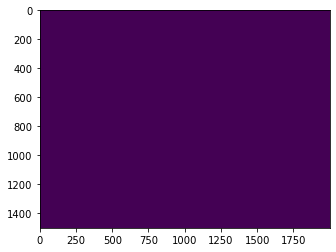

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 37 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:22:14
A100-SXM4-40GB - 1564620000653 - Utilization: 0% - Timestamp: 2023-04-02 15:22:14
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 15:22:14
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:22:14
time taken for iteration 64
Execution time: 68.03 seconds


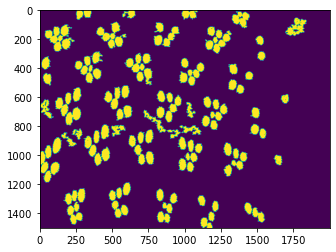

103  <=50 and number_1 >=25 
50 >= 2
######################################################################
(this iteration is with g value, 63 ,for the image:,000000_000000_000428_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:23:09
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 15:23:09
A100-SXM4-40GB - 1564520013405 - Utilization: 36% - Timestamp: 2023-04-02 15:23:09
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:23:09
time taken for iteration 77
Execution time: 81.30 seconds


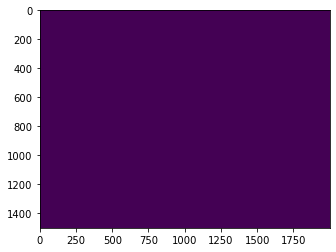

0  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 76 ,for the image:,000000_000000_000704_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:23:22
A100-SXM4-40GB - 1564620000653 - Utilization: 0% - Timestamp: 2023-04-02 15:23:22
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 15:23:22
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:23:22
time taken for iteration 63
Execution time: 66.60 seconds


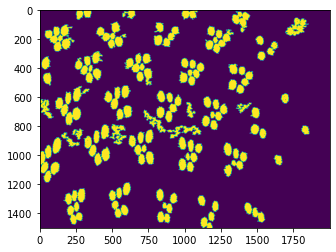

102  <=50 and number_1 >=25 
64 >= 2
######################################################################
(this iteration is with g value, 62 ,for the image:,000000_000000_000428_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 25% - Timestamp: 2023-04-02 15:23:52
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 15:23:52
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 15:23:52
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:23:52
time taken for iteration 37
Execution time: 100.29 seconds


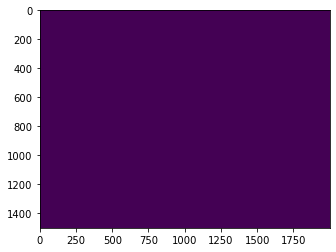

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 36 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:24:27
A100-SXM4-40GB - 1564620000653 - Utilization: 0% - Timestamp: 2023-04-02 15:24:27
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 15:24:27
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:24:27
time taken for iteration 62
Execution time: 64.36 seconds


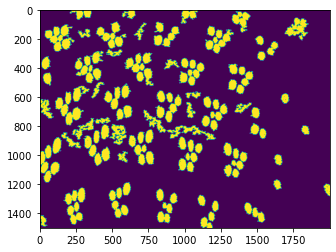

113  <=50 and number_1 >=25 
66 >= 2
######################################################################
(this iteration is with g value, 61 ,for the image:,000000_000000_000428_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:24:54
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 15:24:54
A100-SXM4-40GB - 1564520013405 - Utilization: 28% - Timestamp: 2023-04-02 15:24:54
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:24:54
time taken for iteration 76
Execution time: 103.86 seconds


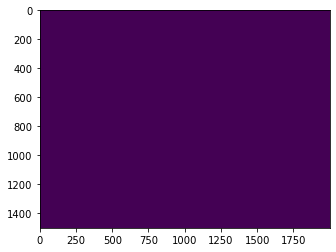

0  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 75 ,for the image:,000000_000000_000704_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 82% - Timestamp: 2023-04-02 15:25:21
A100-SXM4-40GB - 1564620000653 - Utilization: 60% - Timestamp: 2023-04-02 15:25:22
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 15:25:22
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:25:22
time taken for iteration 36
Execution time: 89.11 seconds


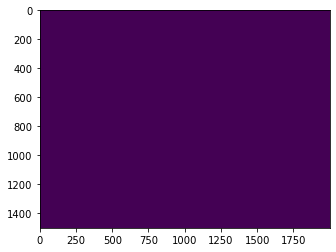

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 35 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:25:29
A100-SXM4-40GB - 1564620000653 - Utilization: 0% - Timestamp: 2023-04-02 15:25:29
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 15:25:29
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:25:29
time taken for iteration 61
Execution time: 60.78 seconds


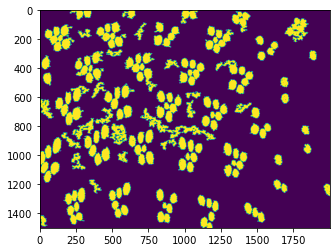

116  <=50 and number_1 >=25 
70 >= 2
######################################################################
(this iteration is with g value, 60 ,for the image:,000000_000000_000428_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:26:15
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 15:26:15
A100-SXM4-40GB - 1564520013405 - Utilization: 30% - Timestamp: 2023-04-02 15:26:15
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:26:15
time taken for iteration 75
Execution time: 80.22 seconds


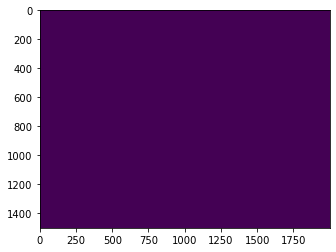

0  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 74 ,for the image:,000000_000000_000704_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:26:28
A100-SXM4-40GB - 1564620000653 - Utilization: 0% - Timestamp: 2023-04-02 15:26:28
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 15:26:28
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:26:28
time taken for iteration 60
Execution time: 58.66 seconds


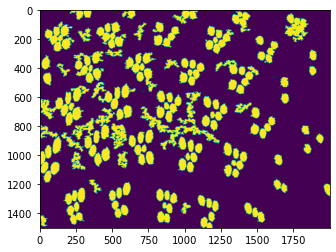

117  <=50 and number_1 >=25 
82 >= 2
######################################################################
(this iteration is with g value, 59 ,for the image:,000000_000000_000428_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 76% - Timestamp: 2023-04-02 15:26:52
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 15:26:52
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 15:26:52
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:26:52
time taken for iteration 35
Execution time: 89.50 seconds


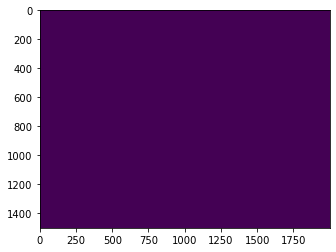

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 34 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:27:25
A100-SXM4-40GB - 1564620000653 - Utilization: 0% - Timestamp: 2023-04-02 15:27:25
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 15:27:25
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:27:25
time taken for iteration 59
Execution time: 56.53 seconds


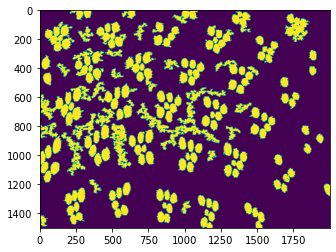

116  <=50 and number_1 >=25 
90 >= 2
######################################################################
(this iteration is with g value, 58 ,for the image:,000000_000000_000428_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:27:36
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 15:27:36
A100-SXM4-40GB - 1564520013405 - Utilization: 70% - Timestamp: 2023-04-02 15:27:36
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:27:36
time taken for iteration 74
Execution time: 80.81 seconds


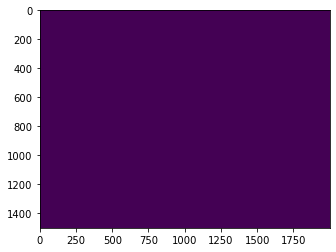

0  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 73 ,for the image:,000000_000000_000704_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 40% - Timestamp: 2023-04-02 15:28:03
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 15:28:03
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 15:28:03
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:28:03
time taken for iteration 34
Execution time: 70.58 seconds


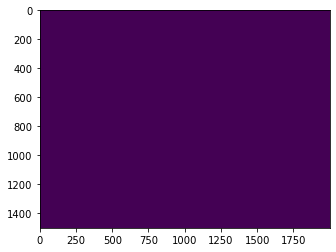

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 33 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 24% - Timestamp: 2023-04-02 15:28:04
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 15:28:04
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 15:28:04
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:28:04
time taken for iteration 33
Execution time: 0.43 seconds


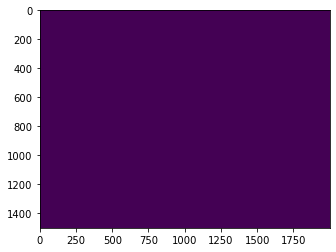

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 32 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 22% - Timestamp: 2023-04-02 15:28:05
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 15:28:05
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 15:28:05
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:28:05
time taken for iteration 32
Execution time: 0.39 seconds


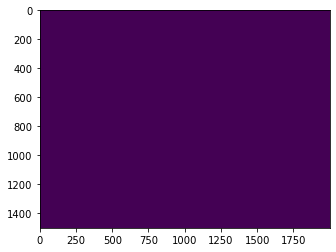

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 31 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 1% - Timestamp: 2023-04-02 15:28:06
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 15:28:06
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 15:28:06
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:28:06
time taken for iteration 31
Execution time: 0.39 seconds


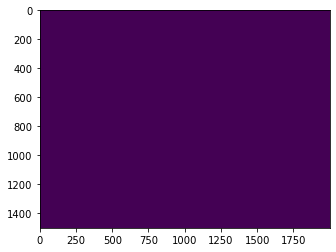

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 30 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 34% - Timestamp: 2023-04-02 15:28:07
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 15:28:07
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 15:28:07
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:28:07
time taken for iteration 30
Execution time: 0.38 seconds


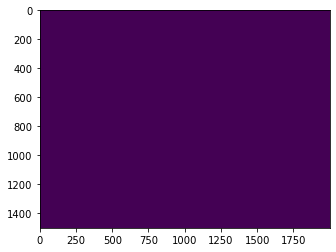

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 29 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 30% - Timestamp: 2023-04-02 15:28:08
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 15:28:08
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 15:28:08
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:28:08
time taken for iteration 29
Execution time: 0.39 seconds


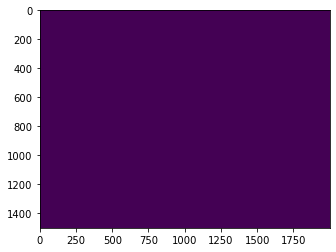

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 28 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 18% - Timestamp: 2023-04-02 15:28:09
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 15:28:09
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 15:28:09
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:28:09
time taken for iteration 28
Execution time: 0.38 seconds


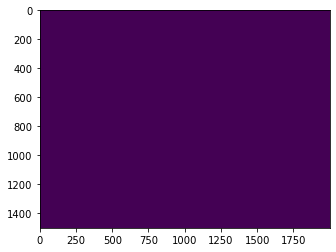

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 27 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 16% - Timestamp: 2023-04-02 15:28:10
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 15:28:10
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 15:28:10
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:28:11
time taken for iteration 27
Execution time: 0.41 seconds


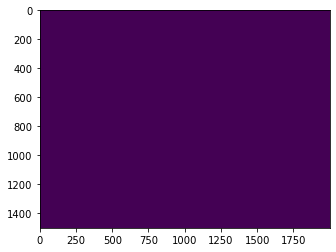

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 26 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 27% - Timestamp: 2023-04-02 15:28:12
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 15:28:12
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 15:28:12
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:28:12
time taken for iteration 26
Execution time: 0.44 seconds


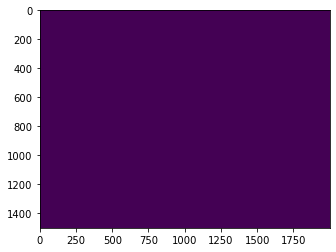

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 25 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 1% - Timestamp: 2023-04-02 15:28:13
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 15:28:13
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 15:28:13
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:28:13
time taken for iteration 25
Execution time: 0.38 seconds


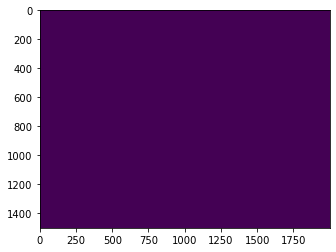

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 24 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 1% - Timestamp: 2023-04-02 15:28:14
A100-SXM4-40GB - 1564620000653 - Utilization: 80% - Timestamp: 2023-04-02 15:28:14
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 15:28:14
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:28:14
time taken for iteration 24
Execution time: 0.34 seconds


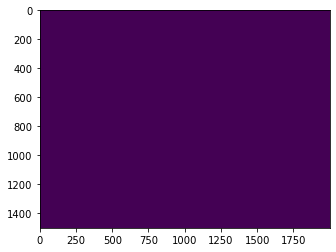

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 23 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 0% - Timestamp: 2023-04-02 15:28:15
A100-SXM4-40GB - 1564620000653 - Utilization: 55% - Timestamp: 2023-04-02 15:28:15
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 15:28:15
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:28:15
time taken for iteration 23
Execution time: 0.35 seconds


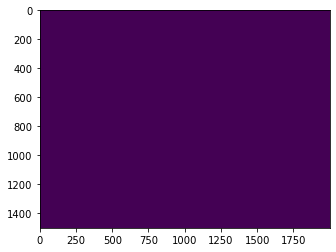

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 22 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 0% - Timestamp: 2023-04-02 15:28:16
A100-SXM4-40GB - 1564620000653 - Utilization: 57% - Timestamp: 2023-04-02 15:28:16
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 15:28:16
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:28:16
time taken for iteration 22
Execution time: 0.34 seconds


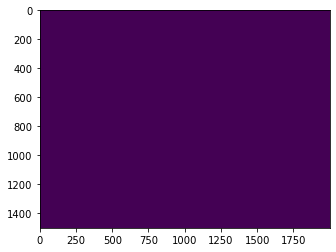

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 21 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 19% - Timestamp: 2023-04-02 15:28:17
A100-SXM4-40GB - 1564620000653 - Utilization: 52% - Timestamp: 2023-04-02 15:28:17
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 15:28:17
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:28:17
time taken for iteration 21
Execution time: 0.37 seconds


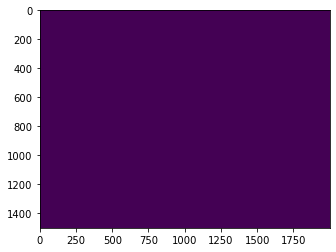

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 20 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 0% - Timestamp: 2023-04-02 15:28:18
A100-SXM4-40GB - 1564620000653 - Utilization: 58% - Timestamp: 2023-04-02 15:28:18
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 15:28:18
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:28:18
time taken for iteration 20
Execution time: 0.33 seconds


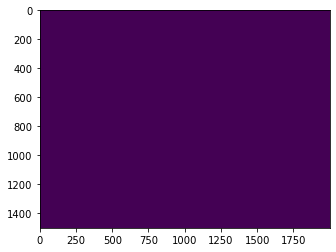

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 19 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 0% - Timestamp: 2023-04-02 15:28:19
A100-SXM4-40GB - 1564620000653 - Utilization: 71% - Timestamp: 2023-04-02 15:28:19
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 15:28:19
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:28:19
time taken for iteration 19
Execution time: 0.31 seconds


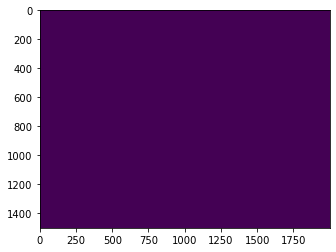

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 18 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 1% - Timestamp: 2023-04-02 15:28:20
A100-SXM4-40GB - 1564620000653 - Utilization: 0% - Timestamp: 2023-04-02 15:28:20
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 15:28:20
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:28:20
time taken for iteration 18
Execution time: 0.36 seconds
A100-SXM4-40GB - 1564520013243 - Utilization: 0% - Timestamp: 2023-04-02 15:28:20
A100-SXM4-40GB - 1564620000653 - Utilization: 0% - Timestamp: 2023-04-02 15:28:20
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 15:28:20
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:28:21
time taken for iteration 58

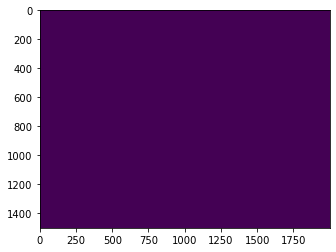


1Execution time: 54.41 seconds
  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 17 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 1% - Timestamp: 2023-04-02 15:28:21
A100-SXM4-40GB - 1564620000653 - Utilization: 0% - Timestamp: 2023-04-02 15:28:21
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 15:28:21
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:28:21
time taken for iteration 17

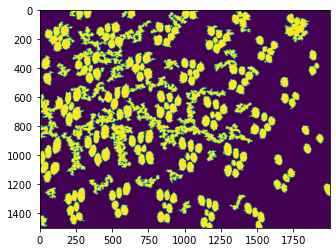


107Execution time: 0.37 seconds
  <=50 and number_1 >=25 
88 >= 2
######################################################################
(this iteration is with g value, 57 ,for the image:,000000_000000_000428_000000.tif, on Device: cuda:1


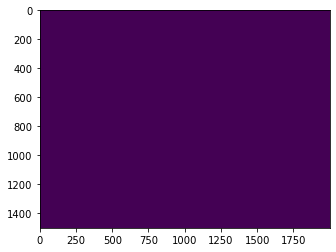

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 16 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 1% - Timestamp: 2023-04-02 15:28:22
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 15:28:22
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 15:28:22
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:28:22
time taken for iteration 16
Execution time: 0.38 seconds


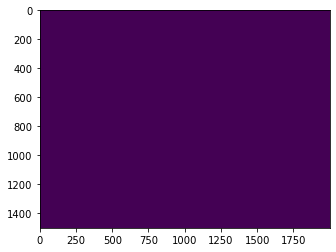

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 15 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 0% - Timestamp: 2023-04-02 15:28:23
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 15:28:23
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 15:28:23
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:28:23
time taken for iteration 15
Execution time: 0.33 seconds


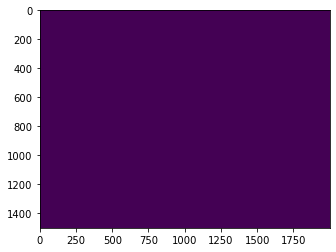

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 14 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 1% - Timestamp: 2023-04-02 15:28:24
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 15:28:24
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 15:28:24
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:28:24
time taken for iteration 14
Execution time: 0.31 seconds


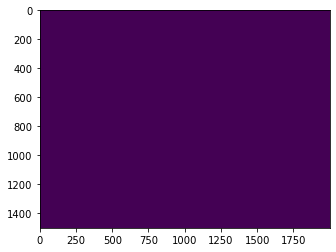

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 13 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 4% - Timestamp: 2023-04-02 15:28:25
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 15:28:25
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 15:28:25
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:28:25
time taken for iteration 13
Execution time: 0.35 seconds


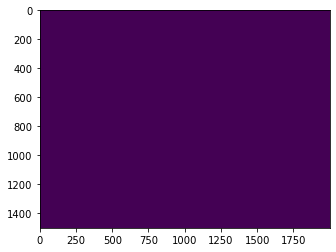

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 12 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 6% - Timestamp: 2023-04-02 15:28:26
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 15:28:26
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 15:28:26
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:28:26
time taken for iteration 12
Execution time: 0.32 seconds


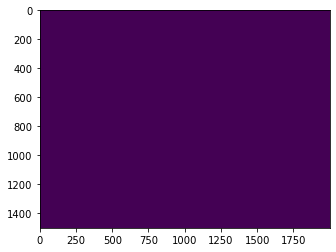

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 11 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 6% - Timestamp: 2023-04-02 15:28:27
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 15:28:27
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 15:28:27
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:28:27
time taken for iteration 11
Execution time: 0.32 seconds


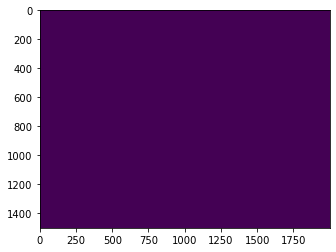

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 10 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 6% - Timestamp: 2023-04-02 15:28:28
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 15:28:28
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 15:28:28
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:28:28
time taken for iteration 10
Execution time: 0.35 seconds


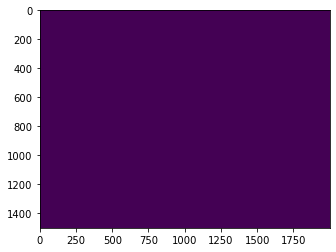

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 9 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 8% - Timestamp: 2023-04-02 15:28:29
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 15:28:29
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 15:28:29
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:28:29
time taken for iteration 9
Execution time: 0.34 seconds


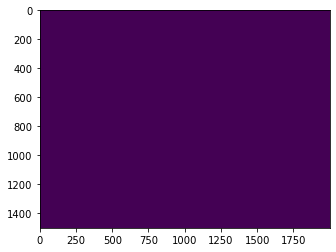

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 8 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 14% - Timestamp: 2023-04-02 15:28:30
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 15:28:30
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 15:28:30
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:28:30
time taken for iteration 8
Execution time: 0.37 seconds


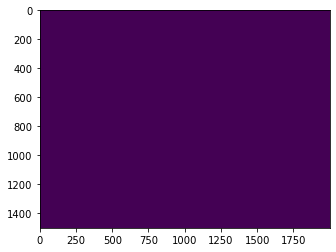

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 7 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 7% - Timestamp: 2023-04-02 15:28:31
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 15:28:31
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 15:28:31
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:28:31
time taken for iteration 7
Execution time: 0.35 seconds


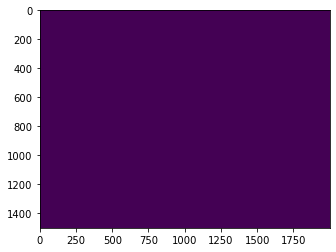

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 6 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 18% - Timestamp: 2023-04-02 15:28:32
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 15:28:32
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 15:28:32
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:28:32
time taken for iteration 6
Execution time: 0.33 seconds


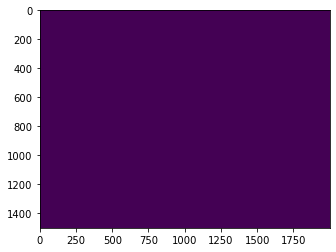

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 5 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 6% - Timestamp: 2023-04-02 15:28:33
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 15:28:33
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 15:28:33
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:28:33
time taken for iteration 5
Execution time: 0.30 seconds


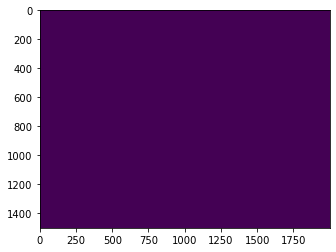

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 4 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 6% - Timestamp: 2023-04-02 15:28:34
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 15:28:34
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 15:28:34
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:28:34
time taken for iteration 4
Execution time: 0.33 seconds


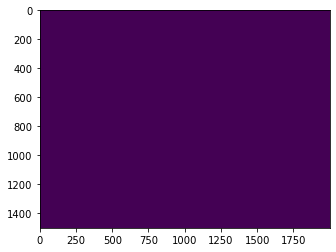

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 3 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 9% - Timestamp: 2023-04-02 15:28:35
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 15:28:35
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 15:28:35
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:28:35
time taken for iteration 3
Execution time: 0.33 seconds


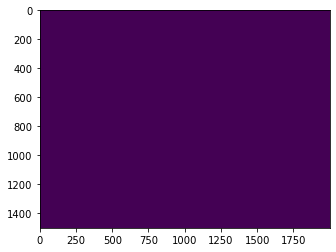

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 2 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 11% - Timestamp: 2023-04-02 15:28:36
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 15:28:36
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 15:28:36
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:28:36
time taken for iteration 2
Execution time: 0.35 seconds


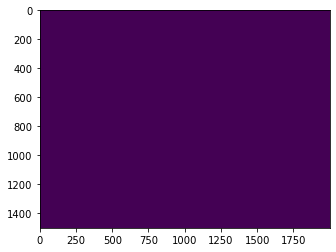

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 1 ,for the image:,000000_000000_000015_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 19% - Timestamp: 2023-04-02 15:28:37
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 15:28:37
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 15:28:37
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:28:37
time taken for iteration 1
Execution time: 0.32 seconds


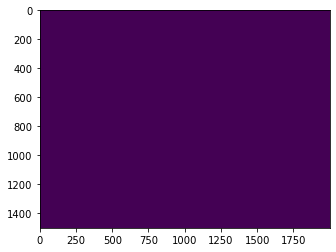

1  <=50 and number_1 >=25 
0 >= 2
######################################################################
000000_000000_000112_000000.tif


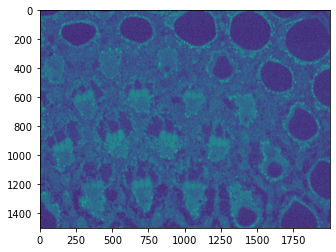

Device: cuda:0
time taken for assigning  image: 000000_000000_000112_000000.tif
Execution time: 0.73 seconds
(this iteration is with g value, 100 ,for the image:,000000_000000_000112_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:29:14
A100-SXM4-40GB - 1564620000653 - Utilization: 0% - Timestamp: 2023-04-02 15:29:14
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 15:29:14
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:29:14
time taken for iteration 57
Execution time: 52.91 seconds


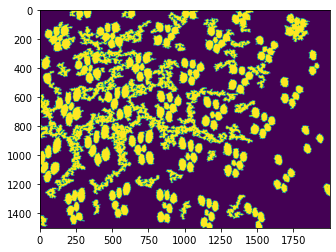

95  <=50 and number_1 >=25 
72 >= 2
######################################################################
(this iteration is with g value, 56 ,for the image:,000000_000000_000428_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:29:20
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 15:29:21
A100-SXM4-40GB - 1564520013405 - Utilization: 43% - Timestamp: 2023-04-02 15:29:21
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:29:21
time taken for iteration 73
Execution time: 103.48 seconds


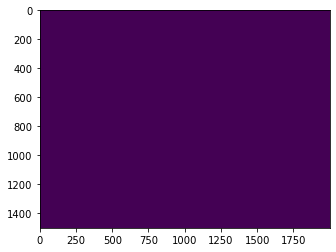

0  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 72 ,for the image:,000000_000000_000704_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:30:06
A100-SXM4-40GB - 1564620000653 - Utilization: 0% - Timestamp: 2023-04-02 15:30:06
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 15:30:06
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:30:06
time taken for iteration 56
Execution time: 51.02 seconds


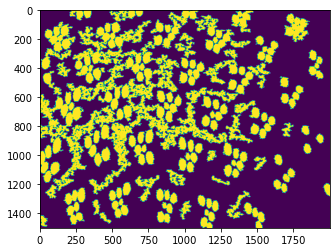

94  <=50 and number_1 >=25 
82 >= 2
######################################################################
(this iteration is with g value, 55 ,for the image:,000000_000000_000428_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 56% - Timestamp: 2023-04-02 15:30:17
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 15:30:17
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 15:30:17
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:30:17
time taken for iteration 100
Execution time: 98.62 seconds


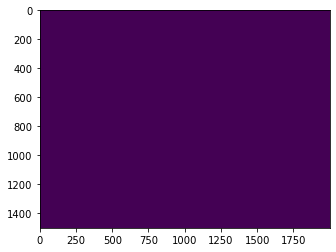

0  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 99 ,for the image:,000000_000000_000112_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:30:42
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 15:30:42
A100-SXM4-40GB - 1564520013405 - Utilization: 55% - Timestamp: 2023-04-02 15:30:42
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:30:42
time taken for iteration 72
Execution time: 80.69 seconds


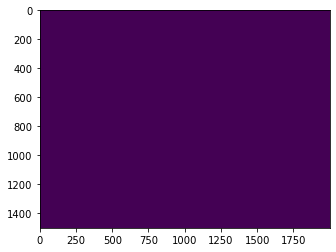

0  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 71 ,for the image:,000000_000000_000704_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:30:55
A100-SXM4-40GB - 1564620000653 - Utilization: 0% - Timestamp: 2023-04-02 15:30:55
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 15:30:55
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:30:55
time taken for iteration 55
Execution time: 48.93 seconds


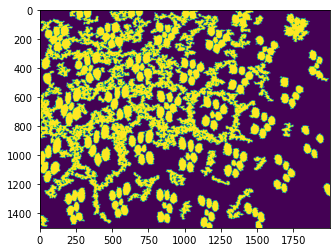

81  <=50 and number_1 >=25 
68 >= 2
######################################################################
(this iteration is with g value, 54 ,for the image:,000000_000000_000428_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 42% - Timestamp: 2023-04-02 15:31:35
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 15:31:35
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 15:31:35
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:31:35
time taken for iteration 99
Execution time: 76.87 seconds


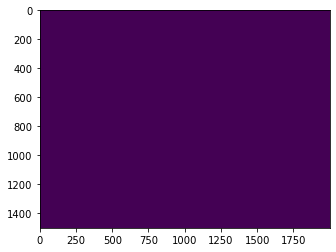

0  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 98 ,for the image:,000000_000000_000112_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:31:43
A100-SXM4-40GB - 1564620000653 - Utilization: 0% - Timestamp: 2023-04-02 15:31:43
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 15:31:43
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:31:43
time taken for iteration 54
Execution time: 46.99 seconds


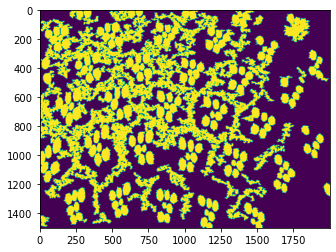

69  <=50 and number_1 >=25 
66 >= 2
######################################################################
(this iteration is with g value, 53 ,for the image:,000000_000000_000428_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:32:26
A100-SXM4-40GB - 1564620000653 - Utilization: 58% - Timestamp: 2023-04-02 15:32:26
A100-SXM4-40GB - 1564520013405 - Utilization: 67% - Timestamp: 2023-04-02 15:32:26
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:32:26
time taken for iteration 71
Execution time: 103.61 seconds


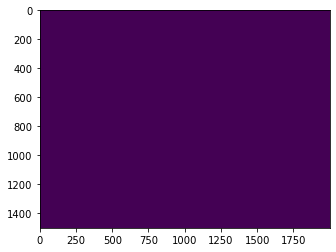

0  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 70 ,for the image:,000000_000000_000704_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:32:29
A100-SXM4-40GB - 1564620000653 - Utilization: 0% - Timestamp: 2023-04-02 15:32:29
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 15:32:29
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:32:29
time taken for iteration 53
Execution time: 45.36 seconds


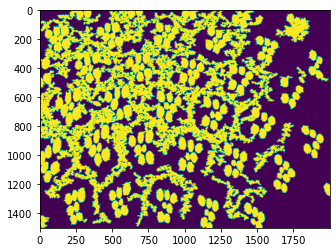

45  <=50 and number_1 >=25 
48 >= 2
######################################################################
(this iteration is with g value, 52 ,for the image:,000000_000000_000428_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 42% - Timestamp: 2023-04-02 15:33:14
A100-SXM4-40GB - 1564620000653 - Utilization: 57% - Timestamp: 2023-04-02 15:33:14
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 15:33:14
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:33:14
time taken for iteration 98
Execution time: 97.94 seconds


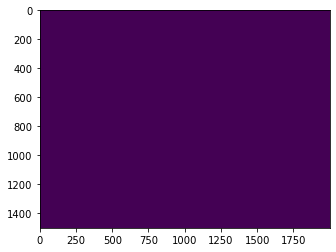

0  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 97 ,for the image:,000000_000000_000112_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:33:17
A100-SXM4-40GB - 1564620000653 - Utilization: 0% - Timestamp: 2023-04-02 15:33:18
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 15:33:18
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:33:18
time taken for iteration 52
Execution time: 47.50 seconds


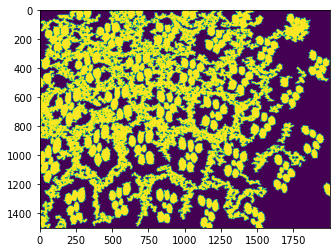

41  <=50 and number_1 >=25 
42 >= 2
######################################################################
(this iteration is with g value, 51 ,for the image:,000000_000000_000428_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:33:47
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 15:33:47
A100-SXM4-40GB - 1564520013405 - Utilization: 35% - Timestamp: 2023-04-02 15:33:47
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:33:47
time taken for iteration 70
Execution time: 80.50 seconds


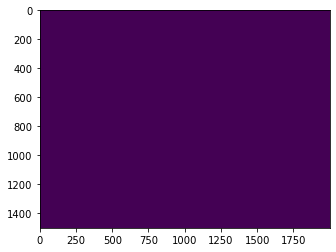

0  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 69 ,for the image:,000000_000000_000704_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:33:58
A100-SXM4-40GB - 1564620000653 - Utilization: 23% - Timestamp: 2023-04-02 15:33:58
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 15:33:58
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:33:58
time taken for iteration 51
Execution time: 39.23 seconds


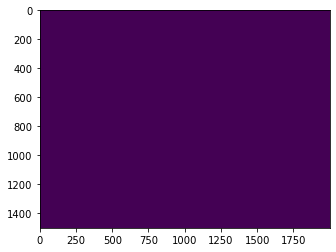

37  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 50 ,for the image:,000000_000000_000428_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 31% - Timestamp: 2023-04-02 15:34:31
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 15:34:31
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 15:34:31
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:34:31
time taken for iteration 97
Execution time: 76.61 seconds


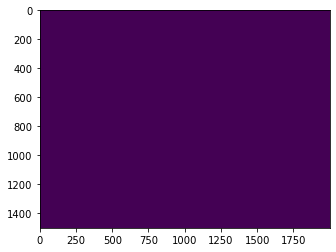

0  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 96 ,for the image:,000000_000000_000112_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:34:37
A100-SXM4-40GB - 1564620000653 - Utilization: 24% - Timestamp: 2023-04-02 15:34:37
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 15:34:37
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:34:37
time taken for iteration 50
Execution time: 38.58 seconds


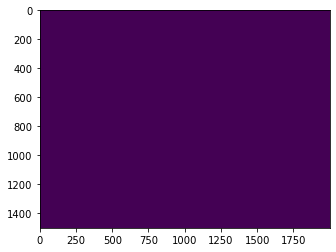

33  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 49 ,for the image:,000000_000000_000428_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:35:08
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 15:35:08
A100-SXM4-40GB - 1564520013405 - Utilization: 42% - Timestamp: 2023-04-02 15:35:08
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:35:08
time taken for iteration 69
Execution time: 80.25 seconds


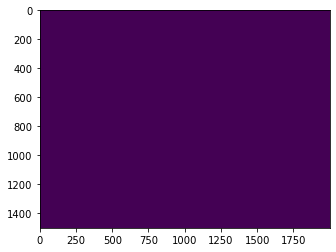

0  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 68 ,for the image:,000000_000000_000704_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:35:16
A100-SXM4-40GB - 1564620000653 - Utilization: 11% - Timestamp: 2023-04-02 15:35:16
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 15:35:16
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:35:16
time taken for iteration 49
Execution time: 38.70 seconds


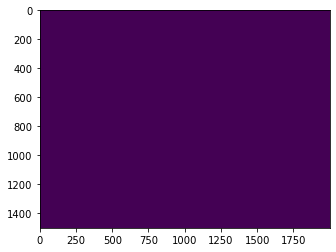

34  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 48 ,for the image:,000000_000000_000428_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:35:55
A100-SXM4-40GB - 1564620000653 - Utilization: 42% - Timestamp: 2023-04-02 15:35:55
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 15:35:55
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:35:55
time taken for iteration 48
Execution time: 37.75 seconds


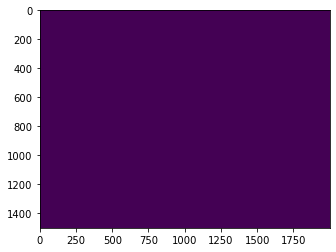

27  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 47 ,for the image:,000000_000000_000428_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 55% - Timestamp: 2023-04-02 15:36:08
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 15:36:08
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 15:36:08
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:36:08
time taken for iteration 96
Execution time: 96.41 seconds


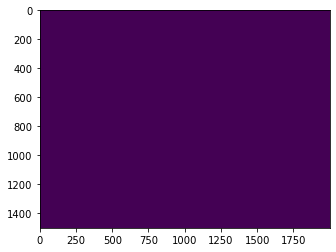

0  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 95 ,for the image:,000000_000000_000112_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:36:29
A100-SXM4-40GB - 1564620000653 - Utilization: 59% - Timestamp: 2023-04-02 15:36:29
A100-SXM4-40GB - 1564520013405 - Utilization: 32% - Timestamp: 2023-04-02 15:36:29
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:36:29
time taken for iteration 68
Execution time: 80.41 seconds


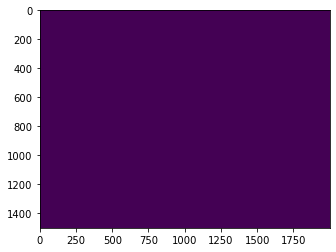

0  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 67 ,for the image:,000000_000000_000704_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:36:33
A100-SXM4-40GB - 1564620000653 - Utilization: 14% - Timestamp: 2023-04-02 15:36:33
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 15:36:33
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:36:33
time taken for iteration 47
Execution time: 37.61 seconds


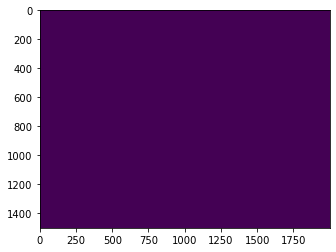

22  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 46 ,for the image:,000000_000000_000428_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:37:16
A100-SXM4-40GB - 1564620000653 - Utilization: 11% - Timestamp: 2023-04-02 15:37:16
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 15:37:16
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:37:16
time taken for iteration 46
Execution time: 42.04 seconds


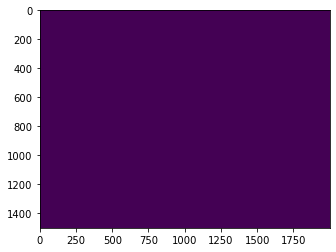

15  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 45 ,for the image:,000000_000000_000428_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 21% - Timestamp: 2023-04-02 15:37:24
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 15:37:24
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 15:37:24
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:37:25
time taken for iteration 95
Execution time: 75.82 seconds


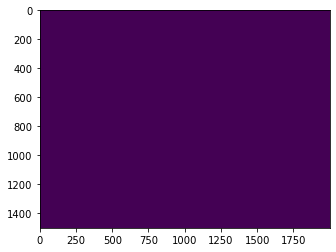

0  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 94 ,for the image:,000000_000000_000112_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:37:51
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 15:37:51
A100-SXM4-40GB - 1564520013405 - Utilization: 44% - Timestamp: 2023-04-02 15:37:51
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:37:51
time taken for iteration 67
Execution time: 80.93 seconds


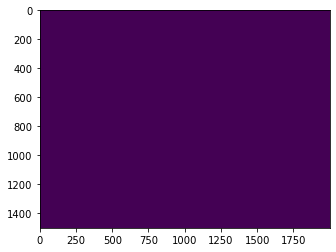

0  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 66 ,for the image:,000000_000000_000704_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:37:58
A100-SXM4-40GB - 1564620000653 - Utilization: 15% - Timestamp: 2023-04-02 15:37:58
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 15:37:58
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:37:58
time taken for iteration 45
Execution time: 41.87 seconds


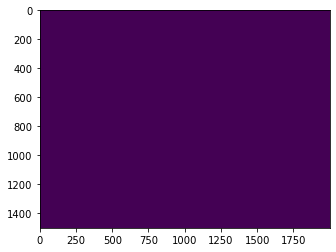

12  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 44 ,for the image:,000000_000000_000428_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:38:41
A100-SXM4-40GB - 1564620000653 - Utilization: 21% - Timestamp: 2023-04-02 15:38:41
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 15:38:41
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:38:41
time taken for iteration 44
Execution time: 42.06 seconds


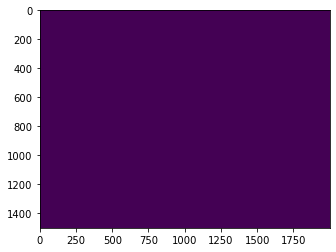

7  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 43 ,for the image:,000000_000000_000428_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 36% - Timestamp: 2023-04-02 15:39:01
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 15:39:01
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 15:39:01
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:39:01
time taken for iteration 94
Execution time: 95.66 seconds


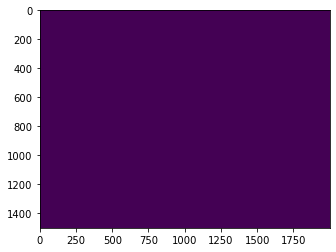

0  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 93 ,for the image:,000000_000000_000112_000000.tif, on Device: cuda:0
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:39:12
A100-SXM4-40GB - 1564620000653 - Utilization: 100% - Timestamp: 2023-04-02 15:39:12
A100-SXM4-40GB - 1564520013405 - Utilization: 58% - Timestamp: 2023-04-02 15:39:12
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:39:12
time taken for iteration 66
Execution time: 80.82 seconds


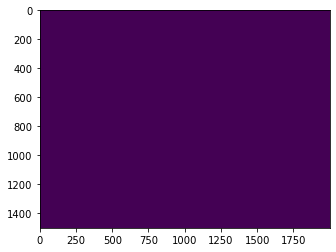

0  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 65 ,for the image:,000000_000000_000704_000000.tif, on Device: cuda:2
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:39:27
A100-SXM4-40GB - 1564620000653 - Utilization: 35% - Timestamp: 2023-04-02 15:39:27
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 15:39:27
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:39:27
time taken for iteration 43
Execution time: 45.24 seconds


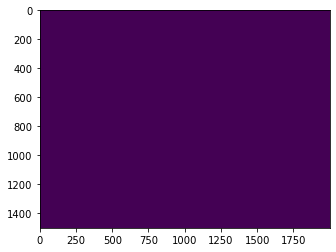

5  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 42 ,for the image:,000000_000000_000428_000000.tif, on Device: cuda:1
A100-SXM4-40GB - 1564520013243 - Utilization: 100% - Timestamp: 2023-04-02 15:40:05
A100-SXM4-40GB - 1564620000653 - Utilization: 42% - Timestamp: 2023-04-02 15:40:05
A100-SXM4-40GB - 1564520013405 - Utilization: 100% - Timestamp: 2023-04-02 15:40:05
A100-SXM4-40GB - 1564620001206 - Utilization: 0% - Timestamp: 2023-04-02 15:40:05
time taken for iteration 42
Execution time: 37.18 seconds


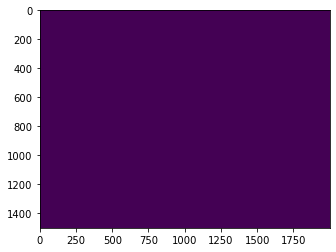

5  <=50 and number_1 >=25 
0 >= 2
######################################################################
(this iteration is with g value, 41 ,for the image:,000000_000000_000428_000000.tif, on Device: cuda:1


In [ ]:

def run(rank, size):
    # Set the CUDA device for this process
    torch.cuda.set_device(rank)
    # Add a print statement here to see the value of rank
    print(f"Rank: {rank}")#################################################################DEBugging
    
    success = False  # Set default value for success
    success_count=0
    starttime()#################################################################################time
    image_files = sorted([os.path.join(s,z) for z in os.listdir(s) if z.endswith("tif")])
    
    # Split the list of image files across all processes (GPUs)
    chunk_size = len(image_files) // size
    start_index = rank * chunk_size
    end_index = start_index + chunk_size if rank < size - 1 else len(image_files)
    
    print ('time for assigining ranks of the gpu :')
    endtime()##################################################################################time
    # Process images assigned to this process (GPU)
    for i in range(start_index,end_index):
            img=mh.imread(image_files[i])
            name_only = os.path.basename(image_files[i])
            #print(name_only)
            starttime()###################################################################time
            print(name_only)
            plt.imshow(img)
            plt.show()              
            #print (z)
            #a =img.shape           
            #plt.imshow(img)
            #plt.show()
            #img = torch.from_numpy(img).to('cuda')
            #b = img.copy()
            #b = torch.from_numpy(b)
            # Move input data to GPU
            #b = b.to('cuda')

            success = False
            device=torch.device(f'cuda:{rank}')
            # Add a print statement here to see the value of device
            print(f"Device: {device}")
            
            print ('time taken for assigning  image:',name_only)
            endtime()#####################################################################TIME
            
            for g in range(100, 0, -1):
                starttime()##############################################################TIME
                # Initialize NVML
                pynvml.nvmlInit()#####################################              GPU START
                b = img.copy()
                b = torch.from_numpy(b)
                # Move input data to GPU
                print (f"(this iteration is with g value, {g} ,for the image:,{name_only}, on Device: {device}")
                b = b.to('cuda')
                b.masked_fill_(b < g, 0)
                # Label the regions in the filtered image
                # Convert PyTorch tensor to numpy array
                b_np = b.cpu().numpy()

                # Find connected components in the image
                labeled, number = scipy.ndimage.label(b_np)

                # Convert labeled regions back to PyTorch tensor
                labeled = torch.from_numpy(labeled).to(b.device)                

                number = labeled.max().item()


                # filter based on labeled region size
                sizes = torch.bincount(labeled.view(-1))
                 # Remove the regions that are less than 1500
                too_small = (sizes < 1500).nonzero(as_tuple=True)[0]
                labeled_only_big = labeled.clone()
                for i in too_small:
                    labeled_only_big[labeled == i] = 0

                # Get the number of GPUs
                device_count = pynvml.nvmlDeviceGetCount()########################             GPU

                # Create a binary mask from the filtered labeled regions
                binary_mask = (labeled_only_big > 0).float()
                number_1 = binary_mask.max().item()

                # Close the regions in the binary mask
                kernel_size=3
                kernel=torch.ones((kernel_size,kernel_size),device=binary_mask.device)

                binary_mask_closed=F.conv2d(binary_mask[None,None,...],kernel[None,None,...],padding=kernel_size//2)>0

                #binary_mask_closed_filtered=F.gaussian_filter(binary_mask_closed.float(),sigma=3) 
                binary_mask_closed_filtered=(binary_mask_closed)
                binary_mask_closed_filtered = binary_mask_closed_filtered.to(torch.float32)




                # Move tensor from GPU to CPU and convert to NumPy array
                binary_mask_closed_filtered_np = binary_mask_closed_filtered.cpu().numpy()
                ###edited               

                #changed this line check  ----ref for debugging
                #labeled,number_final= label(binary_mask_closed_filtered.cpu())
                labeled,number_final= label(binary_mask_closed_filtered_np)


                # Apply binary threshold to the image to segment the regions of interest                    
                threshold=binary_mask_closed_filtered.flatten().kthvalue(int(binary_mask_closed_filtered.numel()*0.5))[0]                     
                binary_image=binary_mask_closed_filtered>threshold   


                 ###edited               

                #changed this line check  ----ref for debugging
                # Move tensor from GPU to CPU and convert to NumPy array
                binary_image_np = binary_image.cpu().numpy()
                labeled,num_regions= label(binary_image_np)#, return_num=True)

                #closed this line and replaced with abovr --- ref for debugging
                #labeled,num_regions= label(binary_image)#, return_num=True)

                region_sizes=[(labeled==i+1).sum() for i in range(num_regions)]

                min_region_size=5000

                large_regions_counted=sum([size>min_region_size for size in region_sizes])


                # Iterate over the region sizes and count the number of large regions

                for region_size in region_sizes:
                    if region_size > min_region_size:
                        large_regions_counted += 1
                        #print(large_regions_counted)


                binary_image_np = binary_image.cpu().numpy() 
                binary_image_np = binary_image_np.reshape(binary_image_np.shape[2], binary_image_np.shape[3])
                #print (z)

                # Loop over each GPU and get its utilization rate   ####################GPU
                for i in range(device_count):
                    handle = pynvml.nvmlDeviceGetHandleByIndex(i)
                    name = pynvml.nvmlDeviceGetName(handle)
                    serial = pynvml.nvmlDeviceGetSerial(handle)
                    util = pynvml.nvmlDeviceGetUtilizationRates(handle)
                    timestamp = time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())
                    print(f"{name} - {serial} - Utilization: {util.gpu}% - Timestamp: {timestamp}")
                    #print(f"{name.decode()} - Utilization: {util.gpu}% - Timestamp: {time.strftime()}")

                # Shut down NVML
                pynvml.nvmlShutdown()##############################################GPU
                print('time taken for iteration',g)
                endtime()#########################################################################TIME
                plt.imshow(binary_image_np)
                plt.show()
                print (number_final," <=50 and number_1 >=25 ")
                print(large_regions_counted, ">= 2")
                print ("######################################################################")

                if number_final <=150 and number_1 >=100:
                    if large_regions_counted <=30:
                        success=True
                        print ("######################################################################")
                        plt.imshow(binary_image_np)
                        plt.show()
                        #print(f'success: {success}')
                        percent_success=(success_count/len(os.listdir(cropped)))*100
                        shutil.move(os.path.join(S,z),os.path.join(GS,z))
                        mh.imsave(os.path.join(GS,z),binary_image_np)
                        print(f'percent_success: {percent_success}')
                        #print(f'large_regions_counted: {large_regions_counted}')
                        print ('number_1',number_final)
                        print(large_regions_counted, "<=30 ")
                        print ("######################################################################")

                        break       


            if success==True:
                #print (z)
                plt.imshow(binary_image)
                plt.show()
                print (number_final," <=510 and number_1 >=100    second if condition ")
                print(large_regions_counted, "<= 30 second if condition")
                print ("######################################################################")
                #shutil.move(os.path.join(normalized,z),os.path.join(originals,z))                 
                #shutil.move(os.path.join(cropped,z),os.path.join(masks,z))                 
                #mh.imsave(os.path.join(masks,z),binary_image)                 
                success_count+=1        
                percent_success=(success_count/len(os.listdir(dir)))*100        
                if percent_success>=50 and percent_success<100:
                     print('50% Success')                
                elif percent_success==100:
                     print('100% Success')
    pass

def init_process(rank, size, fn, backend='gloo'):
    """Initialize the distributed environment."""
    os.environ['MASTER_ADDR'] = '127.0.0.1'
    os.environ['MASTER_PORT'] = '29500'
    dist.init_process_group(backend, rank=rank, world_size=size)
    fn(rank, size)

if __name__ == "__main__":
    # Set the start method for multiprocessing
   # multiprocessing.set_start_method('spawn')
    size = 3 # Number of processes (GPUs) to use
    processes = []
    for rank in range(size):
        p = Process(target=init_process, args=(rank, size, run))
        p.start()
        processes.append(p)

    for p in processes:
        p.join()




In [ ]:
print ("finish")

In [31]:
#!pip show mahotas

Name: mahotas
Version: 1.4.8
Summary: Mahotas: Computer Vision Library
Home-page: http://luispedro.org/software/mahotas
Author: Luis Pedro Coelho
Author-email: luis@luispedro.org
License: MIT
Location: /home/kiran.sandilya001/miniconda3/envs/O/lib/python3.9/site-packages
Requires: numpy
Required-by: 
